# Clustering & Estimation Project

The underlying data set was extracted from data provided by Statistics Canada. The task 
is to find the set of demographic characteristics that can best predict the median 
household income (per year) for census tracts. Census tracts (CTs) are small, relatively stable geographic areas that usually have a population between 2,500 and 8,000 persons. They are located in census metropolitan 
areas and in census agglomerations that had a core population of 50,000 or more in the 
previous census. 

A committee of local specialists (for example, planners, health and social workers, and 
educators) initially delineates census tracts in conjunction with Statistics Canada. Once a 
census metropolitan area (CMA) or census agglomeration (CA) has been subdivided into 
census tracts, the census tracts are maintained even if the core population subsequently 
declines below 50,000. For each CT record, there are fourteen attributes, and one output variable. 

General Tasks:

* Assess all input variables and determine which ones will be included in the modeling, providing correlation matrices and scatter plots for visualization.
 
* Use k-means algorithm and BIRCH clustering model to provide the desired number of clusters.
 
* Develop a detailed profile of the clusters using appropriate graphs and statistics, univariate and multivariate.  
 
* Investigate similarities and differences between the clusters from k-means model vs. BIRCH model.

* Build the “best” clustering model to obtain segmentations for prediction.
Use this segmentation in the following.  
 
* Develop different estimation modeling tools, in order to construct the best possible predictions. Use training and validation sets to evaluate performance.  
 
* Select the best two or three best models, compare them, and recommend the best one.

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Part 1

### Question a
Provide a table summarizing all the input variables and why they will be included or 
not included in the modeling. Are you deriving any additional columns?

In [2]:
census_df = pd.read_csv('CensusCanada2016Training.csv')

In [3]:
census_df.head()

Total Population  Total Households  \
0              4051              1441   
1              2329              1026   
2              5276              2071   
3              5967              2203   
4              4236              1419   

   Median Household Income (Current Year $)  \
0                                  68242.12   
1                                  88172.37   
2                                 103853.38   
3                                  82796.63   
4                                  91648.22   

   Total Households For Period Of Construction  \
0                                         1441   
1                                         1026   
2                                         2071   
3                                         2203   
4                                         1419   

   Total Households For Period Of Construction Built Before 1961  \
0                                                323               
1                                                927               
2                                                  3               
3                                                133               
4                                                  0               

   Total Households For Period Of Construction Built Between 1961 And 1980  \
0                                                199                         
1                                                 70                         
2                                                607                         
3                                               1695                         
4                                                  7                         

   Total Households For Period Of Construction Built Between 1981 And 190  \
0                                                 53                        
1                                                 15                        
2                                                567                        
3                                                248                        
4                                                127                        

   Total Households For Period Of Construction Built Between 1991 And 2000  \
0                                                182                         
1                                                  3                         
2                                                651                         
3                                                 79                         
4                                                938                         

   Total Households For Period Of Construction Built Between 2001 And 2005  \
0                                                526                         
1                                                  0                         
2                                                106                         
3                                                  0                         
4                                                143                         

   Total Households For Structure Type Houses  \
0                                         911   
1                                         792   
2                                        1418   
3                                        1397   
4                                         914   

   Total Households For Structure Type Apartment, Building Low And High Rise  \
0                                                525                           
1                                                230                           
2                                                652                           
3                                                806                           
4                                                505                           

   Total Households For Structure Type Other Dwelling Types  \
0                                                  5  

In [4]:
census_df.describe()

Total Population  Total Households  \
count       5000.000000       5000.000000   
mean        4866.967400       1927.776200   
std         2491.841571        974.811432   
min            0.000000          0.000000   
25%         3289.750000       1333.750000   
50%         4655.000000       1825.000000   
75%         6233.750000       2428.250000   
max        30789.000000      15388.000000   

       Median Household Income (Current Year $)  \
count                               5000.000000   
mean                               77241.071536   
std                                33371.567357   
min                                    0.000000   
25%                                53040.835000   
50%                                76206.780000   
75%                                95438.495000   
max                               669559.560000   

       Total Households For Period Of Construction  \
count                                  5000.000000   
mean                                   1927.776200   
std                                     974.811432   
min                                       0.000000   
25%                                    1333.750000   
50%                                    1825.000000   
75%                                    2428.250000   
max                                   15388.000000   

       Total Households For Period Of Construction Built Before 1961  \
count                                        5000.000000               
mean                                          386.510600               
std                                           416.908471               
min                                             0.000000               
25%                                            47.000000               
50%                                           238.000000               
75%                                           613.000000               
max                                          2411.000000               

       Total Households For Period Of Construction Built Between 1961 And 1980  \
count                                        5000.000000                         
mean                                          555.437800                         
std                                           448.327845                         
min                                             0.000000                         
25%                                           192.000000                         
50%                                           470.000000                         
75%                                           830.000000                         
max                                          3547.000000                         

       Total Households For Period Of Construction Built Between 1981 And 190  \
count                                         5000.00000                        
mean                                           260.48240                        
std                                            257.86717                        
min                                              0.00000                        
25%                                             74.00000                        
50%                                            181.00000                        
75%                                            369.00000                        
max                                           1740.00000                        

       Total Households For Period Of Construction Built Between 1991 And 2000  \
count                                         5000.00000                         
mean                                           237.92820                         
std                                            265.43332                         
min                                              0.00000                         
25%                                             58.00000                         
50%                                         

In [5]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Total Population                                                           5000 non-null   int64  
 1   Total Households                                                           5000 non-null   int64  
 2   Median Household Income (Current Year $)                                   5000 non-null   float64
 3   Total Households For Period Of Construction                                5000 non-null   int64  
 4   Total Households For Period Of Construction Built Before 1961              5000 non-null   int64  
 5   Total Households For Period Of Construction Built Between 1961 And 1980    5000 non-null   int64  
 6   Total Households For Period Of Construction Built Betwee

In [6]:
census_df.columns = census_df.columns.str.replace(' ','_')

In [7]:
census_df.columns = census_df.columns.str.replace('190','1990')

In [8]:
census_df.columns

Index(['Total_Population', 'Total_Households',
       'Median_Household_Income_(Current_Year_$)',
       'Total_Households_For_Period_Of_Construction',
       'Total_Households_For_Period_Of_Construction_Built_Before_1961',
       'Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980',
       'Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990',
       'Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000',
       'Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005',
       'Total_Households_For_Structure_Type_Houses',
       'Total_Households_For_Structure_Type_Apartment,_Building_Low_And_High_Rise',
       'Total_Households_For_Structure_Type_Other_Dwelling_Types',
       'Total_Households_for_Tenure', 'Dwellings_by_Tenure_Owner',
       'Dwellings_by_Tenure_Renter'],
      dtype='object')

In [9]:
census_df = census_df.drop('Total_Households_For_Period_Of_Construction',axis=1)

In [10]:
census_df = census_df.drop('Total_Households_for_Tenure',axis=1)

In [11]:
census_df["Total_Households_For_Period_Of_Construction_Built_Before_2005"] = census_df['Total_Households_For_Period_Of_Construction_Built_Before_1961']+ census_df['Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980'] + census_df['Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990']+ census_df['Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000'] + census_df['Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005']

In [12]:
census_df["Total_Households_For_Period_Of_Construction_After_2005"] = census_df["Total_Households"] - census_df["Total_Households_For_Period_Of_Construction_Built_Before_2005"]

In [13]:
census_df["Population_Per_Household"] = (census_df["Total_Population"]/census_df["Total_Households"]).replace(np.inf,0)

In [14]:
census_df["Percentage_after_2005"] = census_df["Total_Households_For_Period_Of_Construction_After_2005"]/census_df["Total_Households"]

- Percentage change of Household between each period listed

In [15]:
def percentage_change(col1,col2):
    return ((col2 - col1) / col1)

In [16]:
census_df['pct_1961_1980'] = percentage_change(census_df['Total_Households_For_Period_Of_Construction_Built_Before_1961'].replace(0,1),census_df['Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980'])    

In [17]:
census_df['pct_1981_1990'] = percentage_change(census_df['Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980'].replace(0,1), census_df['Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990'])    

In [18]:
census_df['pct_1991_2000'] = percentage_change(census_df['Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990'].replace(0,1),census_df['Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000'])    

In [19]:
census_df['pct_2000_2005'] = percentage_change(census_df['Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000'].replace(0,1),census_df['Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005'])    

In [20]:
census_df['pct_2005_2016'] = percentage_change(census_df['Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005'].replace(0,1),census_df['Total_Households_For_Period_Of_Construction_After_2005'])    

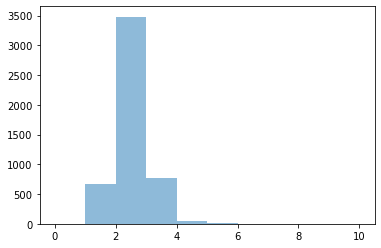

In [21]:
plt.hist(census_df["Population_Per_Household"],bins=[0,1,2,3,4,5,6,7,8,9,10],alpha=0.5)
plt.show()

In [22]:
census_df.head()

Total_Population  Total_Households  \
0              4051              1441   
1              2329              1026   
2              5276              2071   
3              5967              2203   
4              4236              1419   

   Median_Household_Income_(Current_Year_$)  \
0                                  68242.12   
1                                  88172.37   
2                                 103853.38   
3                                  82796.63   
4                                  91648.22   

   Total_Households_For_Period_Of_Construction_Built_Before_1961  \
0                                                323               
1                                                927               
2                                                  3               
3                                                133               
4                                                  0               

   Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980  \
0                                                199                         
1                                                 70                         
2                                                607                         
3                                               1695                         
4                                                  7                         

   Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990  \
0                                                 53                         
1                                                 15                         
2                                                567                         
3                                                248                         
4                                                127                         

   Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000  \
0                                                182                         
1                                                  3                         
2                                                651                         
3                                                 79                         
4                                                938                         

   Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005  \
0                                                526                         
1                                                  0                         
2                                                106                         
3                                                  0                         
4                                                143                         

   Total_Households_For_Structure_Type_Houses  \
0                                         911   
1                                         792   
2                                        1418   
3                                        1397   
4                                         914   

   Total_Households_For_Structure_Type_Apartment,_Building_Low_And_High_Rise  \
0                                                525                           
1                                                230                           
2                                                652                           
3                                                806                           
4                                                505                           

   ...  Dwellings_by_Tenure_Renter  \
0  ...                         424   
1  ...                         213   
2  ...                         381   
3  ...                         807   
4  ...                         162   

   Total_Households_For_Period_Of_Construction_Built_Before_2005  \
0                                               1283               
1                                              

In [23]:
census_df["pct_2005_2016"].value_counts()

 0.000000     42
 1.000000     38
-1.000000     37
 2.000000     29
 3.000000     23
              ..
 7.131868      1
 0.089347      1
 0.258667      1
 1.345411      1
 15.212500     1
Name: pct_2005_2016, Length: 3701, dtype: int64

In [24]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Total_Population                                                           5000 non-null   int64  
 1   Total_Households                                                           5000 non-null   int64  
 2   Median_Household_Income_(Current_Year_$)                                   5000 non-null   float64
 3   Total_Households_For_Period_Of_Construction_Built_Before_1961              5000 non-null   int64  
 4   Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980    5000 non-null   int64  
 5   Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990    5000 non-null   int64  
 6   Total_Households_For_Period_Of_Construction_Built_Betwee

In [25]:
census_df["Population_Per_Household"] = census_df["Population_Per_Household"].replace(np.nan, 0)

In [26]:
census_df["Percentage_after_2005"] = census_df["Percentage_after_2005"].replace(np.nan, 0)

In [27]:
census_df = census_df.drop("Total_Households_For_Period_Of_Construction_After_2005", axis=1)

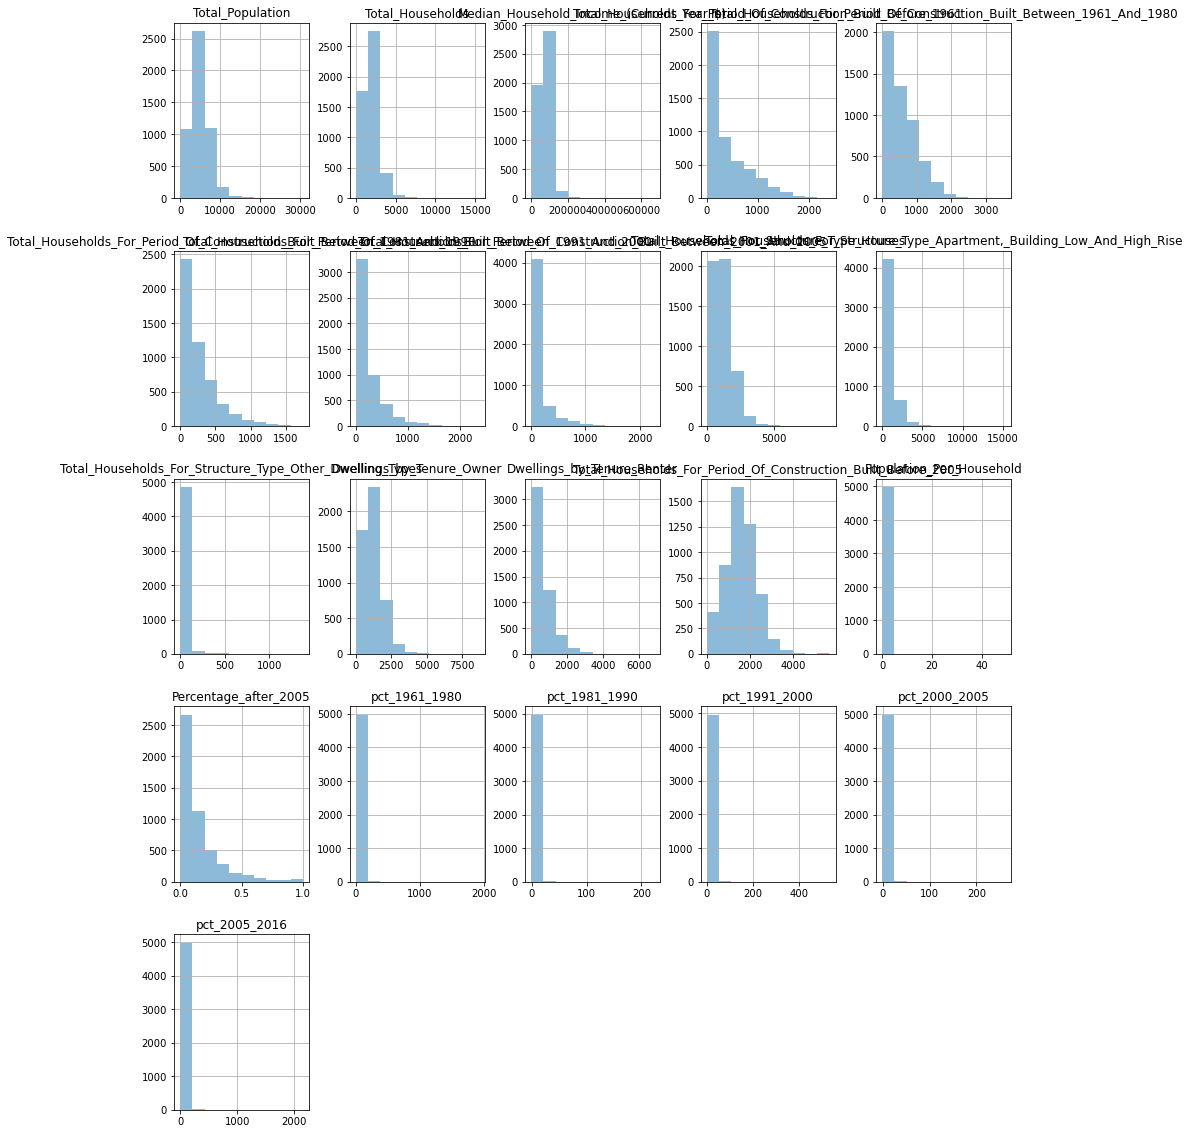

In [28]:
census_df.hist(figsize=(15,20),alpha=0.5)
plt.show()

In [29]:
census_df['Dwellings_by_None'] = census_df["Total_Households"] - census_df['Dwellings_by_Tenure_Owner'] - census_df['Dwellings_by_Tenure_Renter']

In [30]:
census_df = census_df.drop('Total_Population',axis=1)

In [31]:
census_df = census_df.drop('Total_Households_For_Period_Of_Construction_Built_Before_2005',axis=1)

In [32]:
census_df["Dwell_own_pct"] = census_df['Dwellings_by_Tenure_Owner']/census_df["Total_Households"]

In [33]:
census_df["Dwell_rent_pct"] = census_df['Dwellings_by_Tenure_Renter']/census_df["Total_Households"]

In [34]:
census_df["Dwell_none_pct"] = census_df['Dwellings_by_None']/census_df["Total_Households"]

In [35]:
census_df["Dwell_own_pct"] = census_df["Dwell_own_pct"].replace(np.nan, 0)

In [36]:
census_df["Dwell_rent_pct"] = census_df["Dwell_rent_pct"].replace(np.nan, 0)

In [37]:
census_df["Dwell_none_pct"] = census_df["Dwell_none_pct"].replace(np.nan, 0)

In [38]:
census_df = census_df.drop(['Dwellings_by_Tenure_Owner','Dwellings_by_Tenure_Renter','Dwellings_by_None'], axis=1)

In [39]:
census_df.columns

Index(['Total_Households', 'Median_Household_Income_(Current_Year_$)',
       'Total_Households_For_Period_Of_Construction_Built_Before_1961',
       'Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980',
       'Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990',
       'Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000',
       'Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005',
       'Total_Households_For_Structure_Type_Houses',
       'Total_Households_For_Structure_Type_Apartment,_Building_Low_And_High_Rise',
       'Total_Households_For_Structure_Type_Other_Dwelling_Types',
       'Population_Per_Household', 'Percentage_after_2005', 'pct_1961_1980',
       'pct_1981_1990', 'pct_1991_2000', 'pct_2000_2005', 'pct_2005_2016',
       'Dwell_own_pct', 'Dwell_rent_pct', 'Dwell_none_pct'],
      dtype='object')

- if a lot of buildings are built after 2005 - economic growth -> more economic activities -> higher potential income

### Question B
As part of the above analysis provide a correlation matrix and present (selected) 
scatter plots

In [40]:
corr = census_df.corr(method='pearson')
plt.figure(figsize=(15,15))
sns.heatmap(corr,cmap="YlGnBu", annot=True)
plt.show()

In [41]:
# sns.scatterplot(x = "Total_Population", y = 'Total_Households_For_Structure_Type_Houses', data = census_df, alpha=0.5) 
# plt.show()

In [42]:
# sns.scatterplot(x = "Total_Population", y = "Total_Households_For_Period_Of_Construction_Built_Before_2005", data = census_df, alpha=0.5) 
# plt.show()

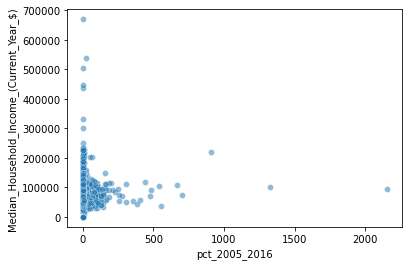

In [43]:
sns.scatterplot(x = "pct_2005_2016", y = "Median_Household_Income_(Current_Year_$)", data = census_df, alpha=0.5) 
plt.show()

### Question C
A common problem in clustering is trying to decide how many clusters to include. 
The k-means algorithm asks you to provide the desired number of clusters, so 
perhaps we should start with finding a suitable k.

In [44]:
from __future__ import print_function
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import make_pipeline
import matplotlib.cm as cm

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [47]:
df_nor = scaler.fit_transform(census_df)

In [48]:
df_nor = pd.DataFrame(df_nor)

In [49]:
df_nor.columns = census_df.columns

In [50]:
df_nor.describe()

Total_Households  Median_Household_Income_(Current_Year_$)  \
count      5.000000e+03                              5.000000e+03   
mean      -7.918666e-18                              3.803624e-16   
std        1.000100e+00                              1.000100e+00   
min       -1.977787e+00                             -2.314809e+00   
25%       -6.094364e-01                             -7.252478e-01   
50%       -1.054424e-01                             -3.099630e-02   
75%        5.134571e-01                              5.453518e-01   
max        1.380941e+01                              1.775097e+01   

       Total_Households_For_Period_Of_Construction_Built_Before_1961  \
count                                       5.000000e+03               
mean                                       -1.571632e-16               
std                                         1.000100e+00               
min                                        -9.271801e-01               
25%                                        -8.144343e-01               
50%                                        -3.562543e-01               
75%                                         5.433136e-01               
max                                         4.856442e+00               

       Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980  \
count                                       5.000000e+03                         
mean                                       -1.051603e-16                         
std                                         1.000100e+00                         
min                                        -1.239034e+00                         
25%                                        -8.107329e-01                         
50%                                        -1.905890e-01                         
75%                                         6.124751e-01                         
max                                         6.673379e+00                         

       Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990  \
count                                       5.000000e+03                         
mean                                        6.981082e-17                         
std                                         1.000100e+00                         
min                                        -1.010243e+00                         
25%                                        -7.232447e-01                         
50%                                        -3.082608e-01                         
75%                                         4.208696e-01                         
max                                         5.738092e+00                         

       Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000  \
count                                       5.000000e+03                         
mean                                       -3.899103e-17                         
std                                         1.000100e+00                         
min                                        -8.964662e-01                         
25%                                        -6.779337e-01                         
50%                                        -3.576706e-01                         
75%                                         3.280692e-01                         
max                                         7.995545e+00                         

       Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005  \
count                                       5.000000e+03                         
mean                                       -4.645173e-17                         
std                                         1.000100e+00                         
min                                        -6.249040e-01                         
25%                                        -5.482539e-01                         
50%                        

In [51]:
df_nor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Total_Households                                                           5000 non-null   float64
 1   Median_Household_Income_(Current_Year_$)                                   5000 non-null   float64
 2   Total_Households_For_Period_Of_Construction_Built_Before_1961              5000 non-null   float64
 3   Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980    5000 non-null   float64
 4   Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990    5000 non-null   float64
 5   Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000    5000 non-null   float64
 6   Total_Households_For_Period_Of_Construction_Built_Betwee

In [52]:
X = census_df.values

In [53]:
X.shape

(5000, 20)

In [54]:
cluster_range = range(2,8)

For n_clusters = 2 The average silhouette_score is : 0.557708450999115
For n_clusters = 3 The average silhouette_score is : 0.5888211069044349
For n_clusters = 4 The average silhouette_score is : 0.5656742378493343
For n_clusters = 5 The average silhouette_score is : 0.5788643447227603
For n_clusters = 6 The average silhouette_score is : 0.5395784688996393
For n_clusters = 7 The average silhouette_score is : 0.5053174576432174


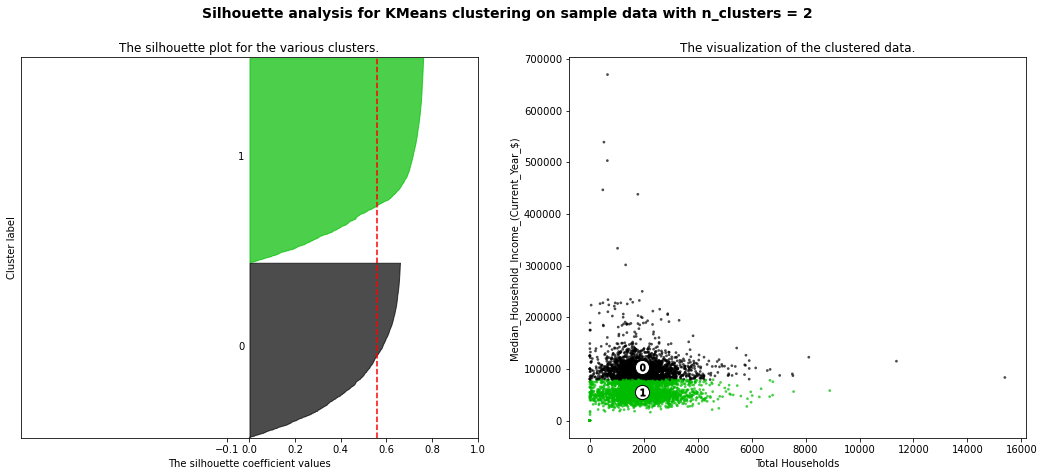

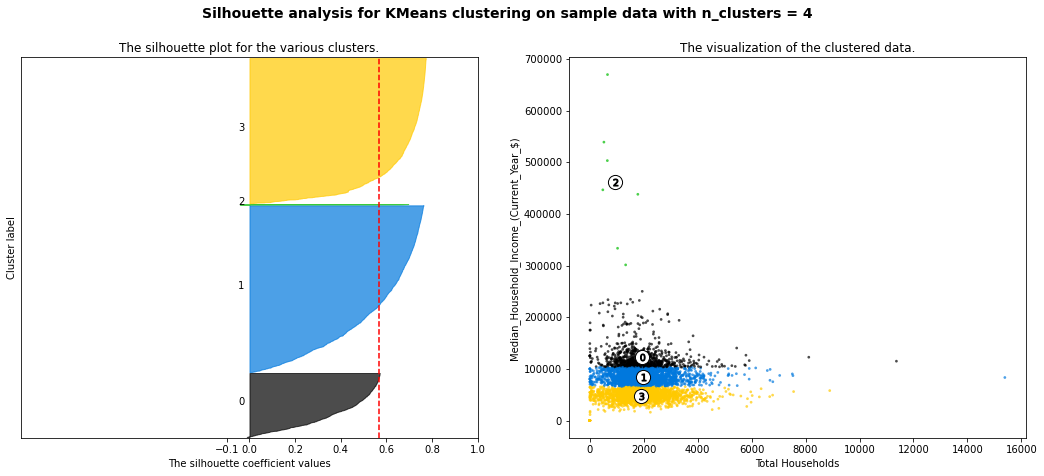

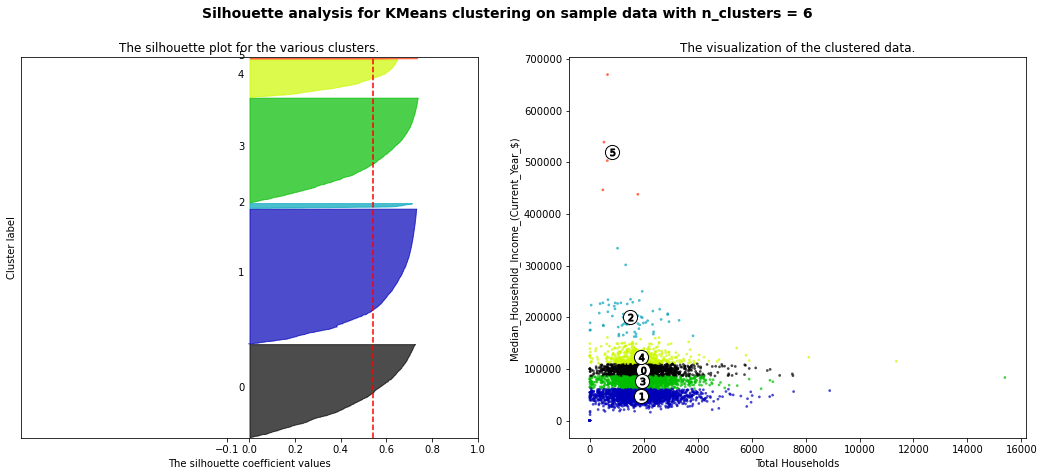

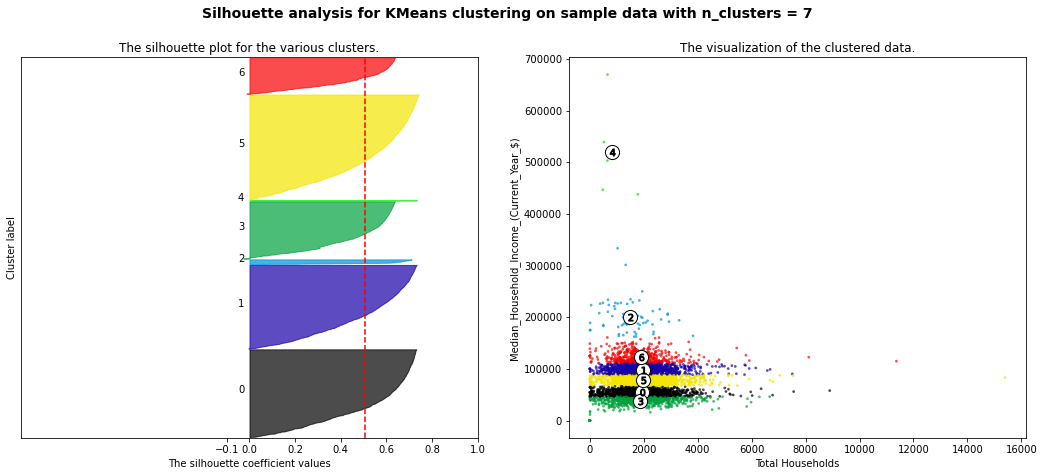

In [55]:
for n_clusters in cluster_range:
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    ax1.set_xlim([-1,1]) # this is for the silhouette score
    ax1.set_ylim([0, len(X) + (n_clusters +1)* 10])
    
    cluster = KMeans(n_clusters=n_clusters,random_state=42)
    cluster_labels = cluster.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = cluster.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Total Households")
    ax2.set_ylabel("Median_Household_Income_(Current_Year_$)")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
    

In [56]:
inertias = []

In [57]:
centroids = []

In [58]:
scaler = StandardScaler()

In [59]:
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters)
    pipeline = make_pipeline(scaler, kmeans)
    pipeline.fit(X)
    inertias.append(pipeline.named_steps['kmeans'].inertia_)
    centroids.append(pipeline.named_steps['kmeans'].cluster_centers_)

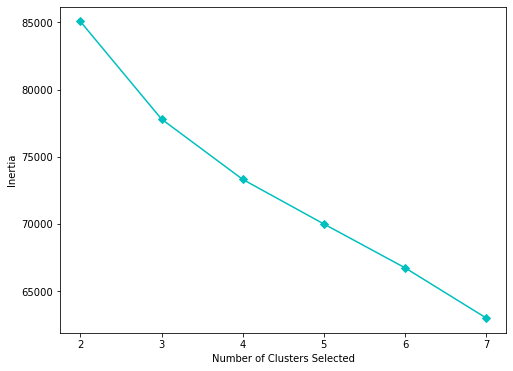

In [60]:
plt.figure(figsize=(8,6))
plt.plot(cluster_range, inertias, '-D', color='c')
plt.xticks(cluster_range)
plt.xlabel("Number of Clusters Selected")
plt.ylabel("Inertia")
plt.show()

In [937]:
inertias = []
centroids = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    centroids.append(kmeans.cluster_centers_)

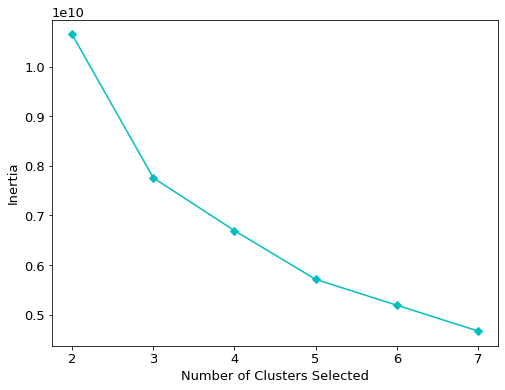

In [938]:
plt.figure(figsize=(8,6))
plt.plot(cluster_range, inertias, '-D', color='c')
plt.xticks(cluster_range)
plt.xlabel("Number of Clusters Selected")
plt.ylabel("Inertia")
plt.show()

In [61]:
len(centroids)

6

### Question D
Very important: Develop a detailed profile of these clusters using appropriate 
graphs and statistics, univariate and multivariate. Make sure you include aggregate 
statistics by cluster (for the means, at least). Histograms of the aggregated mean 
fields by cluster can be helpful. Also cluster distribution by variable. Be informative 
and comprehensive in your cluster profiles.


In [62]:
opt_model = KMeans(n_clusters=3)

In [63]:
# opt_pipeline = make_pipeline(scaler, opt_model)

In [64]:
opt_labels = opt_model.fit_predict(X)

In [65]:
df_opt = df_nor.copy()

In [66]:
df_opt["labels"] = opt_labels

In [67]:
df_opt.head()

Total_Households  Median_Household_Income_(Current_Year_$)  \
0         -0.499404                                 -0.269686   
1         -0.925170                                  0.327596   
2          0.146939                                  0.797534   
3          0.282364                                  0.166492   
4         -0.521975                                  0.431762   

   Total_Households_For_Period_Of_Construction_Built_Before_1961  \
0                                          -0.152352               
1                                           1.296552               
2                                          -0.919984               
3                                          -0.608133               
4                                          -0.927180               

   Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980  \
0                                          -0.795118                         
1                                          -1.082882                         
2                                           0.115022                         
3                                           2.542060                         
4                                          -1.223419                         

   Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990  \
0                                          -0.804690                         
1                                          -0.952068                         
2                                           1.188784                         
3                                          -0.048411                         
4                                          -0.517692                         

   Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000  \
0                                          -0.210726                         
1                                          -0.885163                         
2                                           1.556372                         
3                                          -0.598810                         
4                                           2.637731                         

   Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005  \
0                                           1.746741                         
1                                          -0.624904                         
2                                          -0.146968                         
3                                          -0.624904                         
4                                           0.019859                         

   Total_Households_For_Structure_Type_Houses  \
0                                   -0.275602   
1                                   -0.422152   
2                                    0.348774   
3                                    0.322912   
4                                   -0.271907   

   Total_Households_For_Structure_Type_Apartment,_Building_Low_And_High_Rise  \
0                                          -0.283061                           
1                                          -0.614175                           
2                                          -0.140514                           
3                                           0.032339                           
4                                          -0.305510                           

   Total_Households_For_Structure_Type_Other_Dwelling_Types  ...  \
0                                          -0.171521         ...   
1                                          -0.187408         ...   
2                                          -0.235070         ...   
3                                          -0.250958         ...   
4                                          -0.250958         ...   

   Percentage_after_2005  pct_1961_1980  pct_1981_1990  pct_1991_2000  \
0              -0.248311      -0.182353      -0.184745      -0.001604

In [68]:
silhouette_score(X, opt_labels)

0.5888211069044349

#### Group by Mean

In [69]:
df_mean = census_df.copy()

In [70]:
df_mean["labels"] = opt_labels

In [71]:
df_mean["labels"].value_counts()

1    2596
0    2332
2      72
Name: labels, dtype: int64

In [72]:
cluster_mean = df_mean.groupby('labels').mean()

In [73]:
cluster_mean

Total_Households  Median_Household_Income_(Current_Year_$)  \
labels                                                               
0            1909.601201                              51793.588812   
1            1957.439908                              96114.103748   
2            1446.902778                             220979.100556   

        Total_Households_For_Period_Of_Construction_Built_Before_1961  \
labels                                                                  
0                                              547.963551               
1                                              244.162943               
2                                              289.652778               

        Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980  \
labels                                                                            
0                                              669.230703                         
1                                              461.506549                         
2                                              256.555556                         

        Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990  \
labels                                                                            
0                                              226.455403                         
1                                              293.667565                         
2                                              166.069444                         

        Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000  \
labels                                                                            
0                                              166.947684                         
1                                              302.422573                         
2                                              211.527778                         

        Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005  \
labels                                                                            
0                                               73.406947                         
1                                              195.895994                         
2                                              183.986111                         

        Total_Households_For_Structure_Type_Houses  \
labels                                               
0                                       705.635506   
1                                      1518.917180   
2                                      1184.833333   

        Total_Households_For_Structure_Type_Apartment,_Building_Low_And_High_Rise  \
labels                                                                              
0                                             1189.381218                           
1                                              422.227273                           
2                                              225.041667                           

        Total_Households_For_Structure_Type_Other_Dwelling_Types  \
labels                                                             
0                                               14.584477          
1                                               16.295455          
2                                               37.027778          

        Population_Per_Household  Percentage_after_2005  pct_1961_1980  \
labels                                                                   
0                       2.293561               0.107972       2.832575   
1                       2.803376               0.190850      14.853266   
2                       2.886736               0.216460      36.970255   

        pct_1981_1990  pct_1991_2000  pct_2000_2005  pct_2005_2016  \
labels                                                               
0           -0.511137      -0.007841      -0.505016       8.079927   
1       

Text(0.5, 1.0, 'Mean Median Income across Different Labels')

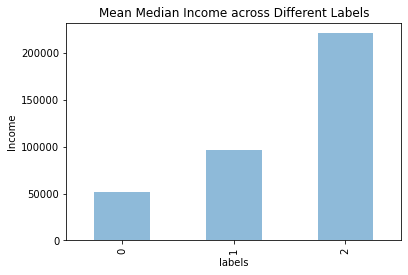

In [74]:
cluster_mean.iloc[:,1].plot(kind='bar',alpha=0.5)
plt.ylabel("Income")
plt.title("Mean Median Income across Different Labels")

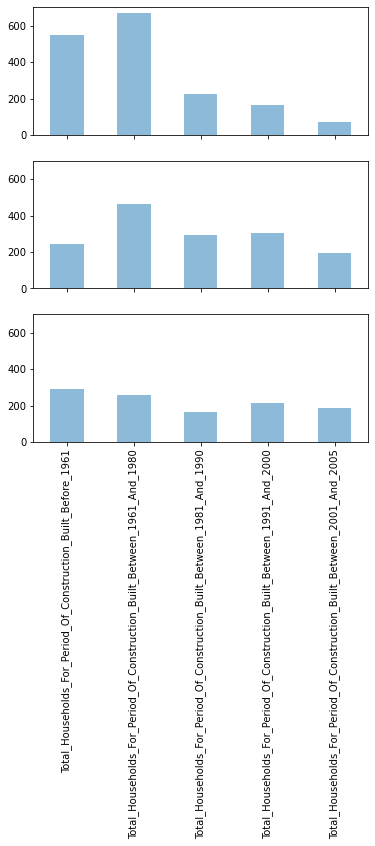

In [75]:
fig, axes = plt.subplots(3,1, sharex=True, sharey=True)
fig.set_size_inches(6,8)

for i in range(len(cluster_mean)):
    row_mean = cluster_mean.iloc[i,2:7]
    row_mean.plot(kind='bar',ax=axes[i],alpha=0.5)
    
# plt.xticks(rotation=45)
plt.show()

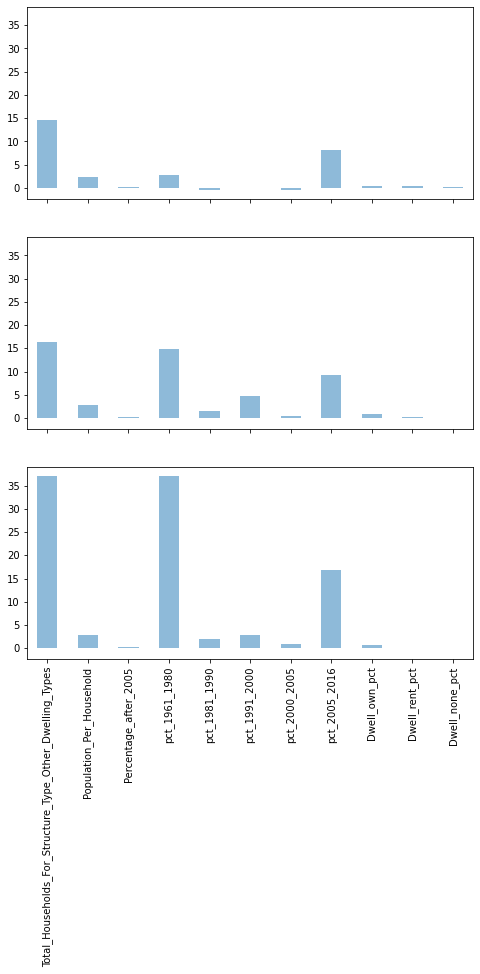

In [76]:
fig, axes = plt.subplots(3,1, sharex=True, sharey=True)
fig.set_size_inches(8,12)

for i in range(len(cluster_mean)):
    row_mean = cluster_mean.iloc[i,9:]
    row_mean.plot(kind='bar',ax=axes[i],alpha=0.5)
    
plt.show()

In [77]:
cluster_mean.iloc[i,0]

1446.9027777777778

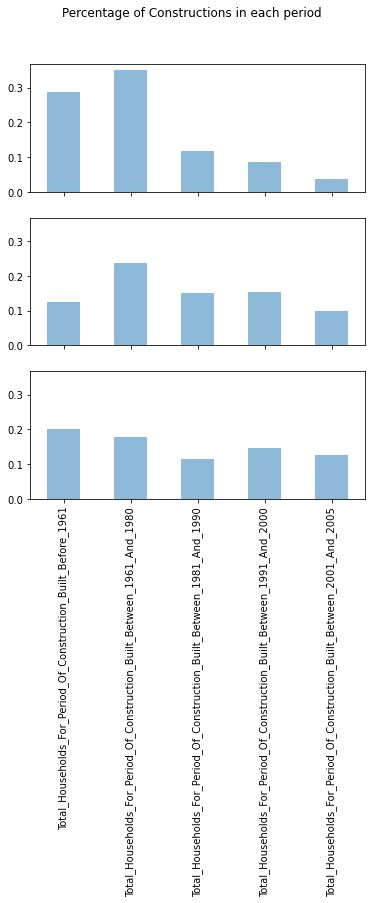

In [78]:
fig, axes = plt.subplots(3,1, sharex=True, sharey=True)
fig.set_size_inches(6,8)

for i in range(len(cluster_mean)):
    row_mean = cluster_mean.iloc[i,2:7]
    row_mean = row_mean/cluster_mean.iloc[i,0]
#     raise Exception(row_mean)
    row_mean.plot(kind='bar',ax=axes[i],alpha=0.5)
    
fig.suptitle("Percentage of Constructions in each period")
plt.show()

#### Group by Median

In [79]:
cluster_median = df_mean.groupby('labels').median()

Text(0.5, 1.0, 'Median Median Income across Different Labels')

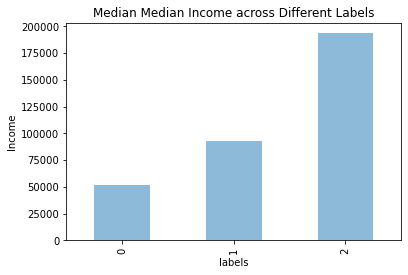

In [80]:
cluster_median.iloc[:,1].plot(kind='bar',alpha=0.5)
plt.ylabel("Income")
plt.title("Median Median Income across Different Labels")

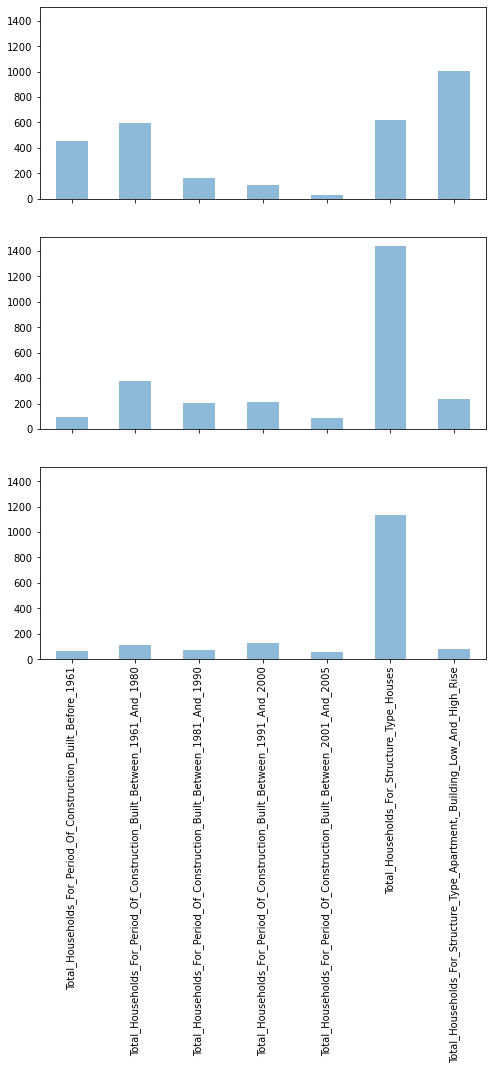

In [81]:
fig, axes = plt.subplots(3,1, sharex=True, sharey=True)
fig.set_size_inches(8,12)

for i in range(len(cluster_median)):
    row_med = cluster_median.iloc[i,2:9]
    row_med.plot(kind='bar',ax=axes[i],alpha=0.5)
    
plt.show()

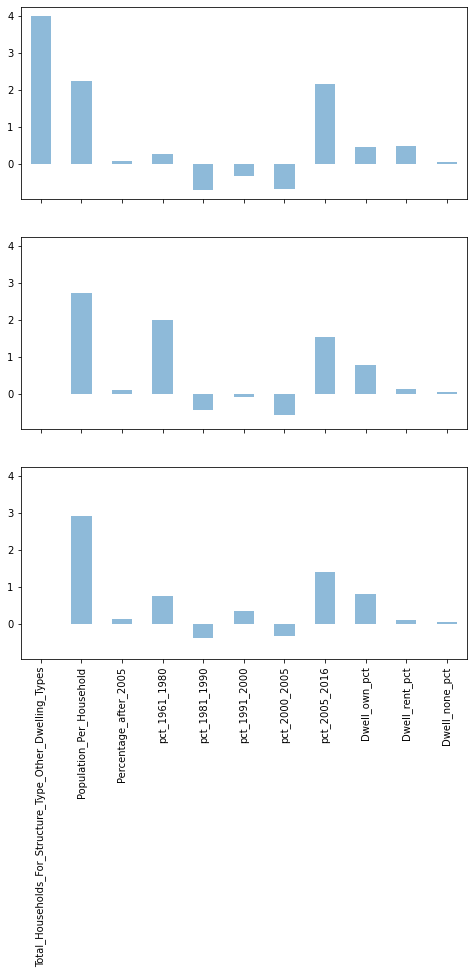

In [82]:
fig, axes = plt.subplots(3,1, sharex=True, sharey=True)
fig.set_size_inches(8,12)

for i in range(len(cluster_median)):
    row_med = cluster_median.iloc[i,9:]
    row_med.plot(kind='bar',ax=axes[i],alpha=0.5)
    
plt.show()

In [83]:
df_scatter = census_df.copy()
df_scatter["labels"] = opt_labels

In [84]:
df_scatter.head()

Total_Households  Median_Household_Income_(Current_Year_$)  \
0              1441                                  68242.12   
1              1026                                  88172.37   
2              2071                                 103853.38   
3              2203                                  82796.63   
4              1419                                  91648.22   

   Total_Households_For_Period_Of_Construction_Built_Before_1961  \
0                                                323               
1                                                927               
2                                                  3               
3                                                133               
4                                                  0               

   Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980  \
0                                                199                         
1                                                 70                         
2                                                607                         
3                                               1695                         
4                                                  7                         

   Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990  \
0                                                 53                         
1                                                 15                         
2                                                567                         
3                                                248                         
4                                                127                         

   Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000  \
0                                                182                         
1                                                  3                         
2                                                651                         
3                                                 79                         
4                                                938                         

   Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005  \
0                                                526                         
1                                                  0                         
2                                                106                         
3                                                  0                         
4                                                143                         

   Total_Households_For_Structure_Type_Houses  \
0                                         911   
1                                         792   
2                                        1418   
3                                        1397   
4                                         914   

   Total_Households_For_Structure_Type_Apartment,_Building_Low_And_High_Rise  \
0                                                525                           
1                                                230                           
2                                                652                           
3                                                806                           
4                                                505                           

   Total_Households_For_Structure_Type_Other_Dwelling_Types  ...  \
0                                                  5         ...   
1                                                  4         ...   
2                                                  1         ...   
3                                                  0         ...   
4                                                  0         ...   

   Percentage_after_2005  pct_1961_1980  pct_1981_1990  pct_1991_2000  \
0               0.109646      -0.383901      -0.733668       2.433962

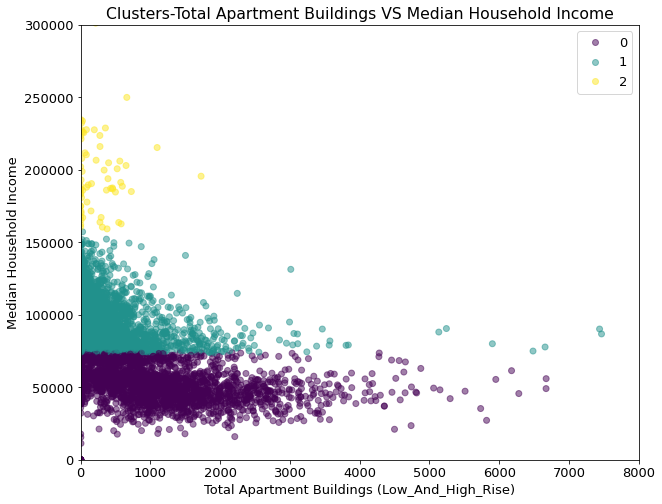

In [85]:
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = '13'
scatters = plt.scatter(df_scatter['Total_Households_For_Structure_Type_Apartment,_Building_Low_And_High_Rise'], df_scatter['Median_Household_Income_(Current_Year_$)'],c=opt_labels, alpha=0.5)
plt.xlabel('Total Apartment Buildings (Low_And_High_Rise)')
plt.ylabel('Median Household Income')
plt.title('Clusters-Total Apartment Buildings VS Median Household Income')
plt.xlim([0, 8000])
plt.ylim([0,300000])
plt.legend(handles=scatters.legend_elements()[0], labels=[0,1,2])
plt.show()

In [86]:
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = '13'
scatters = plt.scatter(df_scatter['Total_Households'], df_scatter['Median_Household_Income_(Current_Year_$)'],c=opt_labels, alpha=0.5)
plt.xlabel('Total Households')
plt.ylabel('Median Household Income')
plt.title('Clusters-Median Household Income VS Total Households')
plt.xlim([0, 8000])
plt.ylim([0,300000])
plt.legend(handles=scatters.legend_elements()[0], labels=[0,1,2])
plt.show()

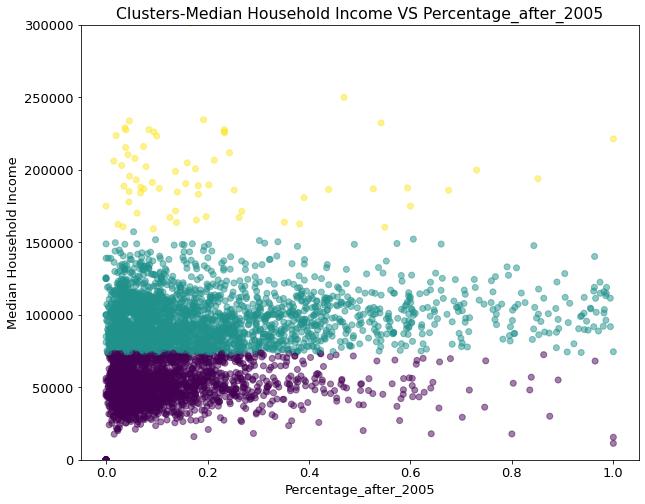

In [87]:
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = '13'
plt.scatter(df_scatter['Percentage_after_2005'], df_scatter['Median_Household_Income_(Current_Year_$)'],c=opt_labels, alpha=0.5)
plt.xlabel('Percentage_after_2005')
plt.ylabel('Median Household Income')
plt.title('Clusters-Median Household Income VS Percentage_after_2005')
plt.ylim([0,300000])
plt.show()



#### Cluster Distribution by Variables

In [88]:
census_df.head()

Total_Households  Median_Household_Income_(Current_Year_$)  \
0              1441                                  68242.12   
1              1026                                  88172.37   
2              2071                                 103853.38   
3              2203                                  82796.63   
4              1419                                  91648.22   

   Total_Households_For_Period_Of_Construction_Built_Before_1961  \
0                                                323               
1                                                927               
2                                                  3               
3                                                133               
4                                                  0               

   Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980  \
0                                                199                         
1                                                 70                         
2                                                607                         
3                                               1695                         
4                                                  7                         

   Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990  \
0                                                 53                         
1                                                 15                         
2                                                567                         
3                                                248                         
4                                                127                         

   Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000  \
0                                                182                         
1                                                  3                         
2                                                651                         
3                                                 79                         
4                                                938                         

   Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005  \
0                                                526                         
1                                                  0                         
2                                                106                         
3                                                  0                         
4                                                143                         

   Total_Households_For_Structure_Type_Houses  \
0                                         911   
1                                         792   
2                                        1418   
3                                        1397   
4                                         914   

   Total_Households_For_Structure_Type_Apartment,_Building_Low_And_High_Rise  \
0                                                525                           
1                                                230                           
2                                                652                           
3                                                806                           
4                                                505                           

   Total_Households_For_Structure_Type_Other_Dwelling_Types  \
0                                                  5          
1                                                  4          
2                                                  1          
3                                                  0          
4                                                  0          

   Population_Per_Household  Percentage_after_2005  pct_1961_1980  \
0                  2.811242               0.109646      -0.383901   
1                  2.269981       

In [89]:
census_df_label = census_df.copy()

In [90]:
census_df_label["labels"] = opt_labels

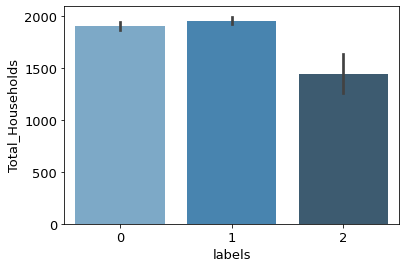

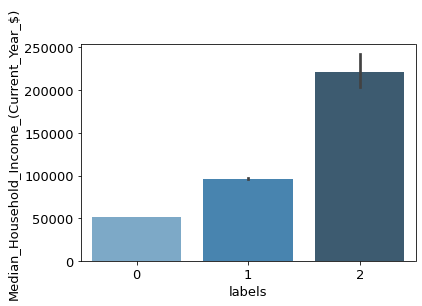

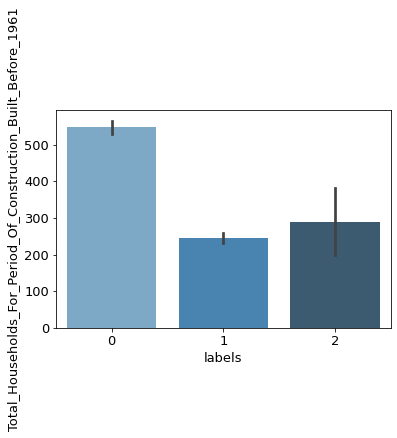

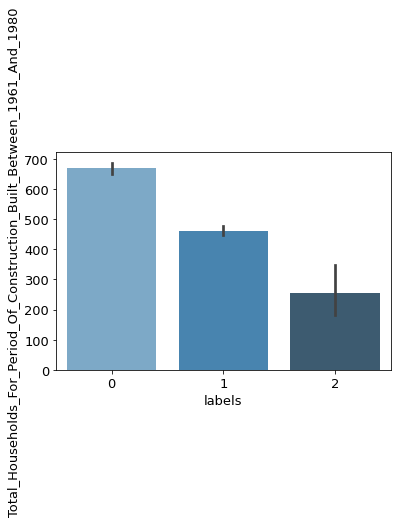

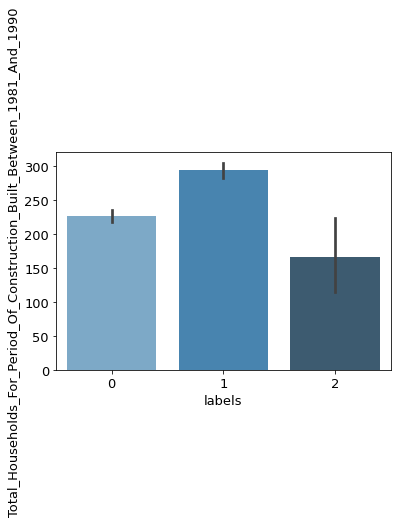

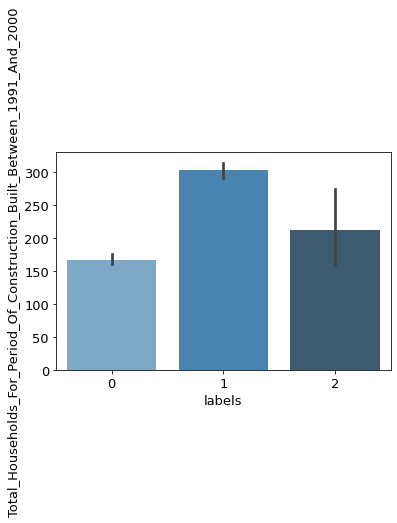

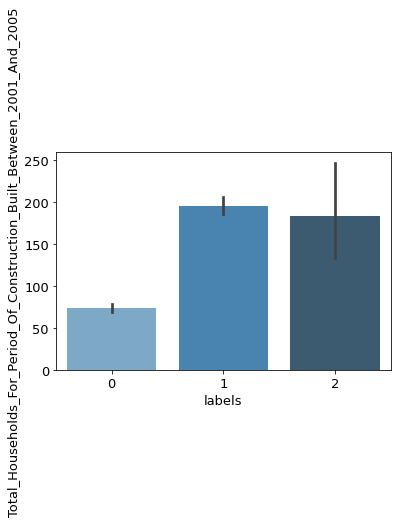

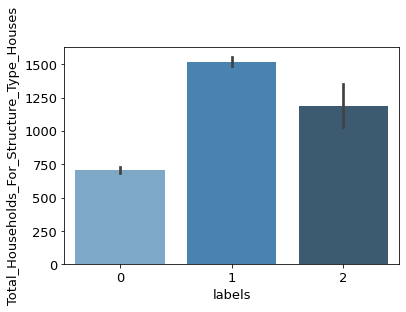

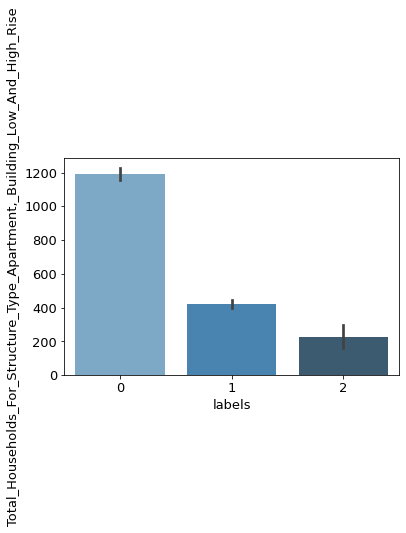

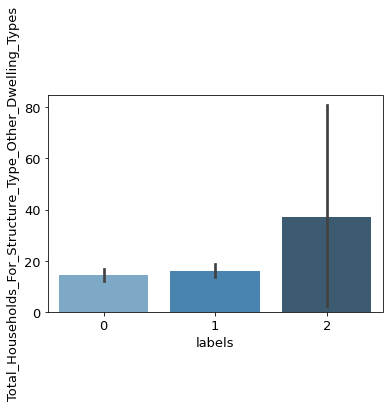

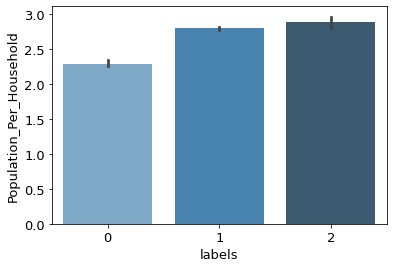

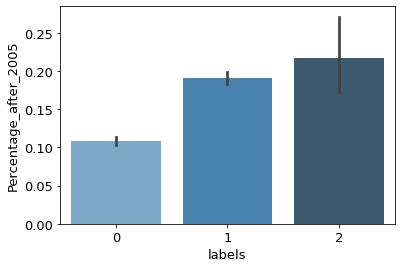

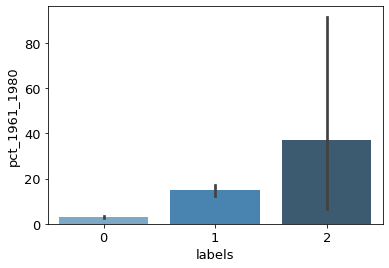

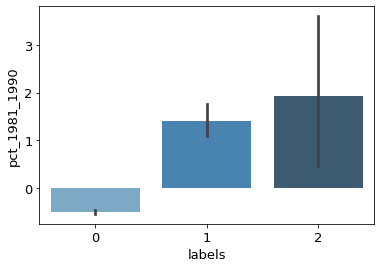

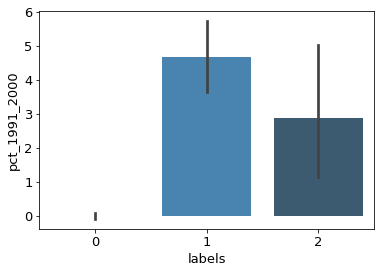

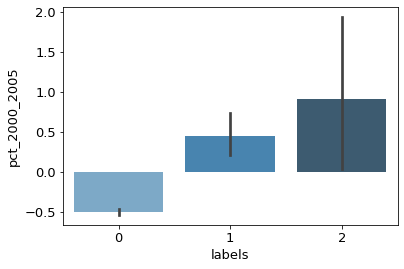

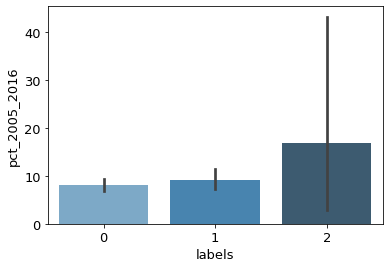

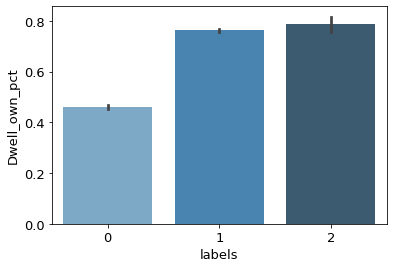

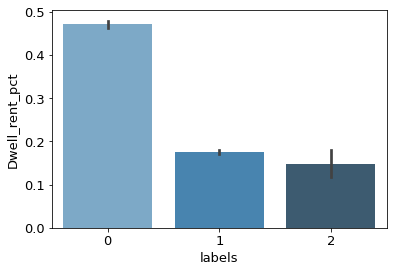

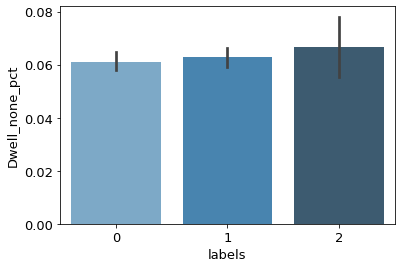

In [91]:
for i in range(census_df_label.shape[1]-1):
    sns.barplot(x="labels",y=census_df_label.columns[i], data=census_df_label,palette="Blues_d")
    plt.show()

### Question E

e. Redo step c for a BIRCH clustering model using the same number of clusters as your 
k-means model. Try to match the clusters with those from the k-means model. 
Investigate similarities and differences between the clusters. <br>

**n_clusters = 3**

In [1589]:
X = census_df.drop(['labels'], axis=1)

In [1590]:
X.columns

Index(['Total_Households', 'Median_Household_Income_(Current_Year_$)',
       'Total_Households_For_Period_Of_Construction_Built_Before_1961',
       'Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980',
       'Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990',
       'Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000',
       'Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005',
       'Total_Households_For_Structure_Type_Houses',
       'Total_Households_For_Structure_Type_Apartment,_Building_Low_And_High_Rise',
       'Total_Households_For_Structure_Type_Other_Dwelling_Types',
       'Population_Per_Household', 'Percentage_after_2005', 'pct_1961_1980',
       'pct_1981_1990', 'pct_1991_2000', 'pct_2000_2005', 'pct_2005_2016',
       'Dwell_own_pct', 'Dwell_rent_pct', 'Dwell_none_pct'],
      dtype='object')

In [1592]:
from sklearn.cluster import Birch

In [1593]:
birch = Birch(n_clusters=3) # default threshold is 0.5.

In [1594]:
# pipeline_birch = make_pipeline(scaler, birch)

In [1595]:
birch.fit(X)

Birch()

In [1596]:
birch_labels = birch.predict(X)

In [1597]:
df_birch = census_df.copy()

In [1598]:
df_birch['label'] = birch_labels

In [1599]:
df_birch['label'].value_counts()

2    2600
1    1825
0     575
Name: label, dtype: int64

In [1600]:
silhouette_score(X,birch_labels, metric='euclidean')

0.5608699985610718

#### Group by Mean

In [1601]:
cluster_mean = df_birch.groupby('label').mean()

Text(0.5, 1.0, 'Mean Median Income across Different Labels (BIRCH)')

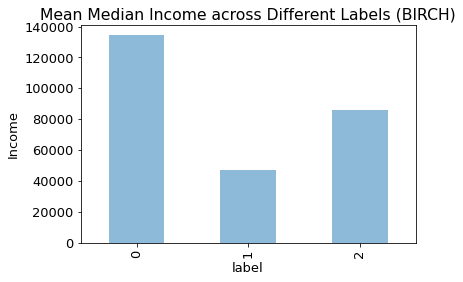

In [1602]:
cluster_mean.iloc[:,1].plot(kind='bar',alpha=0.5)
plt.ylabel("Income")
plt.title("Mean Median Income across Different Labels (BIRCH)")

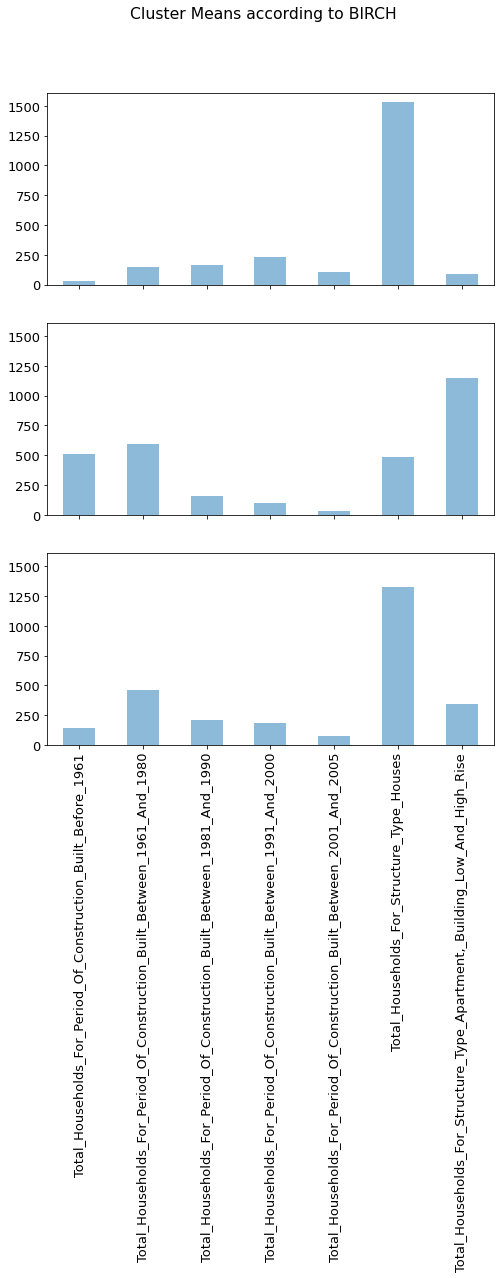

In [1603]:
fig, axes = plt.subplots(3,1, sharex=True, sharey=True)
fig.set_size_inches(8,12)

for i in range(len(cluster_median)):
    row_med = cluster_median.iloc[i,2:9]
    row_med.plot(kind='bar',ax=axes[i],alpha=0.5)

fig.suptitle("Cluster Means according to BIRCH")
plt.show()

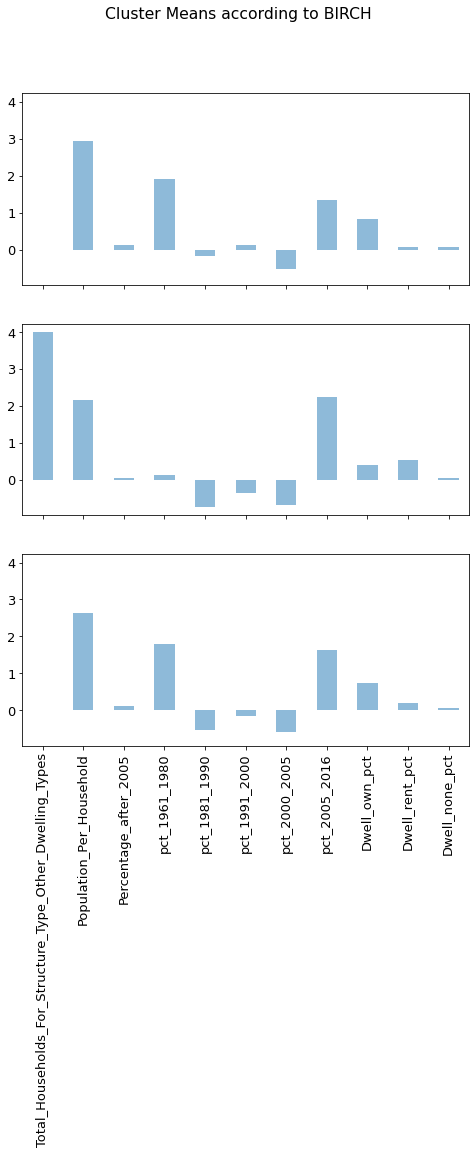

In [1604]:
fig, axes = plt.subplots(3,1, sharex=True, sharey=True)
fig.set_size_inches(8,12)

for i in range(len(cluster_median)):
    row_med = cluster_median.iloc[i,9:]
    row_med.plot(kind='bar',ax=axes[i],alpha=0.5)

fig.suptitle("Cluster Means according to BIRCH")
plt.show()

#### Group by Median

In [1605]:
cluster_median = df_birch.groupby('label').median()

Text(0.5, 1.0, 'Median Median Income across Different Labels (BIRCH)')

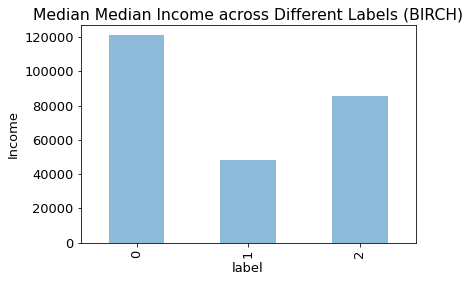

In [1606]:
cluster_median.iloc[:,1].plot(kind='bar',alpha=0.5)
plt.ylabel("Income")
plt.title("Median Median Income across Different Labels (BIRCH)")

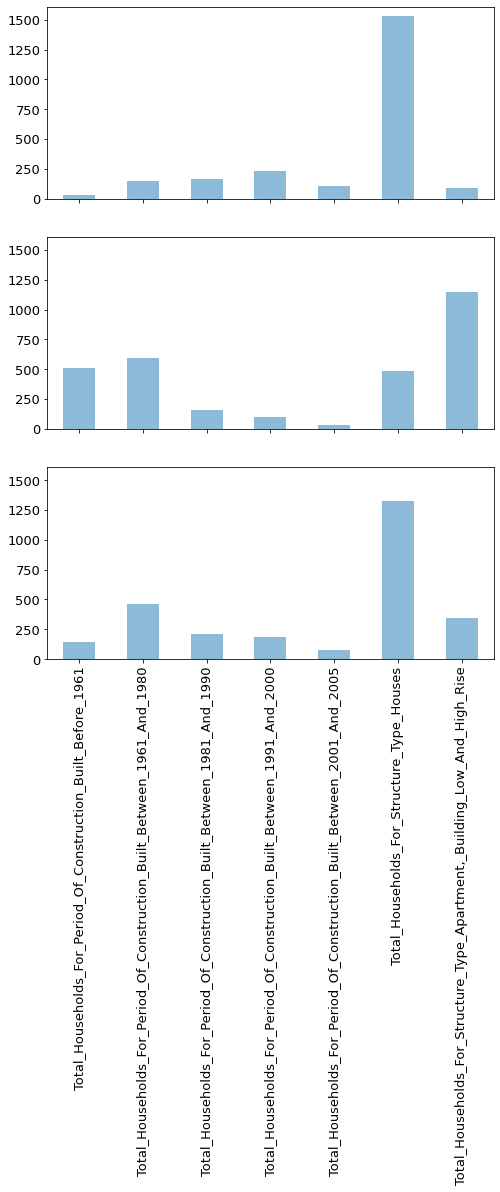

In [1607]:
fig, axes = plt.subplots(3,1, sharex=True, sharey=True)
fig.set_size_inches(8,12)

for i in range(len(cluster_median)):
    row_med = cluster_median.iloc[i,2:9]
    row_med.plot(kind='bar',ax=axes[i],alpha=0.5)

fig.suptitle("")
plt.show()

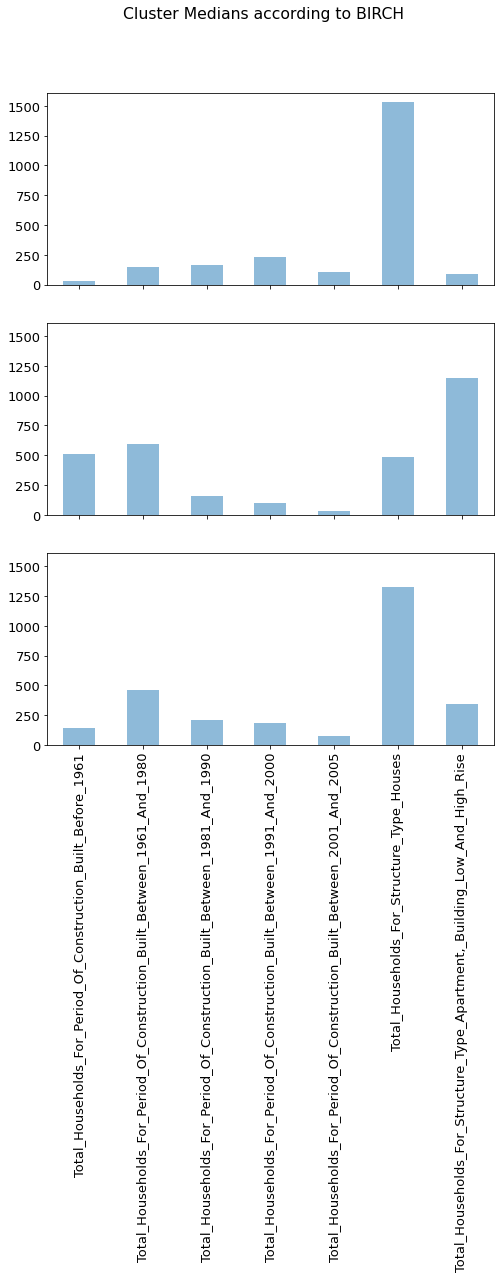

In [1608]:
fig, axes = plt.subplots(3,1, sharex=True, sharey=True)
fig.set_size_inches(8,12)

for i in range(len(cluster_median)):
    row_med = cluster_median.iloc[i,2:9]
    row_med.plot(kind='bar',ax=axes[i],alpha=0.5)

fig.suptitle('Cluster Medians according to BIRCH')
plt.show()

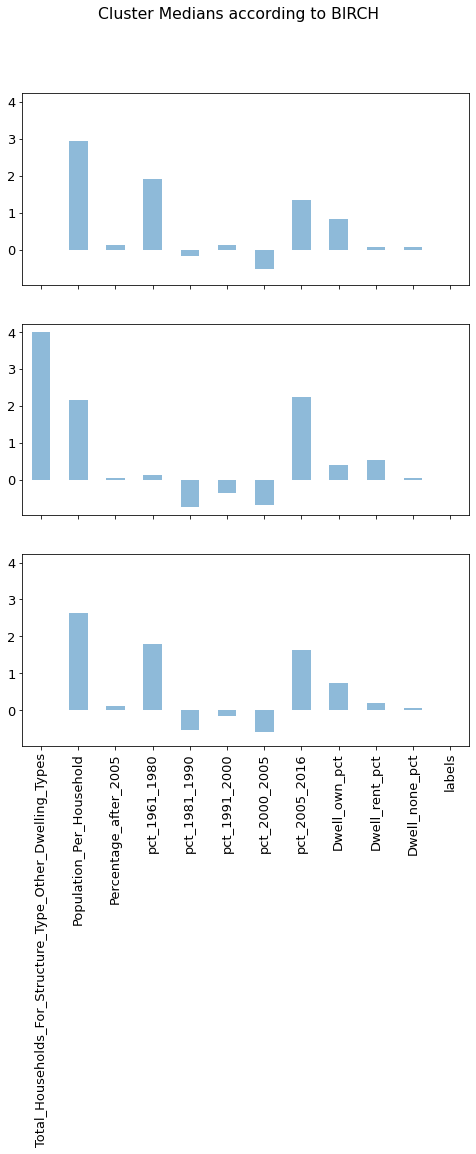

In [1609]:
fig, axes = plt.subplots(3,1, sharex=True, sharey=True)
fig.set_size_inches(8,12)

for i in range(len(cluster_median)):
    row_med = cluster_median.iloc[i,9:]
    row_med.plot(kind='bar',ax=axes[i],alpha=0.5)

fig.suptitle('Cluster Medians according to BIRCH')
plt.show()

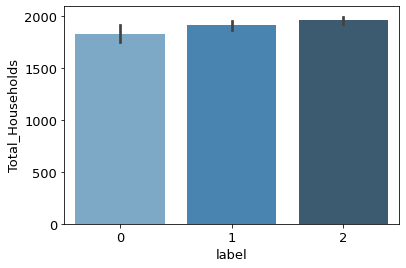

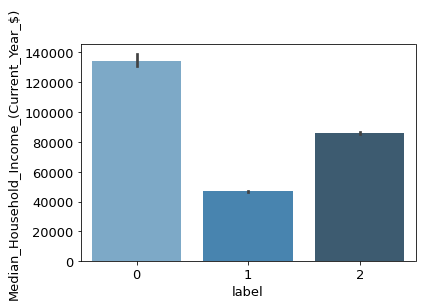

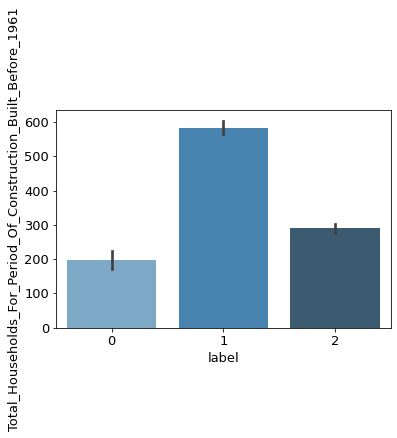

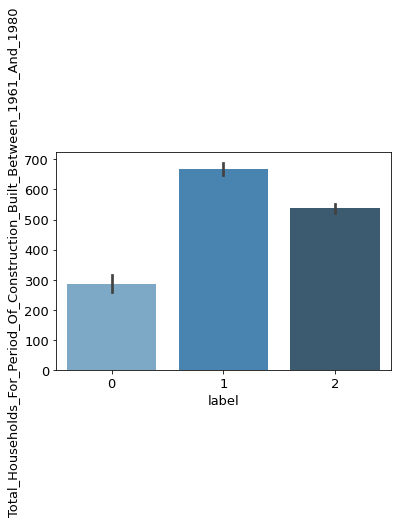

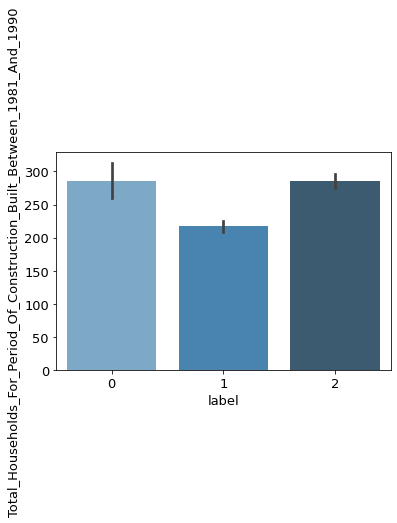

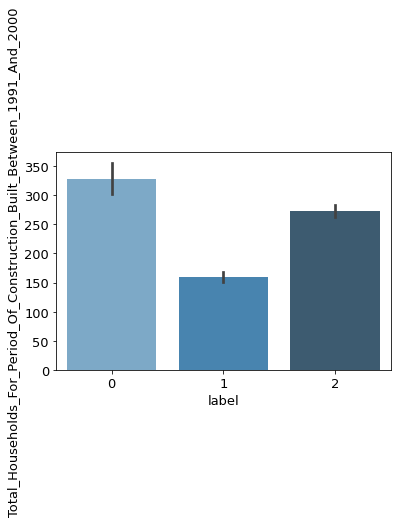

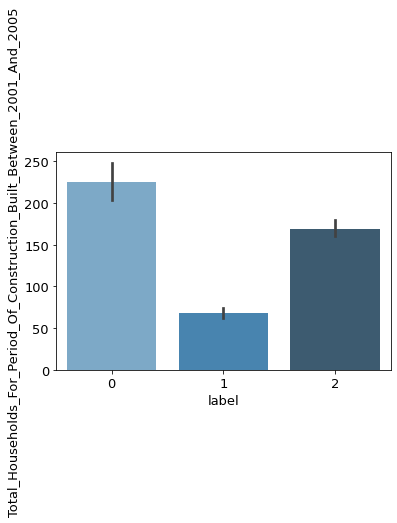

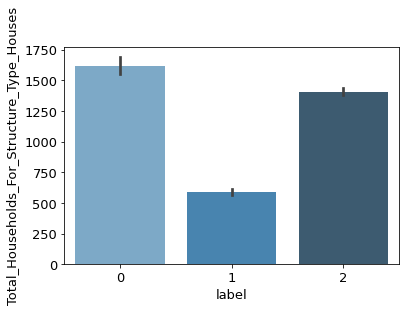

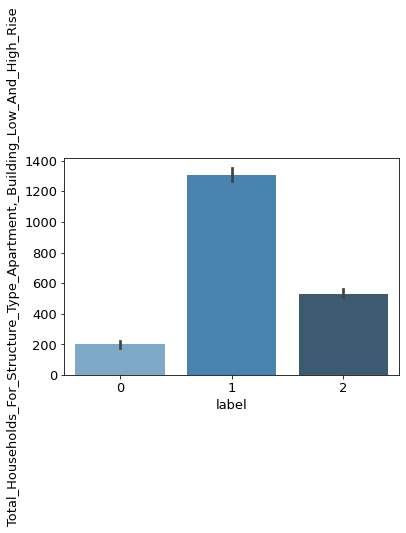

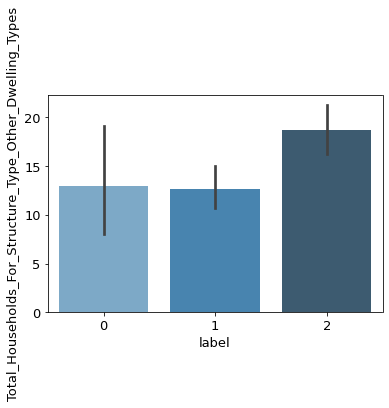

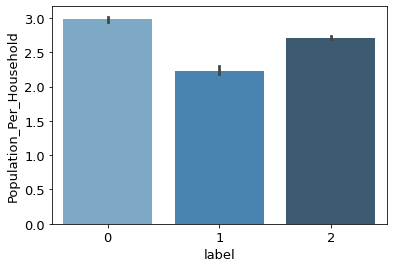

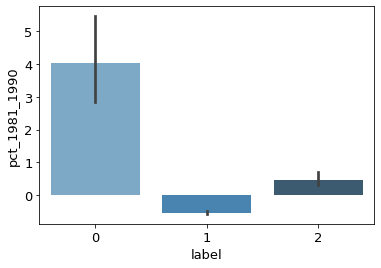

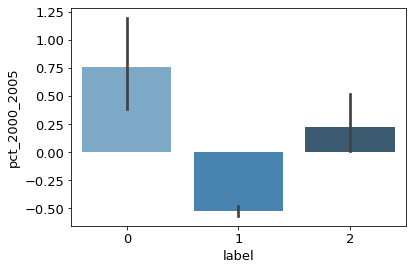

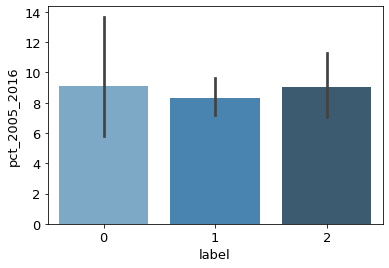

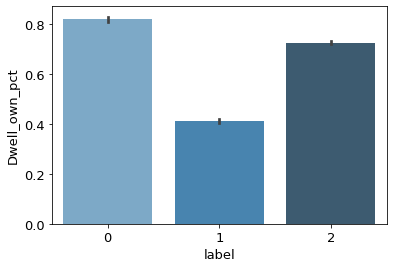

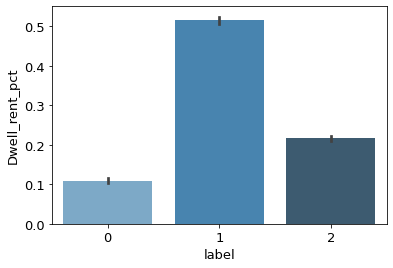

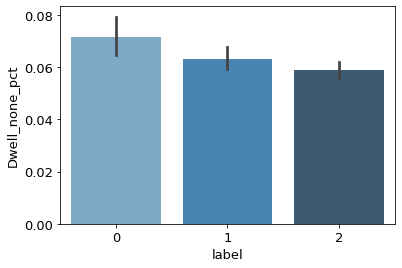

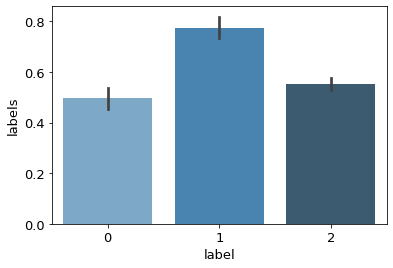

In [1610]:
for i in range(df_birch.shape[1]-1):
    sns.barplot(x="label",y=df_birch.columns[i], data=df_birch,palette="Blues_d")
    plt.show()

#### Scatterplot for Birch

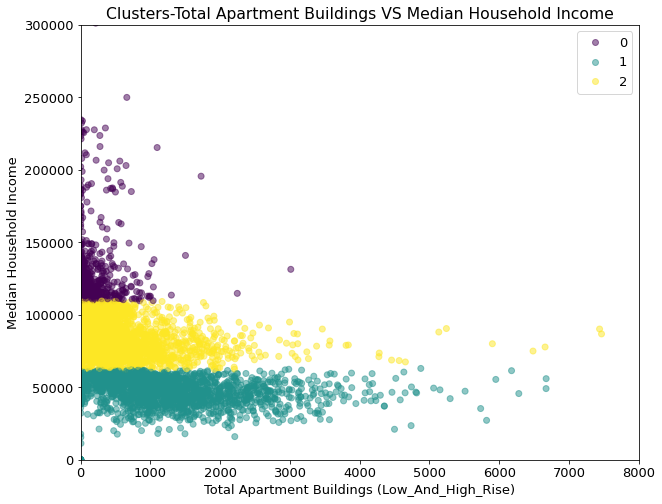

In [1611]:
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = '13'
plt.scatter(census_df['Total_Households_For_Structure_Type_Apartment,_Building_Low_And_High_Rise'], census_df['Median_Household_Income_(Current_Year_$)'],c=birch_labels, alpha=0.5)
plt.xlabel('Total Apartment Buildings (Low_And_High_Rise)')
plt.ylabel('Median Household Income')
plt.legend(handles=scatters.legend_elements()[0], labels=[0,1,2])
plt.title('Clusters-Total Apartment Buildings VS Median Household Income')
plt.xlim(0, 8000)
plt.ylim(0,300000)
plt.show()

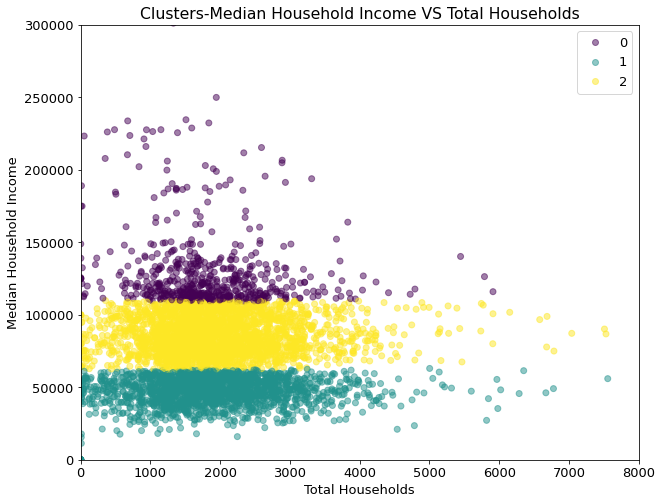

In [1612]:
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = '13'
scatters = plt.scatter(census_df['Total_Households'], census_df['Median_Household_Income_(Current_Year_$)'],c=birch_labels, alpha=0.5)
plt.xlabel('Total Households')
plt.ylabel('Median Household Income')
plt.title('Clusters-Median Household Income VS Total Households')
plt.xlim([0, 8000])
plt.ylim([0,300000])
plt.legend(handles=scatters.legend_elements()[0], labels=[0,1,2])
plt.show()

## Part 2

### Question F
Build your “best” clustering model, this time omitting the median income variable.
Use this segmentation in the following.

- clustering on the whole available dataset (without the income)
- slice the sub dataframes according to these clustering labels

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [112]:
census_df.head()

Total_Households  Median_Household_Income_(Current_Year_$)  \
0              1441                                  68242.12   
1              1026                                  88172.37   
2              2071                                 103853.38   
3              2203                                  82796.63   
4              1419                                  91648.22   

   Total_Households_For_Period_Of_Construction_Built_Before_1961  \
0                                                323               
1                                                927               
2                                                  3               
3                                                133               
4                                                  0               

   Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980  \
0                                                199                         
1                                                 70                         
2                                                607                         
3                                               1695                         
4                                                  7                         

   Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990  \
0                                                 53                         
1                                                 15                         
2                                                567                         
3                                                248                         
4                                                127                         

   Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000  \
0                                                182                         
1                                                  3                         
2                                                651                         
3                                                 79                         
4                                                938                         

   Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005  \
0                                                526                         
1                                                  0                         
2                                                106                         
3                                                  0                         
4                                                143                         

   Total_Households_For_Structure_Type_Houses  \
0                                         911   
1                                         792   
2                                        1418   
3                                        1397   
4                                         914   

   Total_Households_For_Structure_Type_Apartment,_Building_Low_And_High_Rise  \
0                                                525                           
1                                                230                           
2                                                652                           
3                                                806                           
4                                                505                           

   Total_Households_For_Structure_Type_Other_Dwelling_Types  \
0                                                  5          
1                                                  4          
2                                                  1          
3                                                  0          
4                                                  0          

   Population_Per_Household  Percentage_after_2005  pct_1961_1980  \
0                  2.811242               0.109646      -0.383901   
1                  2.269981       

In [113]:
kmeans2 = KMeans(n_clusters=3)

In [114]:
df2 = census_df.drop("Median_Household_Income_(Current_Year_$)", axis=1)

In [115]:
df2.columns

Index(['Total_Households',
       'Total_Households_For_Period_Of_Construction_Built_Before_1961',
       'Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980',
       'Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990',
       'Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000',
       'Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005',
       'Total_Households_For_Structure_Type_Houses',
       'Total_Households_For_Structure_Type_Apartment,_Building_Low_And_High_Rise',
       'Total_Households_For_Structure_Type_Other_Dwelling_Types',
       'Population_Per_Household', 'Percentage_after_2005', 'pct_1961_1980',
       'pct_1981_1990', 'pct_1991_2000', 'pct_2000_2005', 'pct_2005_2016',
       'Dwell_own_pct', 'Dwell_rent_pct', 'Dwell_none_pct'],
      dtype='object')

In [116]:
seed = 1

In [117]:
# X_train, X_test, y_train, y_test = train_test_split(df2,census_df["Median_Household_Income_(Current_Year_$)"], test_size=0.2, random_state=seed)

In [118]:
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [119]:
X2 = df2.values

In [120]:
labels2 = kmeans2.fit_predict(X2)

In [121]:
silhouette_score(X2, labels2)

0.3143884214052968

For n_clusters = 2 The average silhouette_score is : 0.32684971655871986
For n_clusters = 3 The average silhouette_score is : 0.31467121429580264
For n_clusters = 4 The average silhouette_score is : 0.2484488013315319
For n_clusters = 5 The average silhouette_score is : 0.2579604228024084
For n_clusters = 6 The average silhouette_score is : 0.25331399529835924
For n_clusters = 7 The average silhouette_score is : 0.24703666896145077


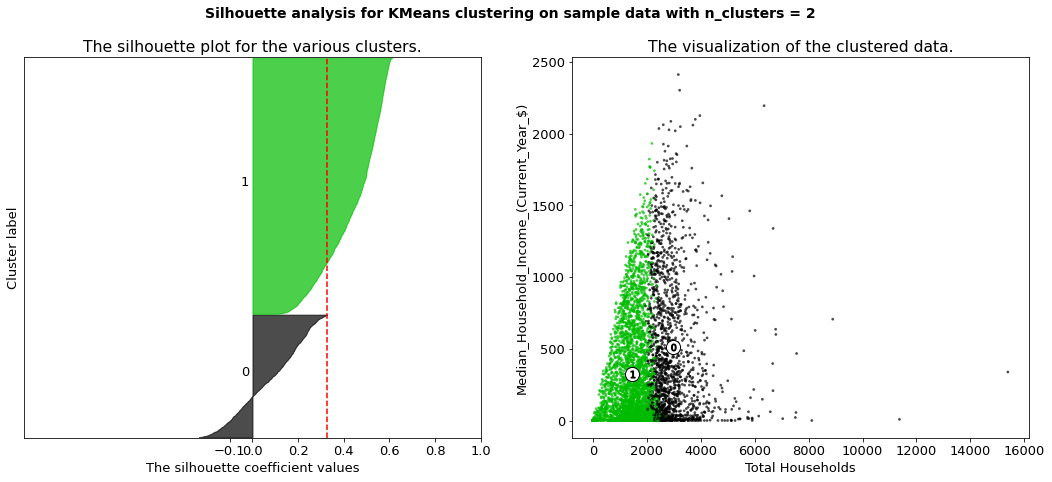

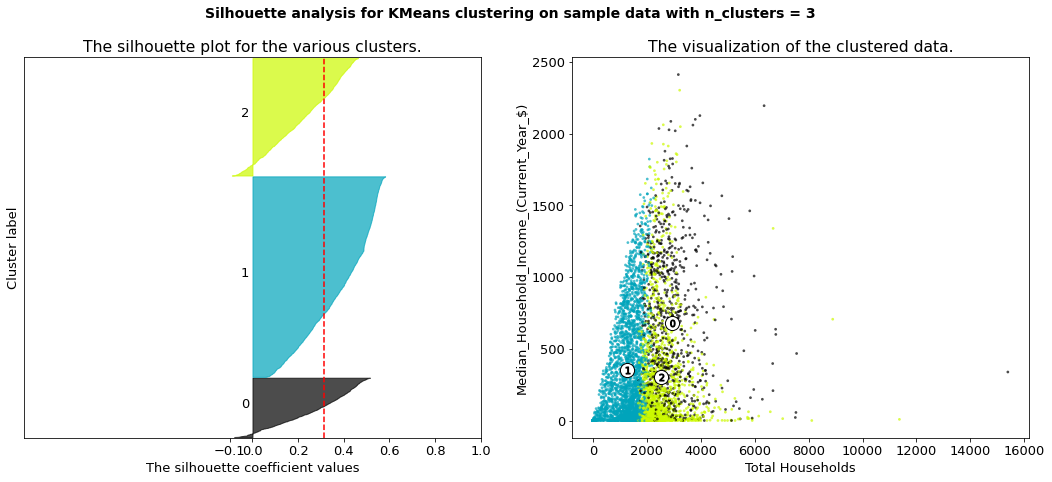

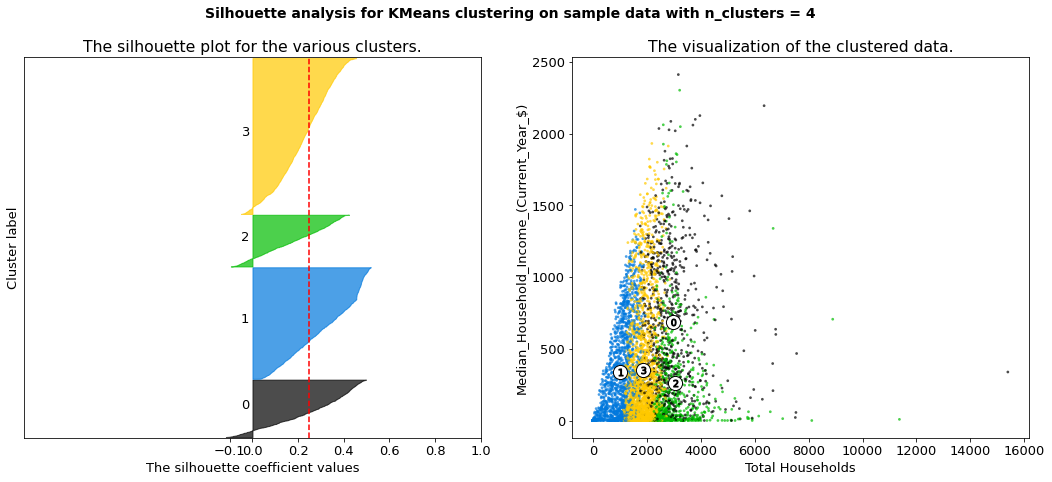

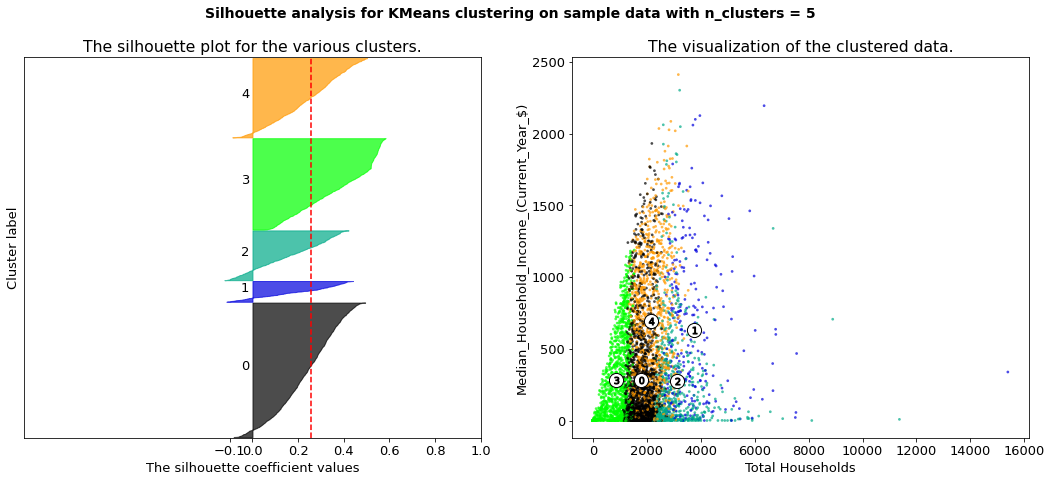

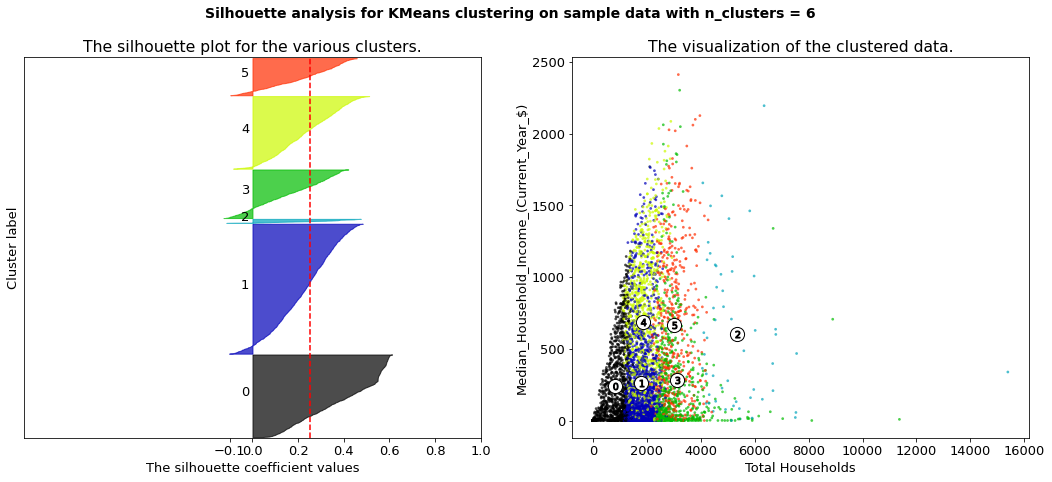

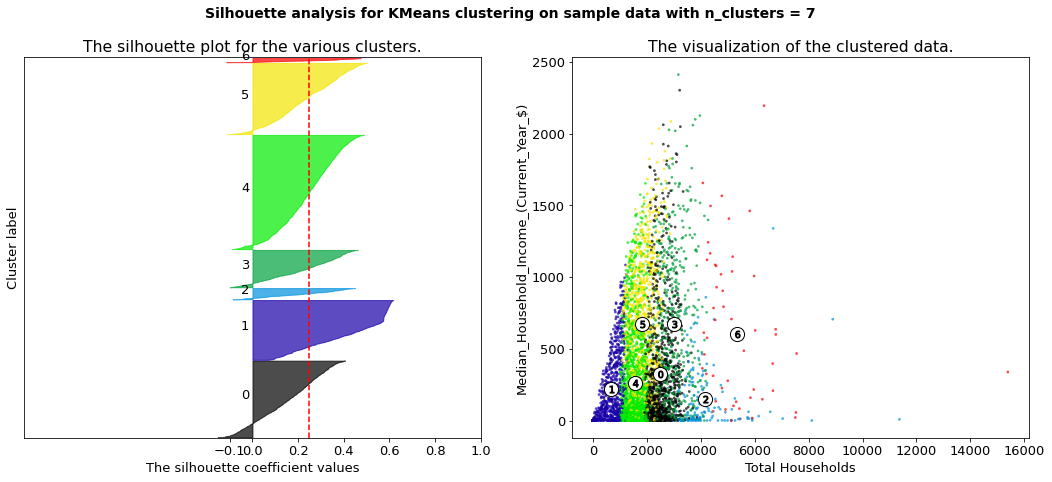

In [122]:
for n_clusters in cluster_range:
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    ax1.set_xlim([-1,1]) # this is for the silhouette score
    ax1.set_ylim([0, len(X2) + (n_clusters +1)* 10])
    
    cluster = KMeans(n_clusters=n_clusters,random_state=42)
    cluster_labels = cluster.fit_predict(X2)
    
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X2, cluster_labels)
    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X2[:, 0], X2[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = cluster.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Total Households")
    ax2.set_ylabel("Median_Household_Income_(Current_Year_$)")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
    

For n_clusters = 2 The average silhouette_score is : 0.32684971655871986
For n_clusters = 3 The average silhouette_score is : 0.31467121429580264
For n_clusters = 4 The average silhouette_score is : 0.2484488013315319
For n_clusters = 5 The average silhouette_score is : 0.2579604228024084
For n_clusters = 6 The average silhouette_score is : 0.25331399529835924
For n_clusters = 7 The average silhouette_score is : 0.24703666896145077


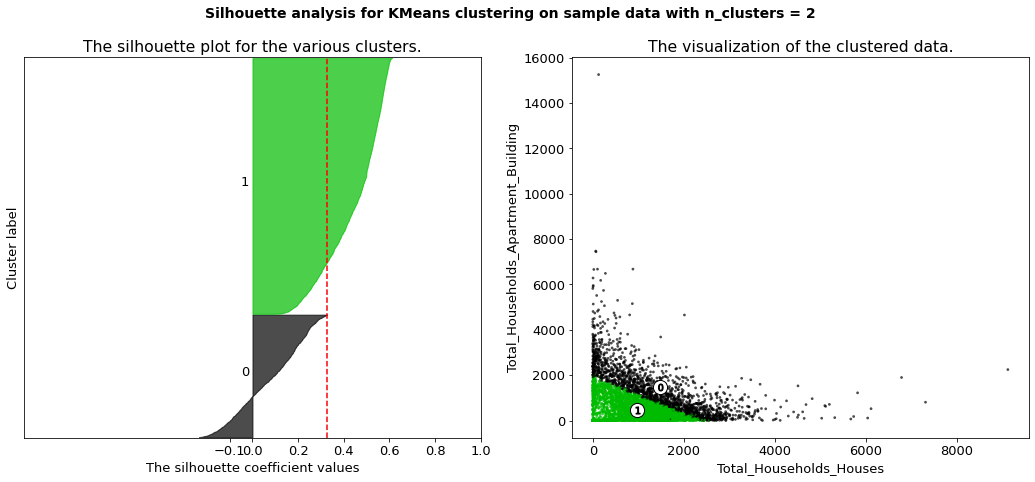

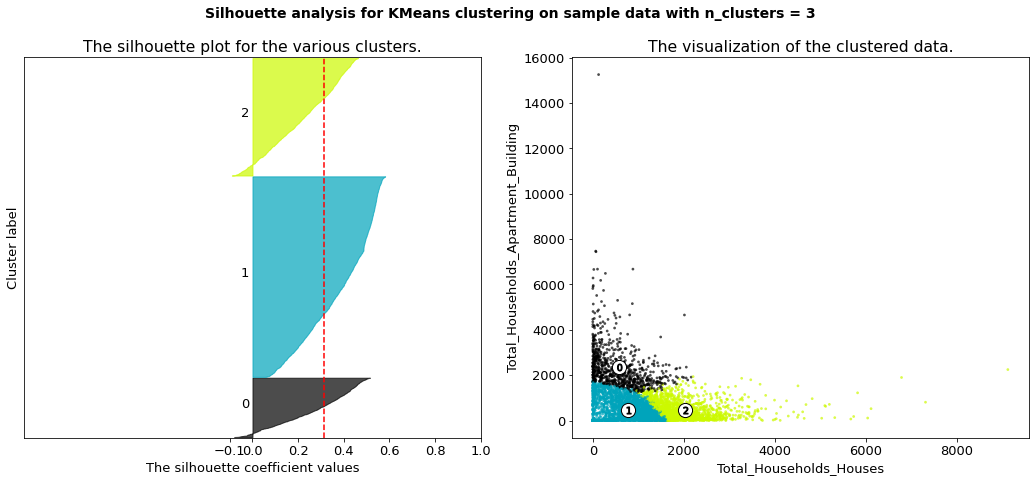

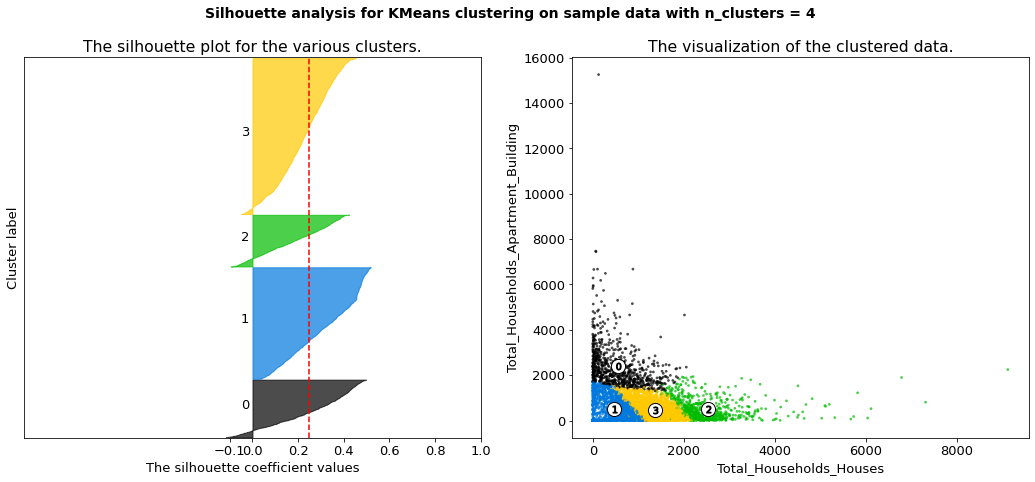

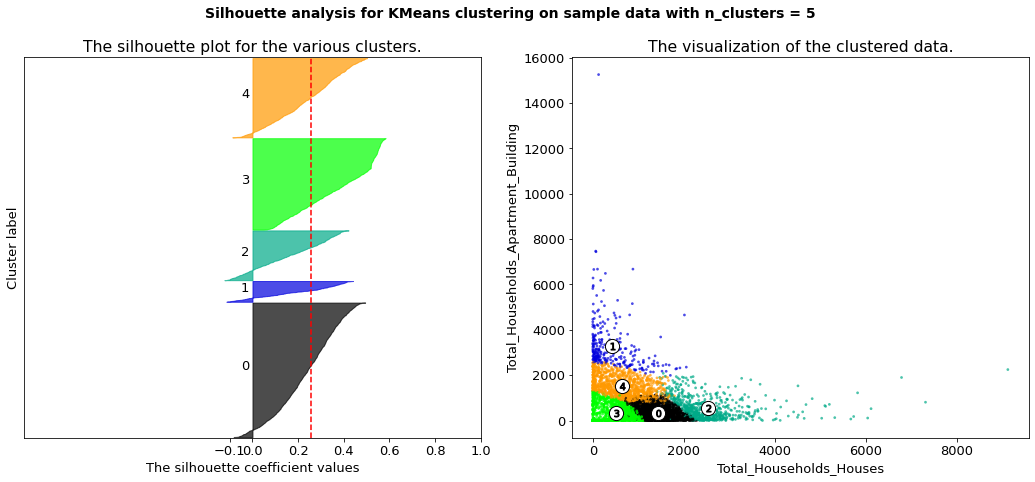

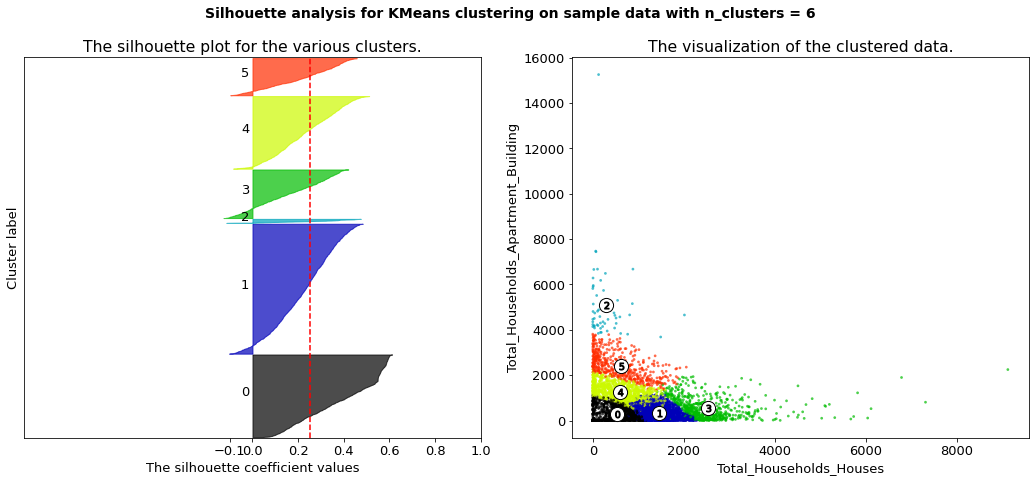

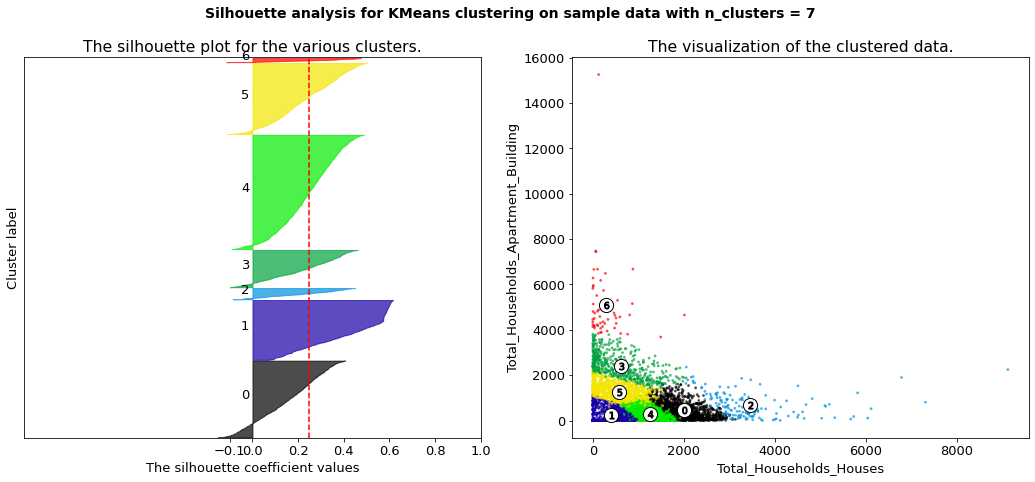

In [123]:
for n_clusters in cluster_range:
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    ax1.set_xlim([-1,1]) # this is for the silhouette score
    ax1.set_ylim([0, len(X2) + (n_clusters +1)* 10])
    
    cluster = KMeans(n_clusters=n_clusters,random_state=42)
    cluster_labels = cluster.fit_predict(X2)
    
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X2, cluster_labels)
    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X2[:, 6], X2[:, 7], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = cluster.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 6], centers[:, 7], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
#         raise Exception(c)
        ax2.scatter(c[6], c[7], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Total_Households_Houses")
    ax2.set_ylabel("Total_Households_Apartment_Building")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
    

For n_clusters = 2 The average silhouette_score is : 0.32684971655871986
For n_clusters = 3 The average silhouette_score is : 0.31467121429580264
For n_clusters = 4 The average silhouette_score is : 0.2484488013315319
For n_clusters = 5 The average silhouette_score is : 0.2579604228024084
For n_clusters = 6 The average silhouette_score is : 0.25331399529835924
For n_clusters = 7 The average silhouette_score is : 0.24703666896145077


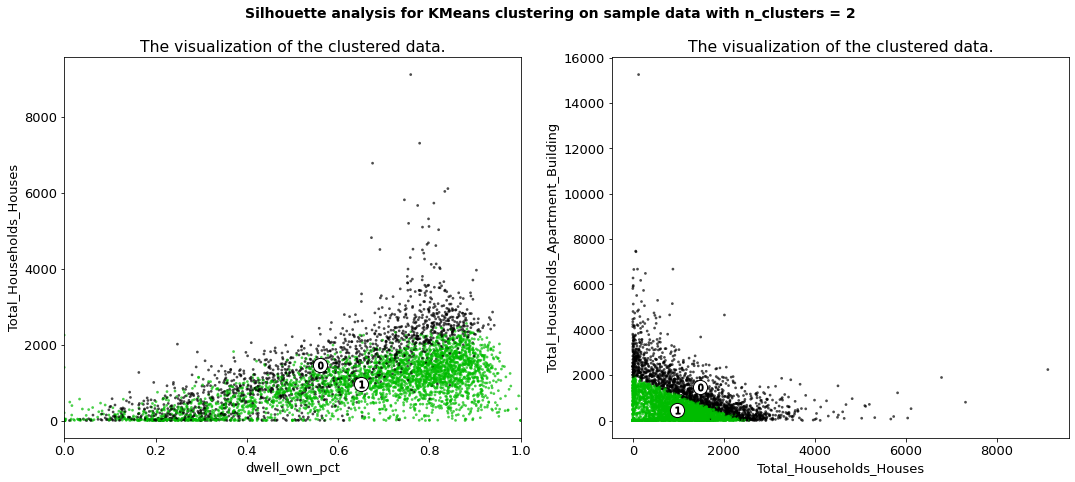

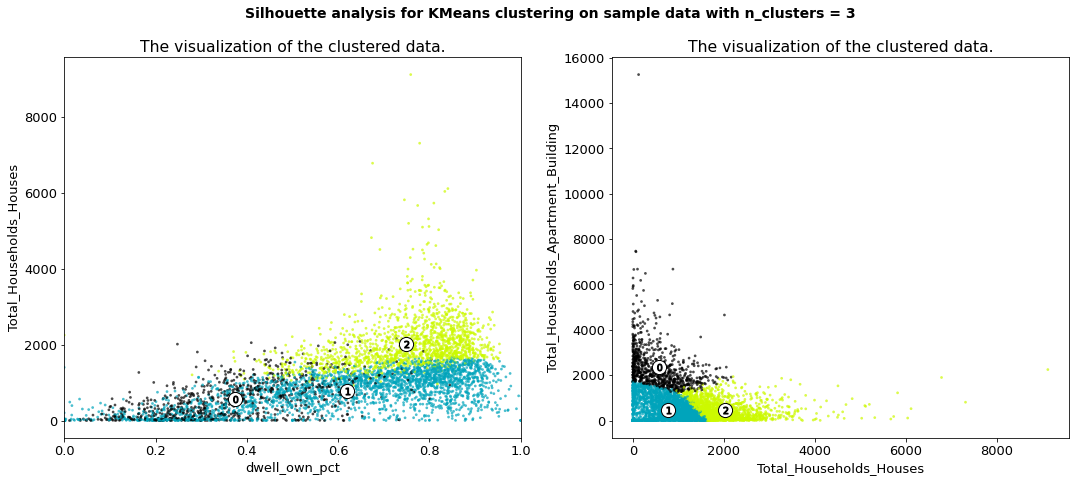

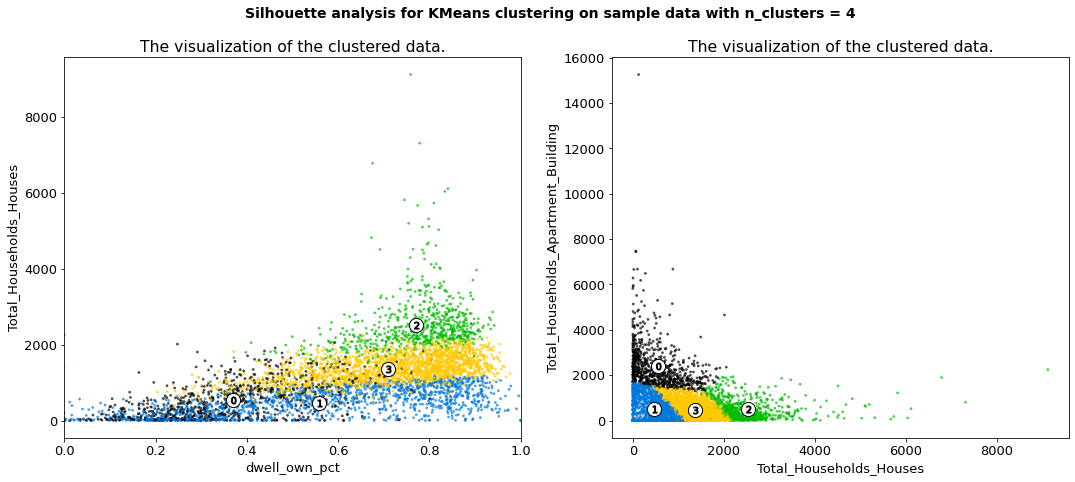

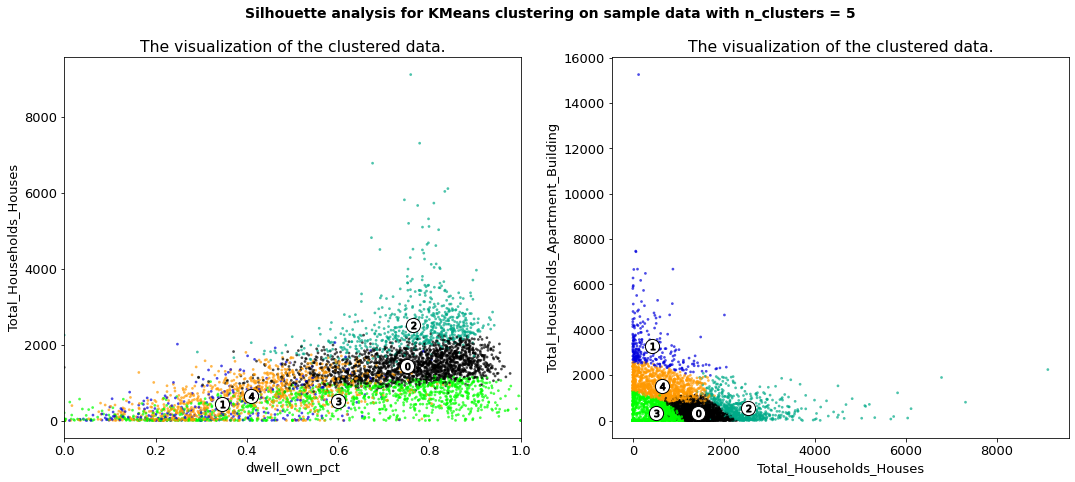

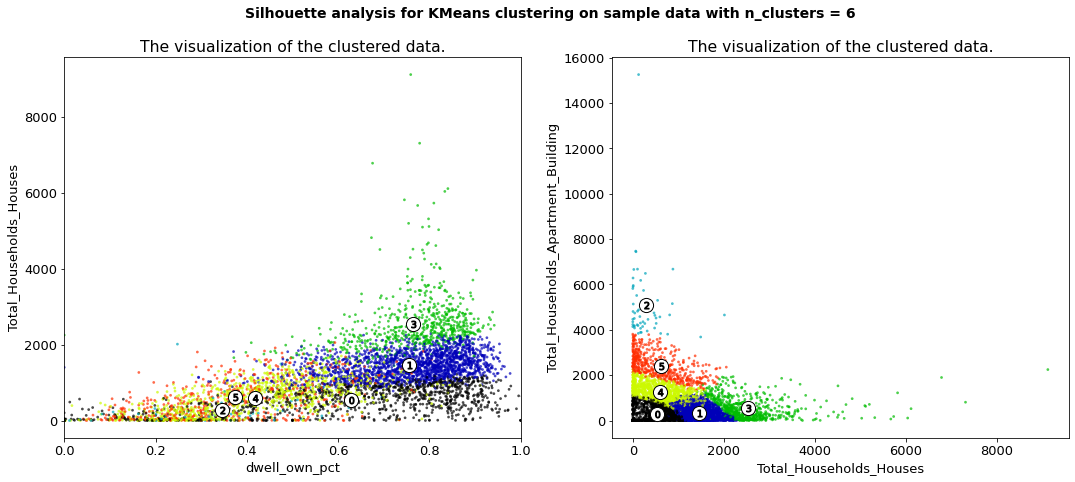

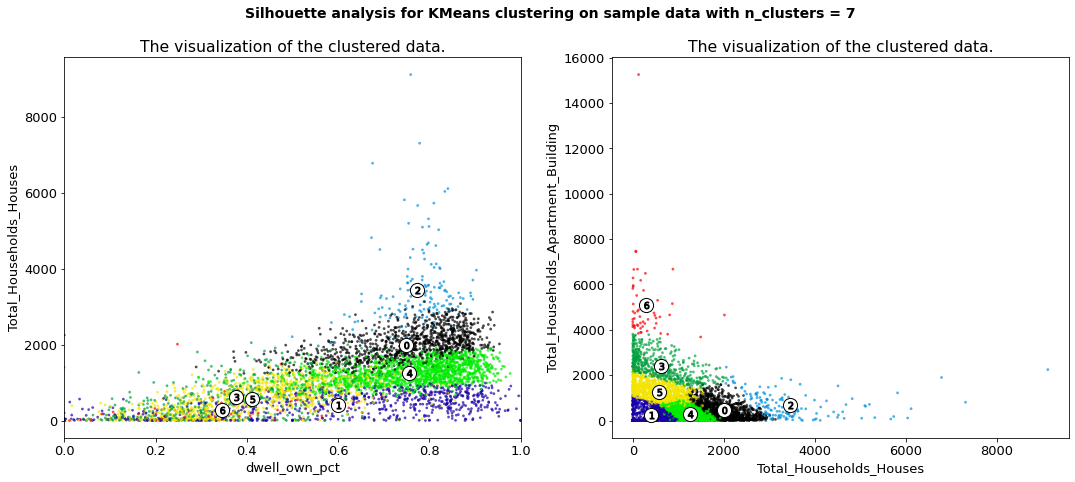

In [124]:
for n_clusters in cluster_range:
    fig, (ax2, ax3) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    ax1.set_xlim([-1,1]) # this is for the silhouette score
    ax1.set_ylim([0, len(X2) + (n_clusters +1)* 10])
    
    cluster = KMeans(n_clusters=n_clusters,random_state=42)
    cluster_labels = cluster.fit_predict(X2)
    
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X2, cluster_labels)
    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X2[:, 16], X2[:, 6], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = cluster.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 16], centers[:, 6], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
#         raise Exception(c)
        ax2.scatter(c[16], c[6], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    
    ax2.set_xlim(0,1)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("dwell_own_pct")
    ax2.set_ylabel("Total_Households_Houses")
    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax3.scatter(X2[:, 6], X2[:, 7], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Draw white circles at cluster centers
    ax3.scatter(centers[:, 6], centers[:, 7], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
#         raise Exception(c)
        ax3.scatter(c[6], c[7], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax3.set_title("The visualization of the clustered data.")
    ax3.set_xlabel("Total_Households_Houses")
    ax3.set_ylabel("Total_Households_Apartment_Building")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
    

In [1583]:
inertias = []
centroids = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X2)
    inertias.append(kmeans.inertia_)
    centroids.append(kmeans.cluster_centers_)

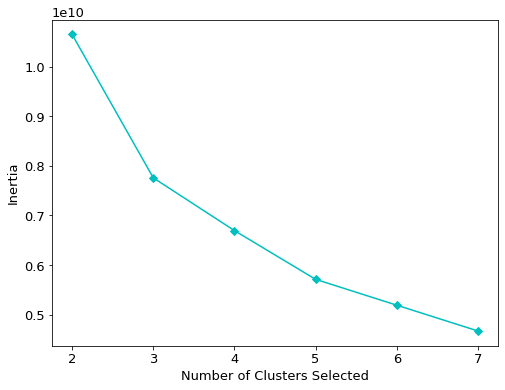

In [1584]:
plt.figure(figsize=(8,6))
plt.plot(cluster_range, inertias, '-D', color='c')
plt.xticks(cluster_range)
plt.xlabel("Number of Clusters Selected")
plt.ylabel("Inertia")
plt.show()

In [125]:
df2["labels"] = labels2

In [126]:
df2["labels"].value_counts()

0    2650
1    1563
2     787
Name: labels, dtype: int64

In [127]:
cluster_mean = df2.groupby('labels').mean()

In [128]:
cluster_mean

Total_Households  \
labels                     
0            1271.416226   
1            2529.675624   
2            2942.496823   

        Total_Households_For_Period_Of_Construction_Built_Before_1961  \
labels                                                                  
0                                              349.810943               
1                                              300.989123               
2                                              679.933926               

        Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980  \
labels                                                                            
0                                              397.866415                         
1                                              627.914907                         
2                                              942.073698                         

        Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990  \
labels                                                                            
0                                              168.868302                         
1                                              366.321817                         
2                                              358.767471                         

        Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000  \
labels                                                                            
0                                              142.536981                         
1                                              370.981446                         
2                                              294.884371                         

        Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005  \
labels                                                                            
0                                               68.194340                         
1                                              250.062060                         
2                                              154.277001                         

        Total_Households_For_Structure_Type_Houses  \
labels                                               
0                                       776.691321   
1                                      2026.273193   
2                                       570.091487   

        Total_Households_For_Structure_Type_Apartment,_Building_Low_And_High_Rise  \
labels                                                                              
0                                              483.010943                           
1                                              477.014075                           
2                                             2363.900889                           

        Total_Households_For_Structure_Type_Other_Dwelling_Types  \
labels                                                             
0                                               11.713962          
1                                               26.388356          
2                                                8.504447          

        Population_Per_Household  Percentage_after_2005  pct_1961_1980  \
labels                                                                   
0                       2.588994               0.119261       8.977170   
1                       2.754991               0.209939      13.511188   
2                       2.118309               0.150757       3.709042   

        pct_1981_1990  pct_1991_2000  pct_2000_2005  pct_2005_2016  \
labels                                                               
0            0.487043       2.240500      -0.151857       9.972007   
1            1.013693       4.053799       0.333627       7.393615   
2           -0.384564       0.072571      -0.082556       7.639715   

        Dwell_own_pct  Dwell_rent_pct  Dwell_none_pct  
labels               

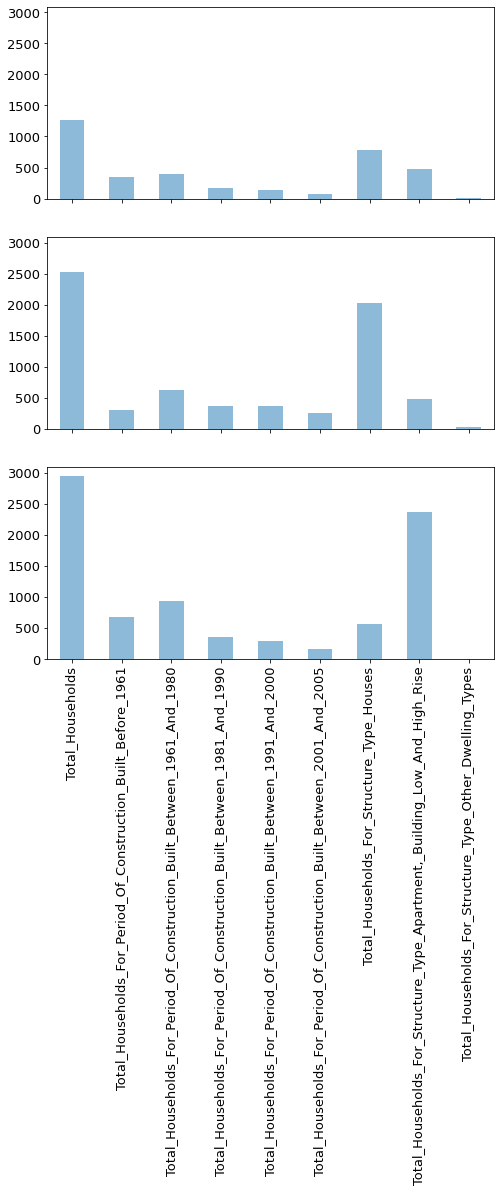

In [129]:
fig, axes = plt.subplots(3,1, sharex=True, sharey=True)
fig.set_size_inches(8,12)

for i in range(len(cluster_mean)):
    row_mean = cluster_mean.iloc[i,:9]
    row_mean.plot(kind='bar',ax=axes[i],alpha=0.5)

fig.suptitle("")
plt.show()

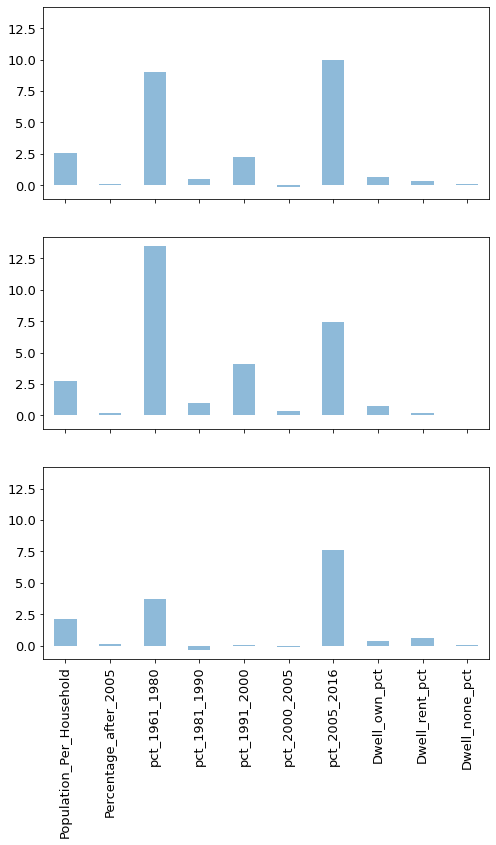

In [130]:
fig, axes = plt.subplots(3,1, sharex=True, sharey=True)
fig.set_size_inches(8,12)

for i in range(len(cluster_mean)):
    row_mean = cluster_mean.iloc[i,9:]
    row_mean.plot(kind='bar',ax=axes[i],alpha=0.5)

fig.suptitle("")
plt.show()

In [131]:
df_0 = df2[df2["labels"]==0]

In [132]:
df_1 = df2[df2["labels"]==1]

In [133]:
df_2 = df2[df2["labels"]==2]

In [134]:
df_0.shape, df_1.shape, df_2.shape

((2650, 20), (1563, 20), (787, 20))

In [135]:
df_0 = df_0.drop("labels", axis=1)

In [136]:
df_1 = df_1.drop("labels", axis=1)

In [137]:
df_2 = df_2.drop("labels", axis=1)

In [138]:
birch2 = Birch(n_clusters=3)

In [139]:
birch2_label = birch2.fit_predict(X2)

In [140]:
silhouette_score(X2, birch2_label)

0.1868713957573781

#### Check features for each cluster

In [141]:
df_0.describe()

Total_Households  \
count       2650.000000   
mean        1271.416226   
std          495.296889   
min            0.000000   
25%         1020.250000   
50%         1365.000000   
75%         1628.000000   
max         2255.000000   

       Total_Households_For_Period_Of_Construction_Built_Before_1961  \
count                                        2650.000000               
mean                                          349.810943               
std                                           366.199264               
min                                             0.000000               
25%                                            43.000000               
50%                                           223.000000               
75%                                           579.000000               
max                                          1822.000000               

       Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980  \
count                                        2650.000000                         
mean                                          397.866415                         
std                                           324.955720                         
min                                             0.000000                         
25%                                           134.000000                         
50%                                           325.000000                         
75%                                           599.750000                         
max                                          1491.000000                         

       Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990  \
count                                        2650.000000                         
mean                                          168.868302                         
std                                           189.771283                         
min                                             0.000000                         
25%                                            46.000000                         
50%                                           108.000000                         
75%                                           212.750000                         
max                                          1263.000000                         

       Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000  \
count                                        2650.000000                         
mean                                          142.536981                         
std                                           183.441101                         
min                                             0.000000                         
25%                                            35.000000                         
50%                                            76.000000                         
75%                                           175.000000                         
max                                          1383.000000                         

       Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005  \
count                                        2650.000000                         
mean                                           68.194340                         
std                                           126.726523                         
min                                             0.000000                         
25%                                            10.000000                         
50%                                            25.000000                         
75%                                            68.000000                         
max                                          1165.000000                         

       Total_Households_For_Structure_Type_Houses  \
count                                 2650.000000   
mean                                   776.691321   

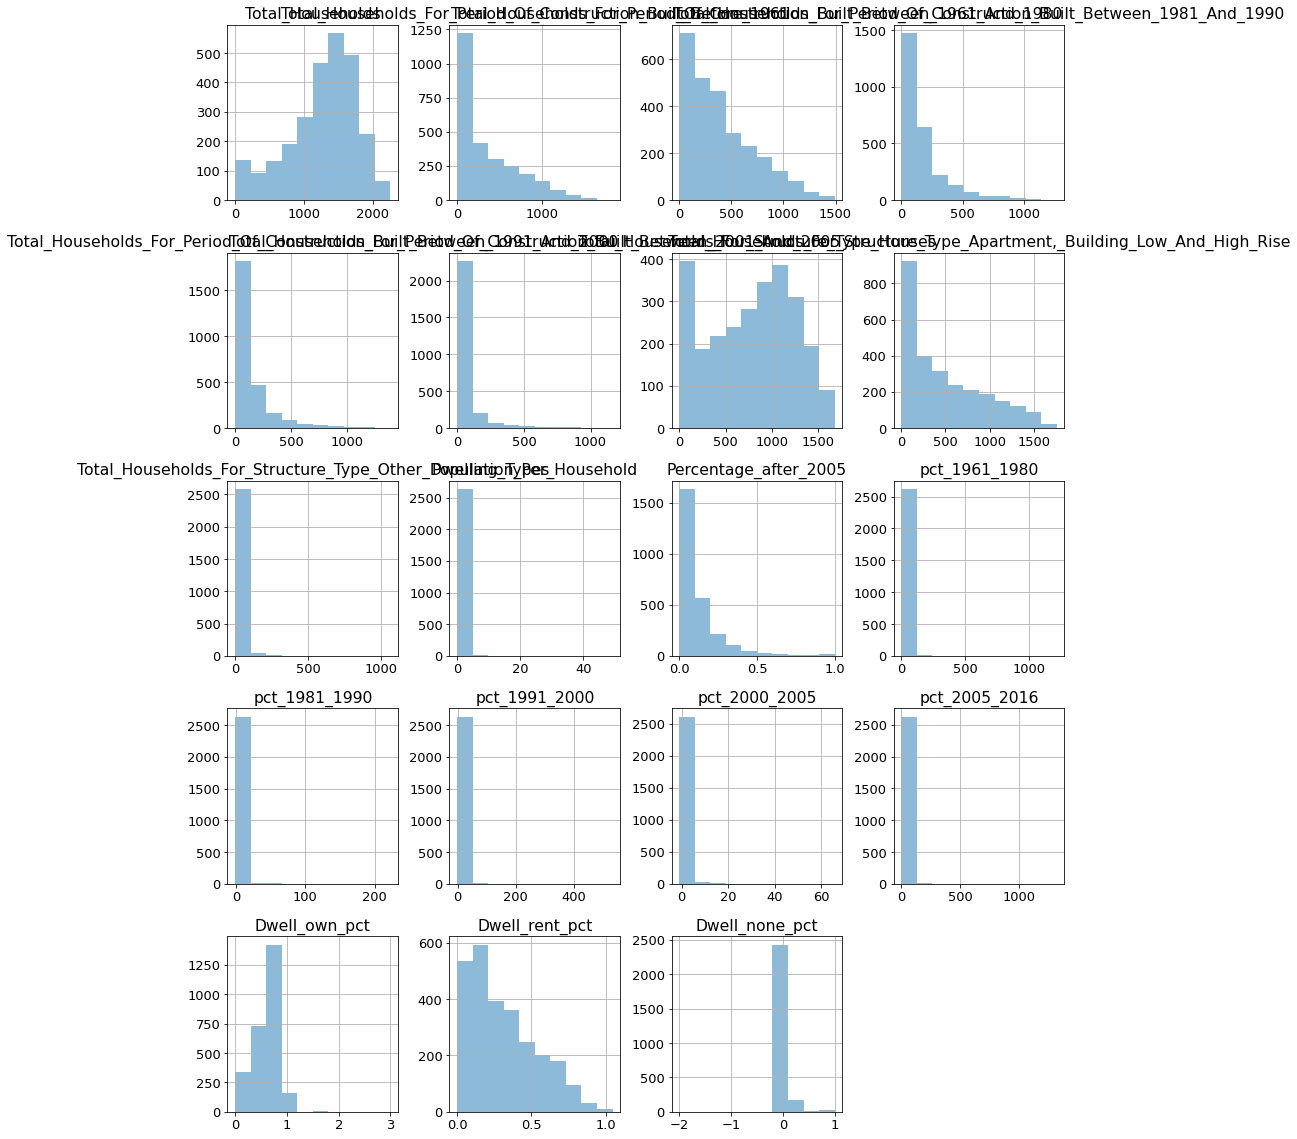

In [142]:
df_0.hist(figsize=(15,20),alpha=0.5)
plt.show()

In [143]:
df_1.describe()

Total_Households  \
count       1563.000000   
mean        2529.675624   
std          737.967504   
min         1620.000000   
25%         2068.000000   
50%         2363.000000   
75%         2789.000000   
max        11368.000000   

       Total_Households_For_Period_Of_Construction_Built_Before_1961  \
count                                        1563.000000               
mean                                          300.989123               
std                                           396.587814               
min                                             0.000000               
25%                                            29.000000               
50%                                           141.000000               
75%                                           398.500000               
max                                          2302.000000               

       Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980  \
count                                        1563.000000                         
mean                                          627.914907                         
std                                           469.458051                         
min                                             0.000000                         
25%                                           229.000000                         
50%                                           592.000000                         
75%                                           932.500000                         
max                                          2386.000000                         

       Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990  \
count                                        1563.000000                         
mean                                          366.321817                         
std                                           302.228248                         
min                                             0.000000                         
25%                                           140.000000                         
50%                                           301.000000                         
75%                                           497.500000                         
max                                          1740.000000                         

       Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000  \
count                                        1563.000000                         
mean                                          370.981446                         
std                                           315.682240                         
min                                             0.000000                         
25%                                           137.000000                         
50%                                           286.000000                         
75%                                           506.000000                         
max                                          2211.000000                         

       Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005  \
count                                        1563.000000                         
mean                                          250.062060                         
std                                           288.174544                         
min                                             0.000000                         
25%                                            51.000000                         
50%                                           149.000000                         
75%                                           324.000000                         
max                                          1745.000000                         

       Total_Households_For_Structure_Type_Houses  \
count                                 1563.000000   
mean                                  2026.273193   

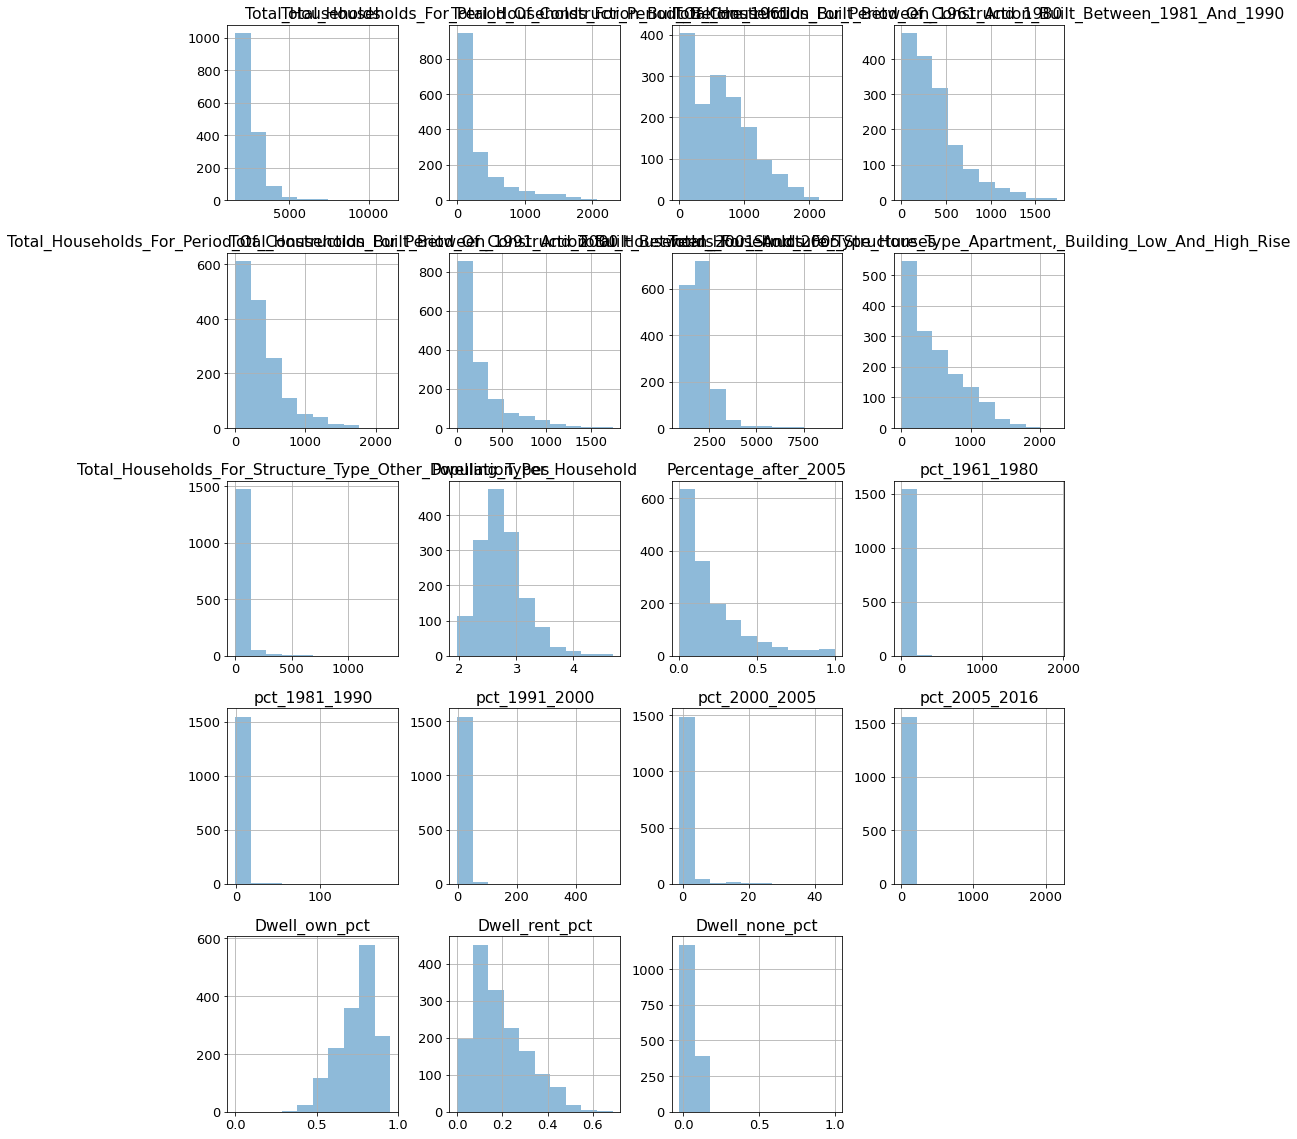

In [144]:
df_1.hist(figsize=(15,20),alpha=0.5)
plt.show()

In [145]:
df_2.describe()

Total_Households  \
count        787.000000   
mean        2942.496823   
std          964.771342   
min         1697.000000   
25%         2357.500000   
50%         2751.000000   
75%         3245.000000   
max        15388.000000   

       Total_Households_For_Period_Of_Construction_Built_Before_1961  \
count                                         787.000000               
mean                                          679.933926               
std                                           485.436650               
min                                             0.000000               
25%                                           275.500000               
50%                                           611.000000               
75%                                          1050.500000               
max                                          2411.000000               

       Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980  \
count                                         787.000000                         
mean                                          942.073698                         
std                                           490.573168                         
min                                             0.000000                         
25%                                           580.500000                         
50%                                           915.000000                         
75%                                          1252.500000                         
max                                          3547.000000                         

       Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990  \
count                                         787.000000                         
mean                                          358.767471                         
std                                           244.489140                         
min                                             0.000000                         
25%                                           190.500000                         
50%                                           301.000000                         
75%                                           463.000000                         
max                                          1590.000000                         

       Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000  \
count                                         787.000000                         
mean                                          294.884371                         
std                                           259.832072                         
min                                             0.000000                         
25%                                           124.000000                         
50%                                           214.000000                         
75%                                           391.500000                         
max                                          2360.000000                         

       Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005  \
count                                         787.000000                         
mean                                          154.277001                         
std                                           228.230754                         
min                                             0.000000                         
25%                                            34.000000                         
50%                                            76.000000                         
75%                                           176.000000                         
max                                          2262.000000                         

       Total_Households_For_Structure_Type_Houses  \
count                                  787.000000   
mean                                   570.091487   

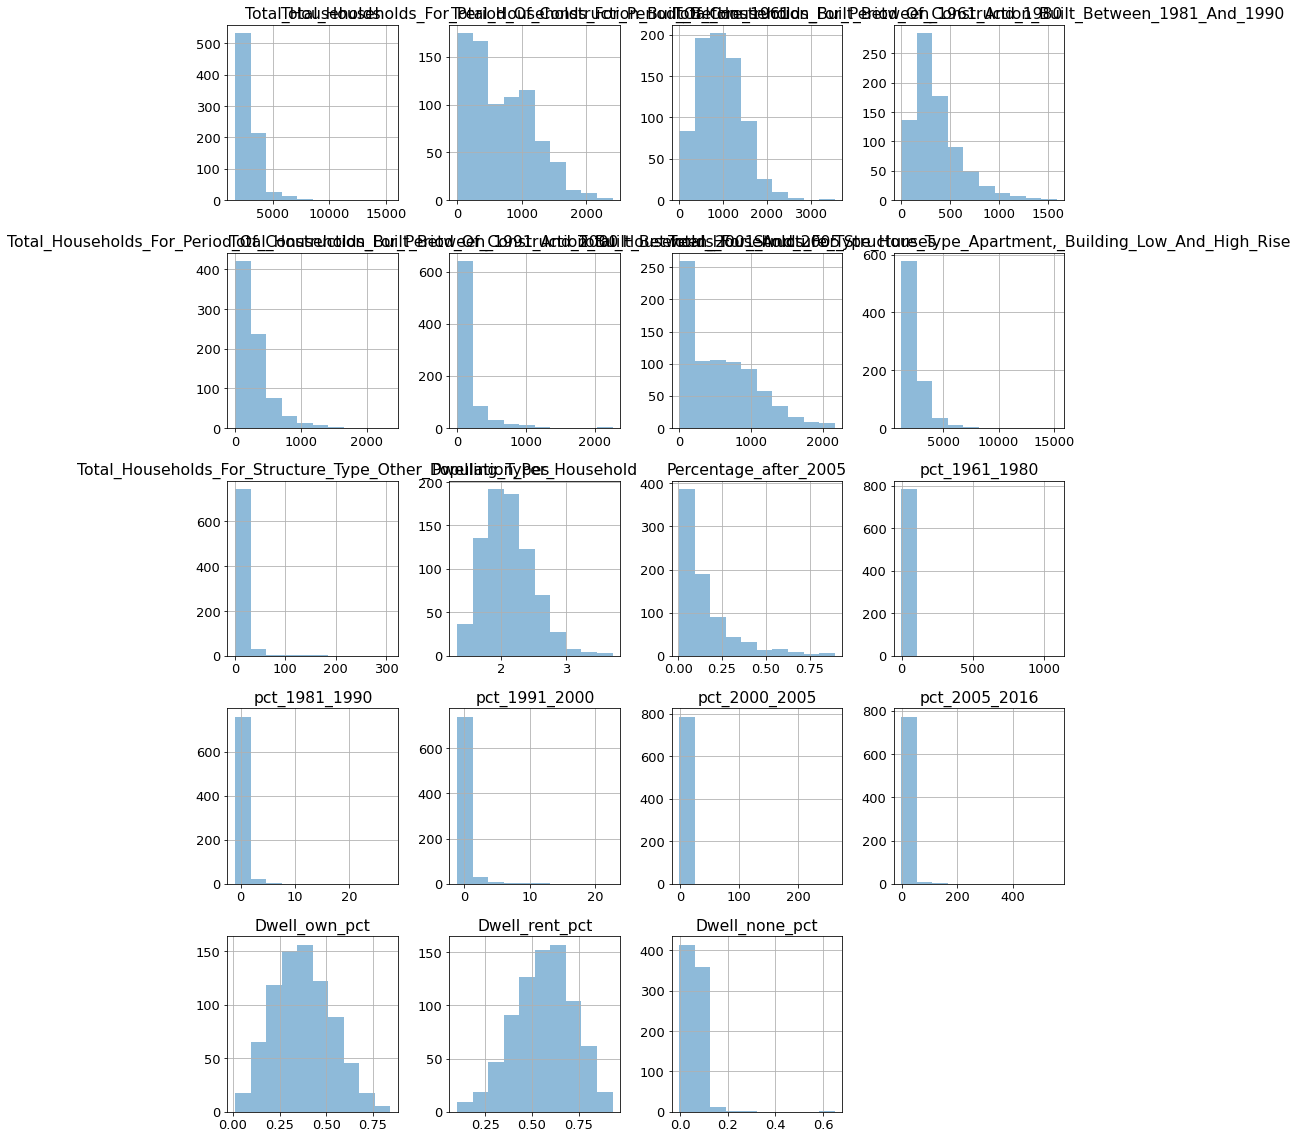

In [146]:
df_2.hist(figsize=(15,20),alpha=0.5)
plt.show()

In [147]:
df2.head()

Total_Households  \
0              1441   
1              1026   
2              2071   
3              2203   
4              1419   

   Total_Households_For_Period_Of_Construction_Built_Before_1961  \
0                                                323               
1                                                927               
2                                                  3               
3                                                133               
4                                                  0               

   Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980  \
0                                                199                         
1                                                 70                         
2                                                607                         
3                                               1695                         
4                                                  7                         

   Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990  \
0                                                 53                         
1                                                 15                         
2                                                567                         
3                                                248                         
4                                                127                         

   Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000  \
0                                                182                         
1                                                  3                         
2                                                651                         
3                                                 79                         
4                                                938                         

   Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005  \
0                                                526                         
1                                                  0                         
2                                                106                         
3                                                  0                         
4                                                143                         

   Total_Households_For_Structure_Type_Houses  \
0                                         911   
1                                         792   
2                                        1418   
3                                        1397   
4                                         914   

   Total_Households_For_Structure_Type_Apartment,_Building_Low_And_High_Rise  \
0                                                525                           
1                                                230                           
2                                                652                           
3                                                806                           
4                                                505                           

   Total_Households_For_Structure_Type_Other_Dwelling_Types  \
0                                                  5          
1                                                  4          
2                                                  1          
3                                                  0          
4                                                  0          

   Population_Per_Household  Percentage_after_2005  pct_1961_1980  \
0                  2.811242               0.109646      -0.383901   
1                  2.269981               0.010721      -0.924488   
2                  2.547562               0.066152     201.333333   
3                  2.708579               0.021788      11.744361   
4                  2.985201               0.143763       6.000000   

   pct_19

<AxesSubplot:xlabel='Total_Households', ylabel='Count'>

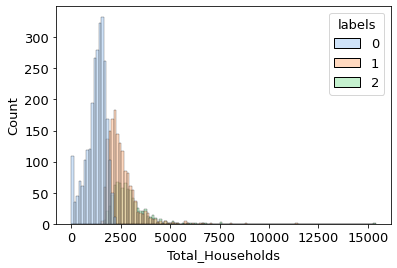

In [148]:
sns.histplot(data=df2,x=df2.columns[0], hue="labels",palette="pastel")

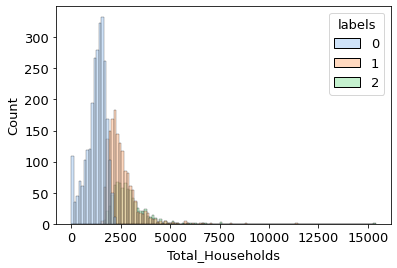

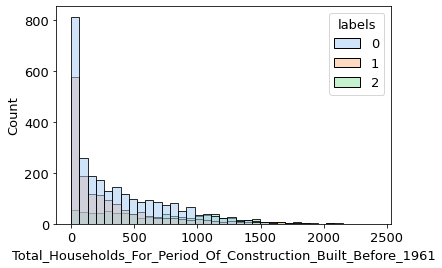

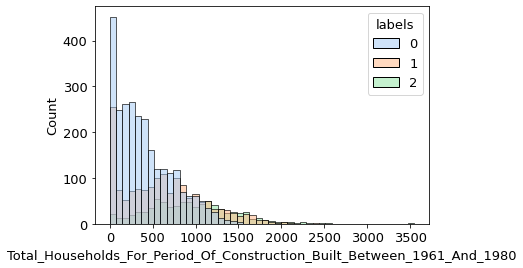

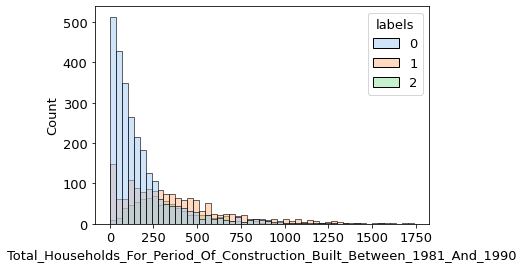

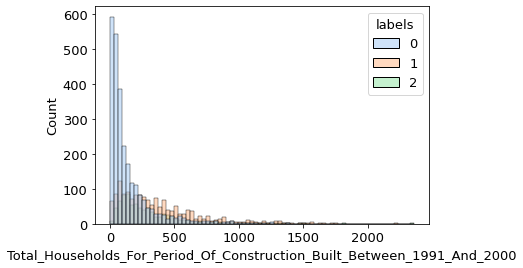

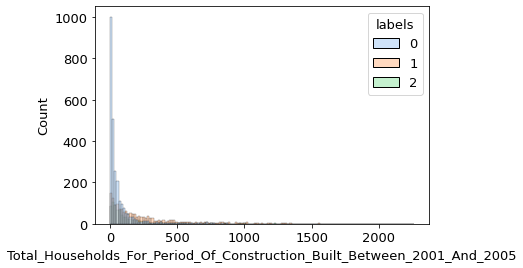

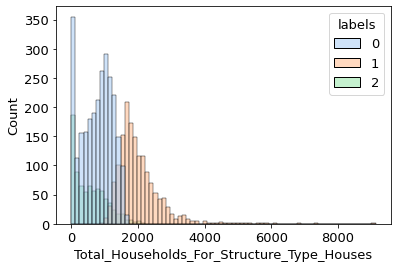

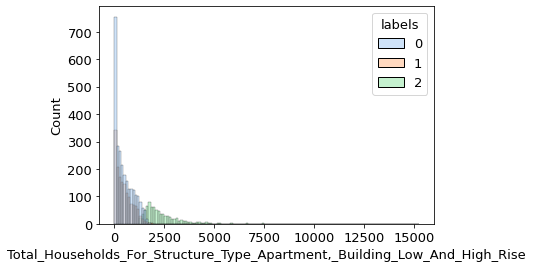

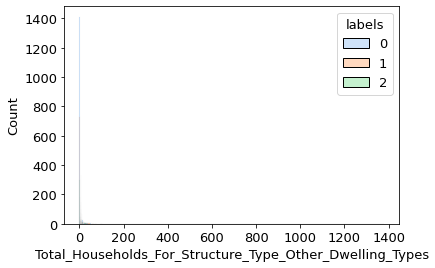

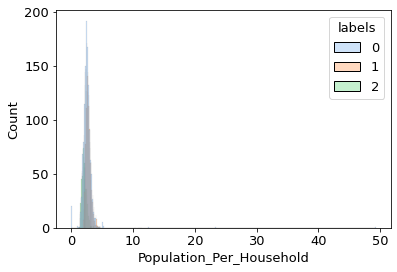

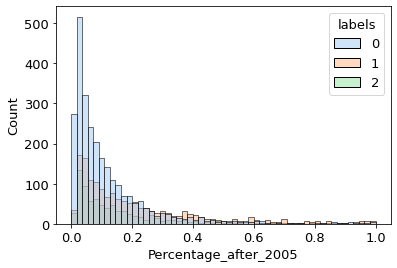

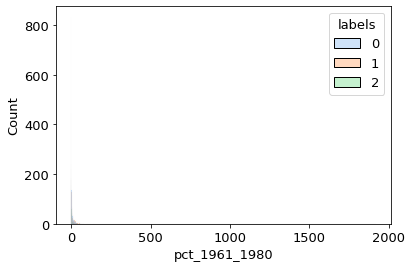

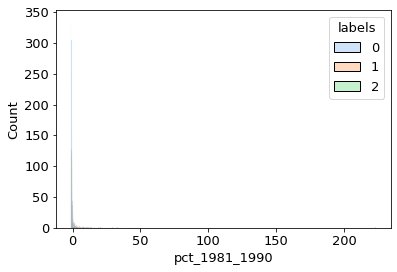

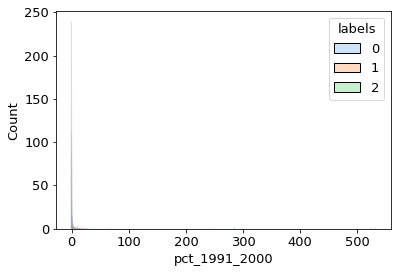

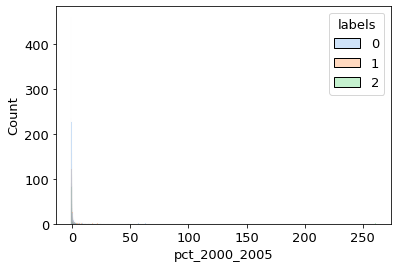

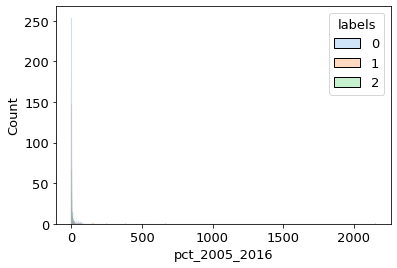

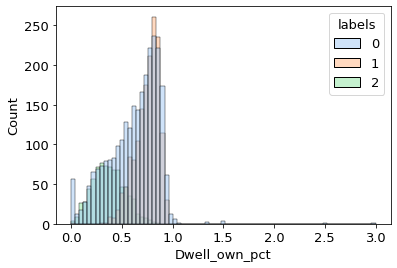

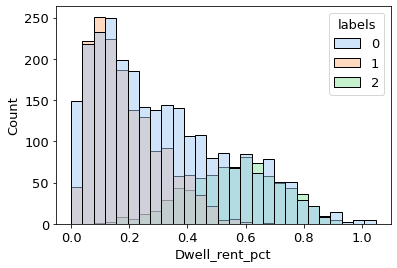

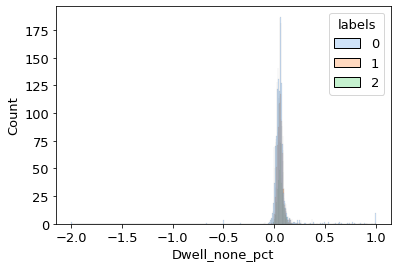

In [152]:
for i in range(df2.shape[1]-1):
    sns.histplot(data=df2,x=df2.columns[i], hue="labels",palette="pastel")
    plt.show()

### Question g
Among the tools we have discussed in class, you may choose whatever appropriate 
estimation modeling tools you wish, in order to construct the best possible 
predictions. Make sure you make appropriate use of the training and validation 
samples to evaluate performance. 

#### Pre-reqs

In [153]:
!pip install dmba

In [154]:
from dmba import classificationSummary

In [155]:
from sklearn import linear_model

In [156]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

### DECSION TREE REGRESSOR

#### Data Partition (0,1,2)

In [1153]:
census_df["labels"] = labels2

In [1154]:
df_0_X=df_0
df_1_X=df_1
df_2_X=df_2

In [1155]:
df_0_withy = census_df[census_df["labels"]==0]
df_1_withy = census_df[census_df["labels"]==1]
df_2_withy = census_df[census_df["labels"]==2]

In [1156]:
df_0_y=df_0_withy['Median_Household_Income_(Current_Year_$)']
df_1_y=df_1_withy['Median_Household_Income_(Current_Year_$)']
df_2_y=df_2_withy['Median_Household_Income_(Current_Year_$)']

In [1157]:
test_size = 0.2
seed = 1

In [1158]:
df_0_Xtrain, df_0_Xtest, df_0_ytrain, df_0_ytest = train_test_split(df_0_X, df_0_y, test_size=test_size, random_state=seed)
df_1_Xtrain, df_1_Xtest, df_1_ytrain, df_1_ytest = train_test_split(df_1_X, df_1_y, test_size=test_size, random_state=seed)
df_2_Xtrain, df_2_Xtest, df_2_ytrain, df_2_ytest = train_test_split(df_2_X, df_2_y, test_size=test_size, random_state=seed)

#### Full Model

In [1159]:
X=census_df.drop(['Median_Household_Income_(Current_Year_$)','labels'], axis=1)
y=census_df['Median_Household_Income_(Current_Year_$)']

In [1160]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [1161]:
dt_reg = DecisionTreeRegressor(random_state=seed)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [1162]:
y_pred = dt_reg.predict(X_test)

In [1163]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 18294.516170000003
Mean Squared Error: 1343007630.0440354
Root Mean Squared Error: 36647.06850546214


In [1164]:
r2_score(y_test, y_pred)

-0.11620917007616649

In [1165]:
#Hyper-Parameter Tuning

In [1166]:
# parameters={"splitter":["best","random"],
#             "max_depth" : [1,3,5,7,9,11,12],
#            "min_samples_leaf":[50,100,150,200],
#            "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
#            "max_features":["auto","log2","sqrt",None],
#            "max_leaf_nodes":[None,10,20,30,40,50]} 

In [1167]:
parameters={"splitter":["best","random"],
            "max_depth" : [5,7,10,12],
           "min_samples_leaf":[10,50,100],
#            "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt"],
           "max_leaf_nodes":[10,30,50]} 

In [1170]:
from sklearn.model_selection import GridSearchCV

In [1171]:
dt_reg_tune=DecisionTreeRegressor(random_state=seed)
tuning_model=GridSearchCV(dt_reg,param_grid=parameters,scoring='neg_mean_absolute_error',cv=5,verbose=1)

In [1172]:
tuning_model.fit(X_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:    8.2s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [5, 7, 10, 12],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'max_leaf_nodes': [10, 30, 50],
                         'min_samples_leaf': [10, 50, 100],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error', verbose=1)

In [1173]:
tuning_model.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 30,
 'min_samples_leaf': 10,
 'splitter': 'best'}

In [1174]:
tuning_model.best_score_

-13747.931117641656

In [1175]:
tuned_hyper_model = DecisionTreeRegressor(**tuning_model.best_params_)

In [1176]:
# tuned_hyper_model= DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=10,min_samples_leaf=50,min_weight_fraction_leaf=0.1,splitter='random')

In [1177]:
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto', max_leaf_nodes=30,
                      min_samples_leaf=10)

In [1178]:
tuned_pred=tuned_hyper_model.predict(X_test)

In [1179]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', metrics.mean_squared_error(y_test, tuned_pred, squared=False))

MAE: 14014.283847354778
MSE: 704623855.4366872
RMSE: 26544.75193775009


In [1180]:
r2_score(y_test, tuned_pred)

0.41436847319544656

#### CLUSTER 0

In [1181]:
#DecisionTreeRegressor
#Cluster 0
X_train=df_0_Xtrain
X_test=df_0_Xtest
y_train=df_0_ytrain
y_test=df_0_ytest
dt_reg= DecisionTreeRegressor(random_state=seed)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [1182]:
y_pred = dt_reg.predict(X_test)

In [1183]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred, squared=False))

Mean Absolute Error: 18765.09749056604
Mean Squared Error: 967322403.1510798
Root Mean Squared Error: 31101.807072115276


In [1184]:
r2_score(y_test, y_pred)

-0.08690485492927169

In [1185]:
#Hyper-Parameter Tuning

In [1186]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[50,100,150,200],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50] }

In [1187]:
from sklearn.model_selection import GridSearchCV

In [1188]:
dt_reg_tune=DecisionTreeRegressor(random_state=1)
tuning_model=GridSearchCV(dt_reg,param_grid=parameters,scoring='neg_mean_absolute_error',cv=5,verbose=1,n_jobs=-1)

In [1189]:
tuning_model.fit(X_train,y_train)

Fitting 5 folds for each of 6720 candidates, totalling 33600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 1048 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 9048 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 20248 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 33284 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 33600 out of 33600 | elapsed:   26.4s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [50, 100, 150, 200],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error', verbose=1)

In [1190]:
tuning_model.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 50,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [1191]:
tuning_model.best_score_

-16656.240006524844

In [1192]:
tuned_hyper_model= DecisionTreeRegressor(**tuning_model.best_params_)

In [1193]:
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=50,
                      min_weight_fraction_leaf=0.1)

In [1194]:
tuned_pred=tuned_hyper_model.predict(X_test)

In [1195]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', metrics.mean_squared_error(y_test, tuned_pred, squared=False))

MAE: 14980.796788444182
MSE: 481249491.76221
RMSE: 21937.399384662942


In [1196]:
r2_score(y_test, tuned_pred)

0.4592574230425476

#### CLUSTER 1

In [1197]:
#DecisionTreeRegressor
#Cluster 1
X_train=df_1_Xtrain
X_test=df_1_Xtest
y_train=df_1_ytrain
y_test=df_1_ytest
dt_reg= DecisionTreeRegressor(random_state=seed)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [1198]:
y_pred = dt_reg.predict(X_test)

In [1199]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

Mean Absolute Error: 15471.497987220448
Mean Squared Error: 792223589.8166944
Root Mean Squared Error: 28146.466737704297


In [1200]:
r2_score(y_test, y_pred)

0.08653975030308247

In [1201]:
#Hyper-Parameter Tuning

In [1202]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[50,100,150,200],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50]}

In [1203]:
from sklearn.model_selection import GridSearchCV

In [1204]:
dt_reg_tune=DecisionTreeRegressor(random_state=seed)
tuning_model=GridSearchCV(dt_reg,param_grid=parameters,scoring='neg_mean_absolute_error',cv=5,verbose=1,n_jobs=-1)

In [1205]:
tuning_model.fit(X_train,y_train)

Fitting 5 folds for each of 6720 candidates, totalling 33600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2536 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 10536 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 21736 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 33470 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 33600 out of 33600 | elapsed:   23.9s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [50, 100, 150, 200],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error', verbose=1)

In [1206]:
tuning_model.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 50,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [1207]:
tuning_model.best_score_

-12599.915143469296

In [1208]:
tuned_hyper_model = DecisionTreeRegressor(**tuning_model.best_params_)

In [1209]:
# tuned_hyper_model= DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=10,min_samples_leaf=50,min_weight_fraction_leaf=0.1,splitter='random')

In [1210]:
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=50,
                      min_weight_fraction_leaf=0.1)

In [1211]:
tuned_pred=tuned_hyper_model.predict(X_test)

In [1212]:
print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', metrics.mean_squared_error(y_test, tuned_pred, squared=False))

MAE: 12545.726518432957
MSE: 592511130.2756866
RMSE: 24341.55151742975


In [1213]:
r2_score(y_test, tuned_pred)

0.3168148841224695

#### CLUSTER 2

In [1214]:
#DecisionTreeRegressor
#Cluster 2
X_train=df_2_Xtrain
X_test=df_2_Xtest
y_train=df_2_ytrain
y_test=df_2_ytest
dt_reg= DecisionTreeRegressor(random_state=seed)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [1215]:
y_pred = dt_reg.predict(X_test)

In [1216]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

Mean Absolute Error: 11434.944113924052
Mean Squared Error: 303477380.135393
Root Mean Squared Error: 17420.60217487883


In [1217]:
r2_score(y_test, y_pred)

-0.36894443874778804

In [1218]:
#Hyper-Parameter Tuning

In [1219]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[50,100,150,200],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50] }

In [1220]:
from sklearn.model_selection import GridSearchCV

In [1221]:
dt_reg_tune=DecisionTreeRegressor(random_state=1)
tuning_model=GridSearchCV(dt_reg,param_grid=parameters,scoring='neg_mean_absolute_error',cv=5,verbose=1,n_jobs=-1)

In [1222]:
tuning_model.fit(X_train,y_train)

Fitting 5 folds for each of 6720 candidates, totalling 33600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2536 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 10536 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 21736 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 33470 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 33600 out of 33600 | elapsed:   22.1s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [50, 100, 150, 200],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error', verbose=1)

In [1223]:
tuning_model.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 50,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [1224]:
tuning_model.best_score_

-9673.107601026737

In [1225]:
tuned_hyper_model = DecisionTreeRegressor(**tuning_model.best_params_)

In [1226]:
# tuned_hyper_model= DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=10,min_samples_leaf=50,min_weight_fraction_leaf=0.1,splitter='random')

In [1227]:
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto', max_leaf_nodes=10,
                      min_samples_leaf=50, min_weight_fraction_leaf=0.1)

In [1228]:
tuned_pred=tuned_hyper_model.predict(X_test)

In [1229]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', metrics.mean_squared_error(y_test, tuned_pred, squared=False))

MAE: 8324.697626708466
MSE: 124272151.49798264
RMSE: 11147.741991003499


In [1230]:
r2_score(y_test, tuned_pred)

0.43942553277450846

### KNN REGRESSOR

#### FULL MODEL

In [1231]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [1232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [1233]:
num_folds = 10

In [1234]:
scoring = 'neg_mean_absolute_error'

In [1235]:
model = KNeighborsRegressor()

In [1236]:
kfold = KFold(n_splits = num_folds, shuffle=True, random_state=seed)

kfold.get_n_splits(X)

print(kfold)

for train_index, validate_index in kfold.split(X):
    print("TRAIN:", train_index, "VALIDATE:", validate_index)

In [1237]:
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)

In [1238]:
cv_results

array([-14427.087445, -15704.675245, -16009.614945, -14969.89281 ,
       -15628.58814 , -15737.416185, -16113.88323 , -16402.48592 ,
       -15341.61759 , -14717.21105 ])

In [1239]:
msg = "KKN: %f (%f)" % (cv_results.mean(), cv_results.std())
print(msg)

KKN: -15505.247256 (602.955830)


In [1240]:
scaler = StandardScaler().fit(X_train)
rescaledX_train = scaler.transform(X_train)

In [1241]:
k_values = np.arange(1,22)

In [1242]:
param_grid = dict(n_neighbors=k_values)

In [1243]:
model = KNeighborsRegressor()

In [1244]:
kfold = KFold(n_splits = num_folds, shuffle=True, random_state=seed)

In [1245]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

In [1246]:
grid_result = grid.fit(rescaledX_train, y_train)

In [1247]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -12775.195579 using {'n_neighbors': 13}


In [1248]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean,stdev,param))

-16451.791755 (640.103021) with: {'n_neighbors': 1}
-14755.300401 (688.210266) with: {'n_neighbors': 2}
-13975.108522 (692.970416) with: {'n_neighbors': 3}
-13617.822028 (705.271088) with: {'n_neighbors': 4}
-13414.931902 (723.443756) with: {'n_neighbors': 5}
-13191.955324 (646.824793) with: {'n_neighbors': 6}
-13007.591000 (629.470668) with: {'n_neighbors': 7}
-12948.154262 (562.274040) with: {'n_neighbors': 8}
-12871.980232 (503.824214) with: {'n_neighbors': 9}
-12825.913991 (495.391905) with: {'n_neighbors': 10}
-12805.541142 (428.118178) with: {'n_neighbors': 11}
-12814.762771 (466.682200) with: {'n_neighbors': 12}
-12775.195579 (457.029642) with: {'n_neighbors': 13}
-12798.483666 (489.174481) with: {'n_neighbors': 14}
-12780.880562 (485.344648) with: {'n_neighbors': 15}
-12790.944255 (503.899411) with: {'n_neighbors': 16}
-12793.879443 (516.561526) with: {'n_neighbors': 17}
-12795.937466 (529.144065) with: {'n_neighbors': 18}
-12810.931833 (541.750630) with: {'n_neighbors': 19}
-1

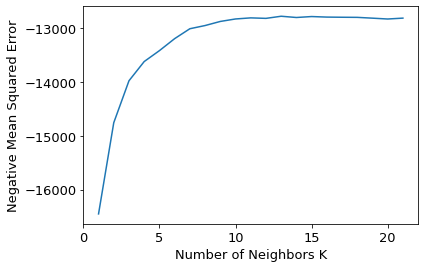

In [1249]:
plt.plot(k_values, means)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Negative Mean Squared Error")
plt.show()

In [1250]:
scaler = StandardScaler().fit(X_train)
rescaledX_train = scaler.transform(X_train)

In [1251]:
model = KNeighborsRegressor(**grid_result.best_params_)

In [1252]:
model.fit(rescaledX_train, y_train)

KNeighborsRegressor(n_neighbors=13)

In [1253]:
rescaledX_test = scaler.transform(X_test)

In [1254]:
estimates = model.predict(rescaledX_test)

In [1255]:
mean_absolute_error(y_test, estimates)

13047.486531538463

In [1256]:
mean_squared_error(y_test, estimates, squared=False)

25104.086615380573

In [1257]:
r2_score(y_test, estimates)

0.4762115044428905

#### CLUSTER 0

In [1258]:
X_train=df_0_Xtrain
X_test=df_0_Xtest
y_train=df_0_ytrain
y_test=df_0_ytest

In [1259]:
num_folds = 10

In [1260]:
scoring = 'neg_mean_absolute_error'

In [1261]:
model = KNeighborsRegressor()

In [1262]:
kfold = KFold(n_splits = num_folds, shuffle=True, random_state=seed)

In [1263]:
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)

In [1264]:
cv_results

array([-16792.99219811, -15790.36301887, -19668.29686792, -18408.25445283,
       -17783.50654717, -16816.66351887, -18439.20080189, -17141.55927358,
       -16608.17283019, -19927.90406604])

In [1265]:
msg = "KKN: %f (%f)" % (cv_results.mean(), cv_results.std())
print(msg)

KKN: -17737.691358 (1289.657348)


In [1266]:
scaler = StandardScaler().fit(X_train)
rescaledX_train = scaler.transform(X_train)

In [1267]:
k_values = np.arange(1,22)

In [1268]:
param_grid = dict(n_neighbors=k_values)

In [1269]:
model = KNeighborsRegressor()

In [1270]:
kfold = KFold(n_splits = num_folds, shuffle=True, random_state=seed)

In [1271]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

In [1272]:
grid_result = grid.fit(rescaledX_train, y_train)

In [1273]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -15150.250889 using {'n_neighbors': 16}


In [1274]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean,stdev,param))

-19839.071755 (1776.055351) with: {'n_neighbors': 1}
-17556.358816 (1176.140398) with: {'n_neighbors': 2}
-16714.267682 (1020.726427) with: {'n_neighbors': 3}
-16181.233557 (1044.076239) with: {'n_neighbors': 4}
-15690.180528 (1030.926822) with: {'n_neighbors': 5}
-15483.869873 (1031.855508) with: {'n_neighbors': 6}
-15401.092934 (1001.782028) with: {'n_neighbors': 7}
-15347.834176 (1069.677398) with: {'n_neighbors': 8}
-15247.686748 (990.117006) with: {'n_neighbors': 9}
-15261.034415 (987.214272) with: {'n_neighbors': 10}
-15252.272497 (962.101835) with: {'n_neighbors': 11}
-15248.198393 (897.619942) with: {'n_neighbors': 12}
-15194.278101 (925.172442) with: {'n_neighbors': 13}
-15161.673558 (925.959400) with: {'n_neighbors': 14}
-15167.587066 (949.680914) with: {'n_neighbors': 15}
-15150.250889 (944.187184) with: {'n_neighbors': 16}
-15159.419469 (982.886741) with: {'n_neighbors': 17}
-15195.811257 (995.579160) with: {'n_neighbors': 18}
-15164.853342 (1014.559161) with: {'n_neighbors

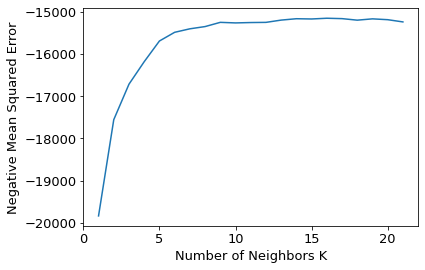

In [1275]:
plt.plot(k_values, means)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Negative Mean Squared Error")
plt.show()

In [1276]:
scaler = StandardScaler().fit(X_train)
rescaledX_train = scaler.transform(X_train)

In [1277]:
model = KNeighborsRegressor(**grid_result.best_params_)

In [1278]:
model.fit(rescaledX_train, y_train)

KNeighborsRegressor(n_neighbors=16)

In [1279]:
rescaledX_test = scaler.transform(X_test)

In [1280]:
estimates = model.predict(rescaledX_test)

In [1281]:
mean_absolute_error(y_test, estimates)

13662.07581721698

In [1282]:
mean_squared_error(y_test, estimates,squared=False)

20725.96373225544

In [1283]:
r2_score(y_test, estimates)

0.5173306181249142

#### CLUSTER 1

In [1284]:
X_train=df_1_Xtrain
X_test=df_1_Xtest
y_train=df_1_ytrain
y_test=df_1_ytest

In [1285]:
num_folds = 10

In [1286]:
scoring = 'neg_mean_absolute_error'

In [1287]:
model = KNeighborsRegressor()

In [1288]:
kfold = KFold(n_splits = num_folds, shuffle=True, random_state=seed)

In [1289]:
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)

In [1290]:
cv_results

array([-14501.608992, -15647.194   , -13559.078592, -14783.470128,
       -15583.541968, -15195.90472 , -14095.334544, -13539.2024  ,
       -14038.595984, -12151.230432])

In [1291]:
msg = "KKN: %f (%f)" % (cv_results.mean(), cv_results.std())
print(msg)

KKN: -14309.516176 (1019.497380)


In [1292]:
scaler = StandardScaler().fit(X_train)
rescaledX_train = scaler.transform(X_train)

In [1293]:
k_values = np.arange(1,22)

In [1294]:
param_grid = dict(n_neighbors=k_values)

In [1295]:
model = KNeighborsRegressor()

In [1296]:
kfold = KFold(n_splits = num_folds, shuffle=True, random_state=seed)

In [1297]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

In [1298]:
grid_result = grid.fit(rescaledX_train, y_train)

In [1299]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -11823.425947 using {'n_neighbors': 10}


In [1300]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean,stdev,param))

-15142.863824 (1485.452012) with: {'n_neighbors': 1}
-13288.145864 (1224.820325) with: {'n_neighbors': 2}
-12554.692717 (1266.063841) with: {'n_neighbors': 3}
-12307.116834 (1214.102398) with: {'n_neighbors': 4}
-12094.447184 (1119.665924) with: {'n_neighbors': 5}
-11962.072695 (1066.486142) with: {'n_neighbors': 6}
-11898.448614 (1049.040740) with: {'n_neighbors': 7}
-11873.689195 (987.039440) with: {'n_neighbors': 8}
-11845.229746 (1060.656441) with: {'n_neighbors': 9}
-11823.425947 (990.654600) with: {'n_neighbors': 10}
-11829.895799 (978.555806) with: {'n_neighbors': 11}
-11897.059735 (916.613386) with: {'n_neighbors': 12}
-11903.828990 (953.410495) with: {'n_neighbors': 13}
-11917.283158 (899.839129) with: {'n_neighbors': 14}
-11917.463978 (881.395302) with: {'n_neighbors': 15}
-11901.508491 (884.692195) with: {'n_neighbors': 16}
-11886.213012 (903.379324) with: {'n_neighbors': 17}
-11883.590364 (932.931426) with: {'n_neighbors': 18}
-11879.847043 (907.913414) with: {'n_neighbors'

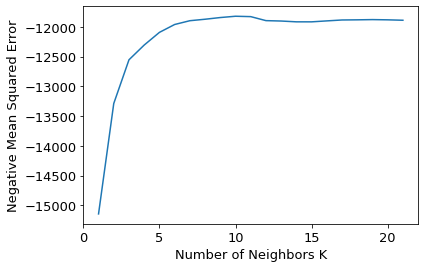

In [1301]:
plt.plot(k_values, means)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Negative Mean Squared Error")
plt.show()

In [1302]:
scaler = StandardScaler().fit(X_train)
rescaledX_train = scaler.transform(X_train)

In [1303]:
model = KNeighborsRegressor(**grid_result.best_params_)

In [1304]:
model.fit(rescaledX_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [1305]:
rescaledX_test = scaler.transform(X_test)

In [1306]:
estimates = model.predict(rescaledX_test)

In [1307]:
mean_absolute_error(y_test,estimates)

12319.19354313099

In [1308]:
mean_squared_error(y_test, estimates,squared=False)

24446.414615184472

In [1309]:
r2_score(y_test, estimates)

0.31091589928546703

#### CLUSTER 2

In [1310]:
X_train=df_2_Xtrain
X_test=df_2_Xtest
y_train=df_2_ytrain
y_test=df_2_ytest

In [1311]:
num_folds = 10

In [1312]:
scoring = 'neg_mean_absolute_error'

In [1313]:
model = KNeighborsRegressor()

In [1314]:
kfold = KFold(n_splits = num_folds, shuffle=True, random_state=seed)

In [1315]:
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)

In [1316]:
cv_results

array([-12615.25949206,  -9408.01901587, -11453.68355556, -10623.34377778,
        -8635.26590476, -11515.83561905, -11544.41688889, -10157.36273016,
       -13099.56631746,  -9794.11241935])

In [1317]:
msg = "KKN: %f (%f)" % (cv_results.mean(), cv_results.std())
print(msg)

KKN: -10884.686572 (1344.805492)


In [1318]:
scaler = StandardScaler().fit(X_train)
rescaledX_train = scaler.transform(X_train)

In [1319]:
k_values = np.arange(1,22)

In [1320]:
param_grid = dict(n_neighbors=k_values)

In [1321]:
model = KNeighborsRegressor()

In [1322]:
kfold = KFold(n_splits = num_folds, shuffle=True, random_state=seed)

In [1323]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

In [1324]:
grid_result = grid.fit(rescaledX_train, y_train)

In [1325]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -9052.373490 using {'n_neighbors': 6}


In [1326]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean,stdev,param))

-11358.770218 (1730.073371) with: {'n_neighbors': 1}
-9906.102050 (1420.136158) with: {'n_neighbors': 2}
-9518.294240 (1191.529204) with: {'n_neighbors': 3}
-9336.858879 (1304.023406) with: {'n_neighbors': 4}
-9229.081215 (1220.890634) with: {'n_neighbors': 5}
-9052.373490 (1253.130212) with: {'n_neighbors': 6}
-9054.309828 (1224.143866) with: {'n_neighbors': 7}
-9068.754708 (1302.181986) with: {'n_neighbors': 8}
-9135.412158 (1239.538238) with: {'n_neighbors': 9}
-9130.645391 (1259.487514) with: {'n_neighbors': 10}
-9200.378285 (1339.292614) with: {'n_neighbors': 11}
-9194.127245 (1270.433369) with: {'n_neighbors': 12}
-9128.345289 (1248.372278) with: {'n_neighbors': 13}
-9172.596465 (1243.789965) with: {'n_neighbors': 14}
-9172.976385 (1252.168852) with: {'n_neighbors': 15}
-9177.651078 (1261.411499) with: {'n_neighbors': 16}
-9168.748170 (1278.057466) with: {'n_neighbors': 17}
-9180.399847 (1291.041749) with: {'n_neighbors': 18}
-9210.362548 (1340.166465) with: {'n_neighbors': 19}
-

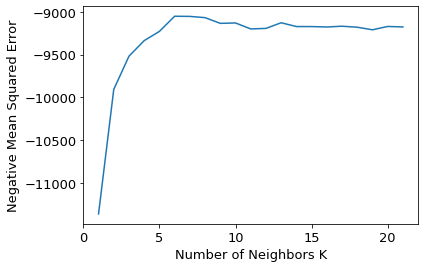

In [1327]:
plt.plot(k_values, means)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Negative Mean Squared Error")
plt.show()

In [1328]:
scaler = StandardScaler().fit(X_train)
rescaledX_train = scaler.transform(X_train)

In [1329]:
model = KNeighborsRegressor(**grid_result.best_params_)

In [1330]:
model.fit(rescaledX_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [1331]:
rescaledX_test = scaler.transform(X_test)

In [1332]:
estimates = model.predict(rescaledX_test)

In [1333]:
mean_absolute_error(y_test, estimates)

7784.115432489451

In [1334]:
mean_squared_error(y_test, estimates,squared=False)

10890.713284917267

In [1335]:
r2_score(y_test, estimates)

0.4649773784679042

### Nerual Network Regression

#### FULL MODEL

In [1336]:
# !pip install Keras
# !pip install tensorflow

In [1337]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense

In [1338]:
from sklearn import preprocessing
seed=1

In [1339]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [1340]:
X.shape, y.shape

((5000, 19), (5000,))

In [1341]:
X_train.shape, X_test.shape

((4000, 19), (1000, 19))

In [1342]:
y_train=np.array(y_train)
y_train=y_train.reshape(-1,1)
y_test=np.array(y_test)
y_test=y_test.reshape(-1,1)

In [1343]:
X_train.shape, X_test.shape

((4000, 19), (1000, 19))

In [1344]:
y_train.shape, y_test.shape

((4000, 1), (1000, 1))

In [1345]:
scaler1 = preprocessing.MinMaxScaler()
scaler2 = preprocessing.MinMaxScaler()
X_train_scaled = scaler1.fit_transform(X_train)
X_test_scaled = scaler1.transform(X_test)
y_train_scaled = scaler2.fit_transform(y_train)
y_test_scaled = scaler2.transform(y_test)

In [1346]:
X.columns

Index(['Total_Households',
       'Total_Households_For_Period_Of_Construction_Built_Before_1961',
       'Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980',
       'Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990',
       'Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000',
       'Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005',
       'Total_Households_For_Structure_Type_Houses',
       'Total_Households_For_Structure_Type_Apartment,_Building_Low_And_High_Rise',
       'Total_Households_For_Structure_Type_Other_Dwelling_Types',
       'Population_Per_Household', 'Percentage_after_2005', 'pct_1961_1980',
       'pct_1981_1990', 'pct_1991_2000', 'pct_2000_2005', 'pct_2005_2016',
       'Dwell_own_pct', 'Dwell_rent_pct', 'Dwell_none_pct'],
      dtype='object')

In [1347]:
def create_model(neurons=1):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='sigmoid'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(loss='mae',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), metrics=['mae','mse'])
    return model

In [1348]:
model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=50, verbose=1)

<ipython-input-1348-a3f61d4e1584>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=50, verbose=1)


In [1349]:
neurons = [1,5,10,15,20,25,30]

In [1350]:
param_grid = dict(neurons=neurons)

In [1351]:
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [1352]:
y_train_scaled=y_train_scaled.reshape(-1,1)

In [1353]:
grid_result = grid.fit(X_train_scaled,y_train_scaled)

Epoch 1/50
64/64 [==============================] - 0s 538us/step - loss: 0.3883 - mae: 0.3883 - mse: 0.1528
Epoch 2/50
64/64 [==============================] - 0s 516us/step - loss: 0.3881 - mae: 0.3881 - mse: 0.1527
Epoch 3/50
64/64 [==============================] - 0s 522us/step - loss: 0.3879 - mae: 0.3879 - mse: 0.1525
Epoch 4/50
64/64 [==============================] - 0s 538us/step - loss: 0.3876 - mae: 0.3876 - mse: 0.1523
Epoch 5/50
64/64 [==============================] - 0s 522us/step - loss: 0.3874 - mae: 0.3874 - mse: 0.1521
Epoch 6/50
64/64 [==============================] - 0s 491us/step - loss: 0.3871 - mae: 0.3871 - mse: 0.1519
Epoch 7/50
64/64 [==============================] - 0s 491us/step - loss: 0.3869 - mae: 0.3869 - mse: 0.1517
Epoch 8/50
64/64 [==============================] - 0s 491us/step - loss: 0.3866 - mae: 0.3866 - mse: 0.1515
Epoch 9/50
64/64 [==============================] - 0s 475us/step - loss: 0.3864 - mae: 0.3864 - mse: 0.1513
Epoch 10/50
64/64 [

In [1354]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.250102 using {'neurons': 30}


In [1355]:
grid_result.cv_results_

{'mean_fit_time': array([1.92051935, 1.98741679, 1.99348254, 1.9738122 , 2.10555248,
        2.07965899, 2.08975215]),
 'std_fit_time': array([0.01950242, 0.02445035, 0.00987628, 0.00553073, 0.03271172,
        0.02909096, 0.08681917]),
 'mean_score_time': array([0.08936625, 0.08936076, 0.09446845, 0.13953905, 0.09417481,
        0.09175644, 0.09225636]),
 'std_score_time': array([0.0012727 , 0.00272147, 0.00507989, 0.10105236, 0.00181572,
        0.0014077 , 0.00468464]),
 'param_neurons': masked_array(data=[1, 5, 10, 15, 20, 25, 30],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'neurons': 1},
  {'neurons': 5},
  {'neurons': 10},
  {'neurons': 15},
  {'neurons': 20},
  {'neurons': 25},
  {'neurons': 30}],
 'split0_test_score': array([-0.37558585, -0.35266003, -0.34112382, -0.33734953, -0.27353528,
        -0.2534028 , -0.22994238]),
 'split1_test_score': array([-0.37597054, -0.35671738, -0.338732

In [1356]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with %r' % (mean, stdev, param))

-0.376081 (0.002802) with {'neurons': 1}
-0.356358 (0.009242) with {'neurons': 5}
-0.339265 (0.010491) with {'neurons': 10}
-0.322358 (0.012452) with {'neurons': 15}
-0.288955 (0.010445) with {'neurons': 20}
-0.281006 (0.020596) with {'neurons': 25}
-0.250102 (0.019790) with {'neurons': 30}


In [1357]:
#Tuned ANN model
model = Sequential()
#model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='mae', optimizer='adam', metrics=['mae','mse'])
model.fit(X_train_scaled,y_train_scaled, epochs=50, batch_size=50, verbose=1)

Epoch 1/50
80/80 [==============================] - 0s 492us/step - loss: 0.3665 - mae: 0.3665 - mse: 0.1369
Epoch 2/50
80/80 [==============================] - 0s 505us/step - loss: 0.3008 - mae: 0.3008 - mse: 0.0932
Epoch 3/50
80/80 [==============================] - 0s 518us/step - loss: 0.2398 - mae: 0.2398 - mse: 0.0604
Epoch 4/50
80/80 [==============================] - 0s 581us/step - loss: 0.1863 - mae: 0.1863 - mse: 0.0378
Epoch 5/50
80/80 [==============================] - 0s 568us/step - loss: 0.1416 - mae: 0.1416 - mse: 0.0231
Epoch 6/50
80/80 [==============================] - 0s 480us/step - loss: 0.1055 - mae: 0.1055 - mse: 0.0141
Epoch 7/50
80/80 [==============================] - 0s 480us/step - loss: 0.0792 - mae: 0.0792 - mse: 0.0089
Epoch 8/50
80/80 [==============================] - 0s 480us/step - loss: 0.0627 - mae: 0.0627 - mse: 0.0062
Epoch 9/50
80/80 [==============================] - 0s 467us/step - loss: 0.0532 - mae: 0.0532 - mse: 0.0048
Epoch 10/50
80/80 [

In [1358]:
y_test_scaled = y_test_scaled.reshape(-1,1)

In [1359]:
X_test_scaled.shape, y_test_scaled.shape

((1000, 19), (1000, 1))

In [1360]:
estimates = model.predict(X_test_scaled)

In [1361]:
y_pred = scaler2.inverse_transform(estimates)

In [1362]:
mean_squared_error(y_test, y_pred,squared=False)

28443.357821500613

In [1363]:
r2_score(y_test, y_pred)

0.3275982490485432

In [1364]:
mean_absolute_error(y_test,y_pred)

14490.428053984373

In [1365]:
#results=cross_val_score(estimator,X2,census_df["Median_Household_Income_(Current_Year_$)"], cv=kfold)

In [1366]:
#print(f"Average Mean Absolute Error is {results.mean()}")

### Linear Regression

#### FULL MODEL

In [1367]:
from sklearn import linear_model

In [1368]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [1369]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test) 

print_model = model.summary()
print(print_model)

                                            OLS Regression Results                                           
Dep. Variable:     Median_Household_Income_(Current_Year_$)   R-squared (uncentered):                   0.917
Model:                                                  OLS   Adj. R-squared (uncentered):              0.917
Method:                                       Least Squares   F-statistic:                              2448.
Date:                                      Sat, 11 Dec 2021   Prob (F-statistic):                        0.00
Time:                                              12:56:41   Log-Likelihood:                         -46043.
No. Observations:                                      4000   AIC:                                  9.212e+04
Df Residuals:                                          3982   BIC:                                  9.224e+04
Df Model:                                                18                                                  
Covariance

In [1370]:
mean_absolute_error(y_test, y_pred)

13771.439491002027

In [1371]:
mean_squared_error(y_test, y_pred,squared=False)

26969.414039076564

In [1372]:
r2_score(y_test, y_pred)

0.3954807603359959

#### CLUSTER 0

In [1373]:
X_train=df_0_Xtrain
X_test=df_0_Xtest
y_train=df_0_ytrain
y_test=df_0_ytest

In [1374]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test) 

print_model = model.summary()
print(print_model)

                                            OLS Regression Results                                           
Dep. Variable:     Median_Household_Income_(Current_Year_$)   R-squared (uncentered):                   0.870
Model:                                                  OLS   Adj. R-squared (uncentered):              0.869
Method:                                       Least Squares   F-statistic:                              781.6
Date:                                      Sat, 11 Dec 2021   Prob (F-statistic):                        0.00
Time:                                              12:56:41   Log-Likelihood:                         -24920.
No. Observations:                                      2120   AIC:                                  4.988e+04
Df Residuals:                                          2102   BIC:                                  4.998e+04
Df Model:                                                18                                                  
Covariance

In [1375]:
mean_absolute_error(y_test, y_pred)

14710.148017433681

In [1376]:
mean_squared_error(y_test, y_pred,squared=False)

21978.522422842794

In [1377]:
r2_score(y_test, y_pred)

0.4572282107776239

#### CLUSTER 1

In [1378]:
X_train=df_1_Xtrain
X_test=df_1_Xtest
y_train=df_1_ytrain
y_test=df_1_ytest

In [1379]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test) 

print_model = model.summary()
print(print_model)

                                       OLS Regression Results                                       
Dep. Variable:     Median_Household_Income_(Current_Year_$)   R-squared:                       0.490
Model:                                                  OLS   Adj. R-squared:                  0.483
Method:                                       Least Squares   F-statistic:                     69.54
Date:                                      Sat, 11 Dec 2021   Prob (F-statistic):          3.22e-166
Time:                                              12:56:41   Log-Likelihood:                -13951.
No. Observations:                                      1250   AIC:                         2.794e+04
Df Residuals:                                          1232   BIC:                         2.803e+04
Df Model:                                                17                                         
Covariance Type:                                  nonrobust                                

In [1380]:
mean_absolute_error(y_test, y_pred)

12789.870396877819

In [1381]:
mean_squared_error(y_test, y_pred,squared=False)

24949.459461497714

In [1382]:
r2_score(y_test, y_pred)

0.2822649337673764

#### CLUSTER 2

In [1383]:
X_train=df_2_Xtrain
X_test=df_2_Xtest
y_train=df_2_ytrain
y_test=df_2_ytest

In [1384]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test) 

print_model = model.summary()
print(print_model)

                                       OLS Regression Results                                       
Dep. Variable:     Median_Household_Income_(Current_Year_$)   R-squared:                       0.463
Model:                                                  OLS   Adj. R-squared:                  0.449
Method:                                       Least Squares   F-statistic:                     31.05
Date:                                      Sat, 11 Dec 2021   Prob (F-statistic):           2.69e-71
Time:                                              12:56:41   Log-Likelihood:                -6835.2
No. Observations:                                       629   AIC:                         1.371e+04
Df Residuals:                                           611   BIC:                         1.379e+04
Df Model:                                                17                                         
Covariance Type:                                  nonrobust                                

In [1385]:
mean_absolute_error(y_test, y_pred)

8475.177004140454

In [1387]:
mean_squared_error(y_test, y_pred,squared=False)

11636.28849626391

In [1388]:
r2_score(y_test, y_pred)

0.38921486935209104

### Linear Regression (Ridge/Lasso) with Cross Validation 

#### Full Model

In [1389]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

In [1390]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [1391]:
X_train.shape, X_test.shape

((4000, 19), (1000, 19))

In [1392]:
# alpha = 1.0 by default
rr = RidgeCV()

In [1393]:
rr.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [1394]:
y_pred = rr.predict(X_test)

In [1395]:
mean_absolute_error(y_test,y_pred)

13775.879724562343

In [1396]:
mean_squared_error(y_test,y_pred,squared=False)

26984.625454067784

In [1397]:
r2_score(y_test, y_pred)

0.3947986404885224

In [1398]:
lr = LassoCV()

In [1399]:
# alpha = 1.0 by default
lr.fit(X_train,y_train)

LassoCV()

In [1400]:
y_pred = lr.predict(X_test)

In [1401]:
mean_absolute_error(y_test,y_pred)

16898.147071394706

In [1402]:
mean_squared_error(y_test,y_pred,squared=False)

28691.10468875391

In [1403]:
r2_score(y_test, y_pred)

0.3158337504117923

#### Cluster 0

In [1404]:
df_0_Xtrain.shape, df_0_Xtest.shape

((2120, 19), (530, 19))

In [1405]:
rr0 = RidgeCV()

In [1406]:
rr0.fit(df_0_Xtrain,df_0_ytrain)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [1407]:
y_pred0 = rr0.predict(df_0_Xtest)

In [1408]:
mean_absolute_error(df_0_ytest,y_pred0)

14710.413465428743

In [1409]:
mean_squared_error(df_0_ytest,y_pred0,squared=False)

21977.611165356888

In [1410]:
r2_score(df_0_ytest,y_pred0)

0.4572732178616379

In [1411]:
lr0 = LassoCV()

In [1412]:
lr0.fit(df_0_Xtrain,df_0_ytrain)

LassoCV()

In [1413]:
y_pred0 = lr0.predict(df_0_Xtest)

In [1414]:
mean_absolute_error(df_0_ytest,y_pred0)

16891.468289905042

In [1415]:
mean_squared_error(df_0_ytest,y_pred0,squared=False)

23921.787942744766

In [1416]:
r2_score(df_0_ytest,y_pred0)

0.3570050605266408

#### Cluster 1

In [1417]:
df_1_Xtrain.shape, df_1_Xtest.shape

((1250, 19), (313, 19))

In [1418]:
rr1 = RidgeCV()

In [1419]:
rr1.fit(df_1_Xtrain,df_1_ytrain)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [1420]:
y_pred1 = rr1.predict(df_1_Xtest)

In [1421]:
mean_absolute_error(df_1_ytest,y_pred1)

12782.552161083904

In [1422]:
mean_squared_error(df_1_ytest,y_pred1,squared=False)

24948.049206510907

In [1423]:
r2_score(df_1_ytest,y_pred1)

0.2823460706634431

In [1424]:
lr1 = LassoCV()

In [1425]:
lr1.fit(df_1_Xtrain,df_1_ytrain)

LassoCV()

In [1426]:
y_pred1 = lr1.predict(df_1_Xtest)

In [1427]:
mean_absolute_error(df_1_ytest,y_pred1)

13701.95183045535

In [1428]:
mean_squared_error(df_1_ytest,y_pred1,squared=False)

25652.879857469223

In [1429]:
r2_score(df_1_ytest,y_pred1)

0.24122303598883077

#### Cluster 2

In [1430]:
df_2_Xtrain.shape, df_2_Xtest.shape

((629, 19), (158, 19))

In [1431]:
rr2 = RidgeCV()

In [1432]:
rr2.fit(df_2_Xtrain,df_2_ytrain)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [1433]:
y_pred2 = rr2.predict(df_2_Xtest)

In [1434]:
mean_absolute_error(df_2_ytest,y_pred2)

8411.46933249673

In [1435]:
mean_squared_error(df_2_ytest,y_pred2,squared=False)

11545.500052576052

In [1436]:
r2_score(df_2_ytest,y_pred2)

0.3987086022117934

In [1437]:
lr2 = LassoCV()

In [1438]:
lr2.fit(df_2_Xtrain,df_2_ytrain)

LassoCV()

In [1439]:
y_pred2 = lr2.predict(df_2_Xtest)

In [1440]:
mean_absolute_error(df_2_ytest,y_pred2)

9627.098418535828

In [1441]:
mean_squared_error(df_2_ytest,y_pred2,squared=False)

12374.817394311045

In [1442]:
r2_score(df_2_ytest,y_pred2)

0.3092242329216345

### Random Forest Regressor

#### Full Model

In [1443]:
from sklearn.ensemble import RandomForestRegressor

In [1444]:
rf = RandomForestRegressor()

In [1445]:
X_train.shape, X_test.shape

((4000, 19), (1000, 19))

In [1446]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [1447]:
y_pred = rf.predict(X_test)

In [1448]:
mean_absolute_error(y_test,y_pred)

12305.654427293333

In [1449]:
r2_score(y_test,y_pred)

0.5022005011173887

In [1450]:
max_depth = [5,10,15]
min_samples_leaf = [1,2,4]
min_samples_split = [2,5,10]

In [1451]:
params_grid = dict(max_depth=max_depth, min_samples_leaf= min_samples_leaf, min_samples_split=min_samples_split)

In [1452]:
kf = KFold(n_splits=5, random_state=seed)

C:\Users\irene\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [1453]:
grid = GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_grid, scoring='neg_mean_absolute_error',cv = kf)

In [1454]:
grid_result = grid.fit(X_train,y_train)

In [1455]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -12336.321037 using {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [1456]:
rf_best = RandomForestRegressor(**grid_result.best_params_)

In [1457]:
rf_best.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=4, min_samples_split=10)

In [1458]:
y_pred = rf_best.predict(X_test)

In [1459]:
mean_absolute_error(y_pred, y_test)

12123.484795844097

#### Cluster 0

In [1460]:
rf0 = RandomForestRegressor()

In [1461]:
rf0.fit(df_0_Xtrain,df_0_ytrain)

RandomForestRegressor()

In [1462]:
y_pred0 = rf0.predict(df_0_Xtest)

In [1463]:
mean_absolute_error(df_0_ytest,y_pred0)

12926.510757578615

In [1464]:
mean_squared_error(df_0_ytest,y_pred0,squared=False)

19408.22000856147

In [1465]:
r2_score(df_0_ytest,y_pred0)

0.5767551369058106

In [1466]:
max_depth = [5,10,15]
min_samples_leaf = [1,2,4]
min_samples_split = [2,5,10]

In [1467]:
params_grid = dict(max_depth=max_depth, min_samples_leaf= min_samples_leaf, min_samples_split=min_samples_split)

In [1468]:
kf = KFold(n_splits=5, random_state=seed)

C:\Users\irene\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [1469]:
grid = GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_grid, scoring='neg_mean_absolute_error',cv = kf)

In [1470]:
grid_result = grid.fit(df_0_Xtrain,df_0_ytrain)

In [1471]:
df_0_Xtrain.shape

(2120, 19)

In [1472]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -14274.622100 using {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [1473]:
rf_best0 = RandomForestRegressor(**grid_result.best_params_)

In [1474]:
rf_best0.fit(df_0_Xtrain,df_0_ytrain)

RandomForestRegressor(max_depth=15, min_samples_leaf=4)

In [1475]:
y_pred0 = rf_best0.predict(df_0_Xtest)

In [1476]:
mean_absolute_error(df_0_ytest,y_pred0)

12895.00480649206

In [1477]:
mean_squared_error(df_0_ytest,y_pred0,squared=False)

19500.46504938358

In [1478]:
r2_score(df_0_ytest,y_pred0)

0.5727223073833353

#### Cluster 1

In [1479]:
rf1 = RandomForestRegressor()

In [1480]:
rf1.fit(df_1_Xtrain,df_1_ytrain)

RandomForestRegressor()

In [1481]:
y_pred1 = rf1.predict(df_1_Xtest)

In [1482]:
mean_absolute_error(df_1_ytest,y_pred1)

12086.180217891371

In [1483]:
mean_squared_error(df_1_ytest,y_pred1,squared=False)

24325.50118945573

In [1484]:
r2_score(df_1_ytest,y_pred1)

0.3177155440500231

In [1485]:
max_depth = [5,10,15]
min_samples_leaf = [1,2,4]
min_samples_split = [2,5,10]

In [1486]:
params_grid = dict(max_depth=max_depth, min_samples_leaf= min_samples_leaf, min_samples_split=min_samples_split)

In [1487]:
kf = KFold(n_splits=5, random_state=seed)

C:\Users\irene\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [1488]:
grid = GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_grid, scoring='neg_mean_absolute_error',cv = kf)

In [1489]:
grid_result = grid.fit(df_1_Xtrain,df_1_ytrain)

In [1490]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -11494.964096 using {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [1491]:
rf_best1 = RandomForestRegressor(**grid_result.best_params_)

In [1492]:
rf_best1.fit(df_1_Xtrain,df_1_ytrain)

RandomForestRegressor(max_depth=10, min_samples_leaf=4)

In [1493]:
y_pred1 = rf_best1.predict(df_1_Xtest)

In [1494]:
mean_absolute_error(df_1_ytest,y_pred1)

11691.291608191297

In [1495]:
mean_squared_error(df_1_ytest,y_pred1,squared=False)

24173.707332005528

In [1496]:
r2_score(df_1_ytest,y_pred1)

0.3262040397296966

#### Cluster 2

In [1497]:
rf2 = RandomForestRegressor()

In [1498]:
rf2.fit(df_2_Xtrain,df_2_ytrain)

RandomForestRegressor()

In [1499]:
y_pred2 = rf2.predict(df_2_Xtest)

In [1500]:
mean_absolute_error(df_2_ytest,y_pred2)

7870.884594303798

In [1501]:
mean_squared_error(df_2_ytest,y_pred2,squared=False)

10600.138011286841

In [1502]:
r2_score(df_2_ytest,y_pred2)

0.4931464005437114

In [1503]:
max_depth = [5,10,15]
min_samples_leaf = [1,2,4]
min_samples_split = [2,5,10]

In [1504]:
params_grid = dict(max_depth=max_depth, min_samples_leaf= min_samples_leaf, min_samples_split=min_samples_split)

In [1505]:
kf = KFold(n_splits=5, random_state=seed)

C:\Users\irene\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [1506]:
grid = GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_grid, scoring='neg_mean_absolute_error',cv = kf)

In [1507]:
grid_result = grid.fit(df_2_Xtrain,df_2_ytrain)

In [1508]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -8621.405518 using {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [1509]:
rf_best2 = RandomForestRegressor(**grid_result.best_params_)

In [1510]:
rf_best2.fit(df_2_Xtrain,df_2_ytrain)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5)

In [1511]:
y_pred2 = rf_best2.predict(df_2_Xtest)

In [1512]:
mean_absolute_error(df_2_ytest,y_pred2)

7873.086408203411

In [1513]:
mean_squared_error(df_2_ytest,y_pred2,squared=False)

10620.206745887146

In [1514]:
r2_score(df_2_ytest,y_pred2)

0.4912253803921447

### Question h
Select your two or three best models, compare them (perhaps using a table), and 
recommend the one which you think is the best.

## Prediction on Test Set

### Preprocessing

In [1515]:
df_test = pd.read_csv('CensusCanada2016Test.csv')

In [1516]:
df_test.head()

Total Population  Total Households  \
0              2692               893   
1              3884              1511   
2              7014              2768   
3              9136              4577   
4              3614              1167   

   Total Households For Period Of Construction  \
0                                          893   
1                                         1511   
2                                         2768   
3                                         4577   
4                                         1167   

   Total Households For Period Of Construction Built Before 1961  \
0                                                 15               
1                                                 17               
2                                                767               
3                                               1540               
4                                                 44               

   Total Households For Period Of Construction Built Between 1961 And 1980  \
0                                                 21                         
1                                                839                         
2                                                615                         
3                                                969                         
4                                                 94                         

   Total Households For Period Of Construction Built Between 1981 And 190  \
0                                                 46                        
1                                                218                        
2                                                223                        
3                                                437                        
4                                                 34                        

   Total Households For Period Of Construction Built Between 1991 And 2000  \
0                                                648                         
1                                                 27                         
2                                                435                         
3                                                244                         
4                                                115                         

   Total Households For Period Of Construction Built Between 2001 And 2005  \
0                                                114                         
1                                                 33                         
2                                                166                         
3                                                457                         
4                                                184                         

   Total Households For Structure Type Houses  \
0                                         883   
1                                        1025   
2                                        1390   
3                                        2102   
4                                        1069   

   Total Households For Structure Type Apartment, Building Low And High Rise  \
0                                                 10                           
1                                                486                           
2                                               1378                           
3                                               2461                           
4                                                 98                           

   Total Households For Structure Type Other Dwelling Types  \
0                                                  0          
1                                                  0          
2                                                  0          
3                                                 14          
4                                                  0          

   Total Households f

In [1517]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 14 columns):
 #   Column                                                                     Non-Null Count  Dtype
---  ------                                                                     --------------  -----
 0   Total Population                                                           721 non-null    int64
 1   Total Households                                                           721 non-null    int64
 2   Total Households For Period Of Construction                                721 non-null    int64
 3   Total Households For Period Of Construction Built Before 1961              721 non-null    int64
 4   Total Households For Period Of Construction Built Between 1961 And 1980    721 non-null    int64
 5   Total Households For Period Of Construction Built Between 1981 And 190     721 non-null    int64
 6   Total Households For Period Of Construction Built Between 1991 And 2000   

In [1518]:
df_test.columns = df_test.columns.str.replace(' ','_')

In [1519]:
df_test.columns = df_test.columns.str.replace('190','1990')

In [1520]:
df_test.columns

Index(['Total_Population', 'Total_Households',
       'Total_Households_For_Period_Of_Construction',
       'Total_Households_For_Period_Of_Construction_Built_Before_1961',
       'Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980',
       'Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990',
       'Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000',
       'Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005',
       'Total_Households_For_Structure_Type_Houses',
       'Total_Households_For_Structure_Type_Apartment,_Building_Low_And_High_Rise',
       'Total_Households_For_Structure_Type_Other_Dwelling_Types',
       'Total_Households_for_Tenure', 'Dwellings_by_Tenure_Owner',
       'Dwellings_by_Tenure_Renter'],
      dtype='object')

In [1521]:
df_test = df_test.drop('Total_Households_For_Period_Of_Construction',axis=1)

In [1522]:
df_test = df_test.drop('Total_Households_for_Tenure',axis=1)

In [1523]:
df_test["Total_Households_For_Period_Of_Construction_Built_Before_2005"] = df_test['Total_Households_For_Period_Of_Construction_Built_Before_1961']+ df_test['Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980'] + df_test['Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990']+ df_test['Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000'] + df_test['Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005']

In [1524]:
df_test["Total_Households_For_Period_Of_Construction_After_2005"] = df_test["Total_Households"] - df_test["Total_Households_For_Period_Of_Construction_Built_Before_2005"]

In [1525]:
df_test["Population_Per_Household"] = (df_test["Total_Population"]/df_test["Total_Households"]).replace(np.inf,0)

In [1526]:
df_test["Percentage_after_2005"] = df_test["Total_Households_For_Period_Of_Construction_After_2005"]/df_test["Total_Households"]

In [1527]:
df_test['pct_1961_1980'] = percentage_change(df_test['Total_Households_For_Period_Of_Construction_Built_Before_1961'].replace(0,1),df_test['Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980'])    

In [1528]:
df_test['pct_1981_1990'] = percentage_change(df_test['Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980'].replace(0,1), df_test['Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990'])    

In [1529]:
df_test['pct_1991_2000'] = percentage_change(df_test['Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990'].replace(0,1),df_test['Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000'])    

In [1530]:
df_test['pct_2000_2005'] = percentage_change(df_test['Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000'].replace(0,1),df_test['Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005'])    

In [1531]:
df_test['pct_2005_2016'] = percentage_change(df_test['Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005'].replace(0,1),df_test['Total_Households_For_Period_Of_Construction_After_2005'])    

In [1532]:
df_test["Population_Per_Household"] = df_test["Population_Per_Household"].replace(np.nan, 0)

In [1533]:
df_test["Percentage_after_2005"] = df_test["Percentage_after_2005"].replace(np.nan, 0)

In [1534]:
df_test = df_test.drop("Total_Households_For_Period_Of_Construction_After_2005", axis=1)

In [1535]:
df_test['Dwellings_by_None'] = df_test["Total_Households"] - df_test['Dwellings_by_Tenure_Owner'] - df_test['Dwellings_by_Tenure_Renter']

In [1536]:
df_test = df_test.drop('Total_Population',axis=1)

In [1537]:
df_test = df_test.drop('Total_Households_For_Period_Of_Construction_Built_Before_2005',axis=1)

In [1538]:
df_test["Dwell_own_pct"] = df_test['Dwellings_by_Tenure_Owner']/df_test["Total_Households"]

In [1539]:
df_test["Dwell_rent_pct"] = df_test['Dwellings_by_Tenure_Renter']/df_test["Total_Households"]

In [1540]:
df_test["Dwell_none_pct"] = df_test['Dwellings_by_None']/df_test["Total_Households"]

In [1541]:
df_test["Dwell_own_pct"] = df_test["Dwell_own_pct"].replace(np.nan, 0)

In [1542]:
df_test["Dwell_rent_pct"] = df_test["Dwell_rent_pct"].replace(np.nan, 0)

In [1543]:
df_test["Dwell_none_pct"] = df_test["Dwell_none_pct"].replace(np.nan, 0)

In [1544]:
df_test = df_test.drop(['Dwellings_by_Tenure_Owner','Dwellings_by_Tenure_Renter','Dwellings_by_None'], axis=1)

In [1545]:
df_test.columns

Index(['Total_Households',
       'Total_Households_For_Period_Of_Construction_Built_Before_1961',
       'Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980',
       'Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990',
       'Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000',
       'Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005',
       'Total_Households_For_Structure_Type_Houses',
       'Total_Households_For_Structure_Type_Apartment,_Building_Low_And_High_Rise',
       'Total_Households_For_Structure_Type_Other_Dwelling_Types',
       'Population_Per_Household', 'Percentage_after_2005', 'pct_1961_1980',
       'pct_1981_1990', 'pct_1991_2000', 'pct_2000_2005', 'pct_2005_2016',
       'Dwell_own_pct', 'Dwell_rent_pct', 'Dwell_none_pct'],
      dtype='object')

In [1546]:
census_df.columns

Index(['Total_Households', 'Median_Household_Income_(Current_Year_$)',
       'Total_Households_For_Period_Of_Construction_Built_Before_1961',
       'Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980',
       'Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990',
       'Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000',
       'Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005',
       'Total_Households_For_Structure_Type_Houses',
       'Total_Households_For_Structure_Type_Apartment,_Building_Low_And_High_Rise',
       'Total_Households_For_Structure_Type_Other_Dwelling_Types',
       'Population_Per_Household', 'Percentage_after_2005', 'pct_1961_1980',
       'pct_1981_1990', 'pct_1991_2000', 'pct_2000_2005', 'pct_2005_2016',
       'Dwell_own_pct', 'Dwell_rent_pct', 'Dwell_none_pct', 'labels'],
      dtype='object')

In [1547]:
df_test.describe()

Total_Households  \
count        721.000000   
mean        1914.248266   
std          976.666808   
min            0.000000   
25%         1243.000000   
50%         1822.000000   
75%         2443.000000   
max         8254.000000   

       Total_Households_For_Period_Of_Construction_Built_Before_1961  \
count                                         721.000000               
mean                                          373.642164               
std                                           428.887867               
min                                             0.000000               
25%                                            44.000000               
50%                                           211.000000               
75%                                           604.000000               
max                                          2100.000000               

       Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980  \
count                                         721.000000                         
mean                                          544.603329                         
std                                           443.021928                         
min                                             0.000000                         
25%                                           173.000000                         
50%                                           471.000000                         
75%                                           816.000000                         
max                                          2349.000000                         

       Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990  \
count                                         721.000000                         
mean                                          254.993065                         
std                                           248.224498                         
min                                             0.000000                         
25%                                            76.000000                         
50%                                           174.000000                         
75%                                           360.000000                         
max                                          1519.000000                         

       Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000  \
count                                         721.000000                         
mean                                          242.693481                         
std                                           270.706081                         
min                                             0.000000                         
25%                                            54.000000                         
50%                                           143.000000                         
75%                                           342.000000                         
max                                          1776.000000                         

       Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005  \
count                                         721.000000                         
mean                                          151.747573                         
std                                           240.738038                         
min                                             0.000000                         
25%                                            16.000000                         
50%                                            55.000000                         
75%                                           178.000000                         
max                                          1722.000000                         

       Total_Households_For_Structure_Type_Houses  \
count                                  721.000000   
mean                                  1116.055479   

In [1548]:
census_df.describe()

Total_Households  Median_Household_Income_(Current_Year_$)  \
count       5000.000000                               5000.000000   
mean        1927.776200                              77241.071536   
std          974.811432                              33371.567357   
min            0.000000                                  0.000000   
25%         1333.750000                              53040.835000   
50%         1825.000000                              76206.780000   
75%         2428.250000                              95438.495000   
max        15388.000000                             669559.560000   

       Total_Households_For_Period_Of_Construction_Built_Before_1961  \
count                                        5000.000000               
mean                                          386.510600               
std                                           416.908471               
min                                             0.000000               
25%                                            47.000000               
50%                                           238.000000               
75%                                           613.000000               
max                                          2411.000000               

       Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980  \
count                                        5000.000000                         
mean                                          555.437800                         
std                                           448.327845                         
min                                             0.000000                         
25%                                           192.000000                         
50%                                           470.000000                         
75%                                           830.000000                         
max                                          3547.000000                         

       Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990  \
count                                         5000.00000                         
mean                                           260.48240                         
std                                            257.86717                         
min                                              0.00000                         
25%                                             74.00000                         
50%                                            181.00000                         
75%                                            369.00000                         
max                                           1740.00000                         

       Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000  \
count                                         5000.00000                         
mean                                           237.92820                         
std                                            265.43332                         
min                                              0.00000                         
25%                                             58.00000                         
50%                                            143.00000                         
75%                                            325.00000                         
max                                           2360.00000                         

       Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005  \
count                                        5000.000000                         
mean                                          138.595600                         
std                                           221.809214                         
min                                             0.000000                         
25%                                            17.000000                         
50%                        

### Segment the dataset
Based on the KMeans Cluster from the whole train dataset.

In [1549]:
X_test = df_test.values

In [1550]:
labels_test = kmeans2.predict(X_test)

In [1551]:
labels_test.shape

(721,)

In [1552]:
df_test["labels"] = labels_test

In [1553]:
df_test["labels"].value_counts()

0    384
1    221
2    116
Name: labels, dtype: int64

In [1554]:
df_test0 = df_test[df_test["labels"]==0]
df_test1 = df_test[df_test["labels"]==1]
df_test2 = df_test[df_test["labels"]==2]

In [1555]:
df_test0 = df_test0.drop("labels", axis=1)
df_test1 = df_test1.drop("labels", axis=1)
df_test2 = df_test2.drop("labels", axis=1)

In [1556]:
df_test0.shape,df_test1.shape,df_test2.shape

((384, 19), (221, 19), (116, 19))

### Train the model for each segment.

#### Try to figure out how to merge different segments correctly :')

In [1557]:
df_test0

Total_Households  \
0                 893   
1                1511   
4                1167   
6                 800   
8                1650   
..                ...   
714              1365   
716                64   
717              1718   
718               501   
719              1379   

     Total_Households_For_Period_Of_Construction_Built_Before_1961  \
0                                                   15               
1                                                   17               
4                                                   44               
6                                                  256               
8                                                  136               
..                                                 ...               
714                                                753               
716                                                  0               
717                                                799               
718                                                360               
719                                                227               

     Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980  \
0                                                   21                         
1                                                  839                         
4                                                   94                         
6                                                  435                         
8                                                  483                         
..                                                 ...                         
714                                                323                         
716                                                 32                         
717                                                575                         
718                                                101                         
719                                                553                         

     Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990  \
0                                                   46                         
1                                                  218                         
4                                                   34                         
6                                                   78                         
8                                                  203                         
..                                                 ...                         
714                                                 29                         
716                                                 14                         
717                                                186                         
718                                                  3                         
719                                                408                         

     Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000  \
0                                                  648                         
1                                                   27                         
4                                                  115                         
6                                                   30                         
8                                                  330                         
..                                                 ...                         
714                                                 45                         
716                                                 12                         
717                                                114                         
718                                                 11                         
719                                                 91       

In [1558]:
test_merge_df = df_test0.append(df_test1)

In [1559]:
test_merge_df = test_merge_df.append(df_test2)

In [1560]:
test_merge_df.shape

(721, 19)

In [1561]:
df_test.shape

(721, 20)

In [1562]:
test_merge_df = test_merge_df.sort_index()

In [1563]:
df_test

Total_Households  \
0                 893   
1                1511   
2                2768   
3                4577   
4                1167   
..                ...   
716                64   
717              1718   
718               501   
719              1379   
720              2404   

     Total_Households_For_Period_Of_Construction_Built_Before_1961  \
0                                                   15               
1                                                   17               
2                                                  767               
3                                                 1540               
4                                                   44               
..                                                 ...               
716                                                  0               
717                                                799               
718                                                360               
719                                                227               
720                                                 50               

     Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980  \
0                                                   21                         
1                                                  839                         
2                                                  615                         
3                                                  969                         
4                                                   94                         
..                                                 ...                         
716                                                 32                         
717                                                575                         
718                                                101                         
719                                                553                         
720                                               1726                         

     Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990  \
0                                                   46                         
1                                                  218                         
2                                                  223                         
3                                                  437                         
4                                                   34                         
..                                                 ...                         
716                                                 14                         
717                                                186                         
718                                                  3                         
719                                                408                         
720                                                301                         

     Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000  \
0                                                  648                         
1                                                   27                         
2                                                  435                         
3                                                  244                         
4                                                  115                         
..                                                 ...                         
716                                                 12                         
717                                                114                         
718                                                 11                         
719                                                 91                         
720                                                107       

In [1564]:
test_merge_df

Total_Households  \
0                 893   
1                1511   
2                2768   
3                4577   
4                1167   
..                ...   
716                64   
717              1718   
718               501   
719              1379   
720              2404   

     Total_Households_For_Period_Of_Construction_Built_Before_1961  \
0                                                   15               
1                                                   17               
2                                                  767               
3                                                 1540               
4                                                   44               
..                                                 ...               
716                                                  0               
717                                                799               
718                                                360               
719                                                227               
720                                                 50               

     Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980  \
0                                                   21                         
1                                                  839                         
2                                                  615                         
3                                                  969                         
4                                                   94                         
..                                                 ...                         
716                                                 32                         
717                                                575                         
718                                                101                         
719                                                553                         
720                                               1726                         

     Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990  \
0                                                   46                         
1                                                  218                         
2                                                  223                         
3                                                  437                         
4                                                   34                         
..                                                 ...                         
716                                                 14                         
717                                                186                         
718                                                  3                         
719                                                408                         
720                                                301                         

     Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000  \
0                                                  648                         
1                                                   27                         
2                                                  435                         
3                                                  244                         
4                                                  115                         
..                                                 ...                         
716                                                 12                         
717                                                114                         
718                                                 11                         
719                                                 91                         
720                                                107       

#### Cluster 0: Random Forest

In [1565]:
df_test0.shape, df_0_Xtrain.shape

((384, 19), (2120, 19))

In [1566]:
y_pred_test0 = rf_best0.predict(df_test0)

In [1567]:
df_test0["pred_income"] = y_pred_test0

In [1568]:
df_test0["pred_income"].describe()

count       384.000000
mean      78791.947881
std       28042.808492
min        1192.370355
25%       56576.554333
50%       79913.328202
75%       97438.988638
max      172649.192373
Name: pred_income, dtype: float64

#### Cluster 1: Random Forest

In [1569]:
df_1_Xtrain.shape, df_1_Xtest.shape

((1250, 19), (313, 19))

In [1570]:
y_pred_test1 = rf_best1.predict(df_test1)

In [1571]:
df_test1["pred_income"] = y_pred_test1

In [1572]:
df_test1["pred_income"].describe()

count       221.000000
mean      91033.378697
std       18723.885047
min       50565.480265
25%       75910.904045
50%       93556.426338
75%      105480.374264
max      141097.095708
Name: pred_income, dtype: float64

#### Cluster 2: KNN

In [1629]:
knn2 = KNeighborsRegressor(n_neighbors=6)

In [1630]:
knn2.fit(df_2_X,df_2_y)

KNeighborsRegressor(n_neighbors=6)

In [1621]:
df_2_Xtrain.shape, df_test2.shape

((629, 19), (116, 19))

In [1626]:
df_2_y.describe()

count       787.000000
mean      52722.990915
std       16877.463206
min       16000.930000
25%       42128.760000
50%       48919.820000
75%       59267.290000
max      195643.880000
Name: Median_Household_Income_(Current_Year_$), dtype: float64

In [1631]:
y_pred_test2 = knn2.predict(df_test2)

In [1632]:
df_test2["pred_income"] = y_pred_test2

In [1633]:
df_test2["pred_income"].describe()

count       116.000000
mean      51816.139009
std       10917.674388
min       30276.251667
25%       44235.752083
50%       48977.954167
75%       58255.279583
max      101375.825000
Name: pred_income, dtype: float64

#### Final Text File

In [1634]:
df_pred = df_test0.append(df_test1)

In [1635]:
df_pred = df_pred.append(df_test2)

In [1636]:
df_pred = df_pred.sort_index()

In [1637]:
df_pred.describe()

Total_Households  \
count        721.000000   
mean        1914.248266   
std          976.666808   
min            0.000000   
25%         1243.000000   
50%         1822.000000   
75%         2443.000000   
max         8254.000000   

       Total_Households_For_Period_Of_Construction_Built_Before_1961  \
count                                         721.000000               
mean                                          373.642164               
std                                           428.887867               
min                                             0.000000               
25%                                            44.000000               
50%                                           211.000000               
75%                                           604.000000               
max                                          2100.000000               

       Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980  \
count                                         721.000000                         
mean                                          544.603329                         
std                                           443.021928                         
min                                             0.000000                         
25%                                           173.000000                         
50%                                           471.000000                         
75%                                           816.000000                         
max                                          2349.000000                         

       Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990  \
count                                         721.000000                         
mean                                          254.993065                         
std                                           248.224498                         
min                                             0.000000                         
25%                                            76.000000                         
50%                                           174.000000                         
75%                                           360.000000                         
max                                          1519.000000                         

       Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000  \
count                                         721.000000                         
mean                                          242.693481                         
std                                           270.706081                         
min                                             0.000000                         
25%                                            54.000000                         
50%                                           143.000000                         
75%                                           342.000000                         
max                                          1776.000000                         

       Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005  \
count                                         721.000000                         
mean                                          151.747573                         
std                                           240.738038                         
min                                             0.000000                         
25%                                            16.000000                         
50%                                            55.000000                         
75%                                           178.000000                         
max                                          1722.000000                         

       Total_Households_For_Structure_Type_Houses  \
count                                  721.000000   
mean                                  1116.055479   

In [1638]:
df_pred

Total_Households  \
0                 893   
1                1511   
2                2768   
3                4577   
4                1167   
..                ...   
716                64   
717              1718   
718               501   
719              1379   
720              2404   

     Total_Households_For_Period_Of_Construction_Built_Before_1961  \
0                                                   15               
1                                                   17               
2                                                  767               
3                                                 1540               
4                                                   44               
..                                                 ...               
716                                                  0               
717                                                799               
718                                                360               
719                                                227               
720                                                 50               

     Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980  \
0                                                   21                         
1                                                  839                         
2                                                  615                         
3                                                  969                         
4                                                   94                         
..                                                 ...                         
716                                                 32                         
717                                                575                         
718                                                101                         
719                                                553                         
720                                               1726                         

     Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990  \
0                                                   46                         
1                                                  218                         
2                                                  223                         
3                                                  437                         
4                                                   34                         
..                                                 ...                         
716                                                 14                         
717                                                186                         
718                                                  3                         
719                                                408                         
720                                                301                         

     Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000  \
0                                                  648                         
1                                                   27                         
2                                                  435                         
3                                                  244                         
4                                                  115                         
..                                                 ...                         
716                                                 12                         
717                                                114                         
718                                                 11                         
719                                                 91                         
720                                                107       

In [1639]:
df_test

Total_Households  \
0                 893   
1                1511   
2                2768   
3                4577   
4                1167   
..                ...   
716                64   
717              1718   
718               501   
719              1379   
720              2404   

     Total_Households_For_Period_Of_Construction_Built_Before_1961  \
0                                                   15               
1                                                   17               
2                                                  767               
3                                                 1540               
4                                                   44               
..                                                 ...               
716                                                  0               
717                                                799               
718                                                360               
719                                                227               
720                                                 50               

     Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980  \
0                                                   21                         
1                                                  839                         
2                                                  615                         
3                                                  969                         
4                                                   94                         
..                                                 ...                         
716                                                 32                         
717                                                575                         
718                                                101                         
719                                                553                         
720                                               1726                         

     Total_Households_For_Period_Of_Construction_Built_Between_1981_And_1990  \
0                                                   46                         
1                                                  218                         
2                                                  223                         
3                                                  437                         
4                                                   34                         
..                                                 ...                         
716                                                 14                         
717                                                186                         
718                                                  3                         
719                                                408                         
720                                                301                         

     Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000  \
0                                                  648                         
1                                                   27                         
2                                                  435                         
3                                                  244                         
4                                                  115                         
..                                                 ...                         
716                                                 12                         
717                                                114                         
718                                                 11                         
719                                                 91                         
720                                                107       

In [1640]:
np.savetxt("Team8Prediction.txt",df_pred["pred_income"])